# Data Analytics - Bus Data Understanding and Prep

## Audit

Author: Adam

Last Modified By: Adam

Module: COMP47630

DC:     2021-06-27

DLM:    2021-06-27

Desc:   This file contains an analysis of the static RT Bus data

Dict:   The Data Dictionary for the Data Set is available on GTI


## Table of Contents

00. Introduction

01. Exec Summary and Results

02. Modules

03. Constants

04. Ingestion

05. Cleansing


## 00. Introduction

### 00.01 Background
(here)

### 00.02 Problem Scope
(here)

### 00.03 Data
(here)

### 00.04 Approach
(here)

## 01. Exec Summary

(here)

---
# ------BEGIN---------- #

## 01. Static

### 01.01 Modules
Import all modules here

In [7]:
import sys
print(sys.executable)

####--------------------------------------
#00.Import Modules
####--------------------------------------

######---------BEGIN
#      SUPPRESS DEPRECIATION WARNINGS: Applicable to datetime_is_numeric=True
######--------END

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######---------BEGIN
#      ML
######--------END

#import nltk as nl
import sklearn as sk
import matplotlib as mp
#import xgboost as xg
#import pymc3 as pymc
#import sympy as sym



######---------BEGIN
#      SQL/API
######--------END


#import requests as rq
#import sqlalchemy as sqla
#import pyodbc
#import cx_oracle as cx


######---------BEGIN
#     GENERAL
######--------END

import pandas as pd
import datetime as dt
import numpy as np
import sys
import os
from dask import dataframe as dask_df
#import pyspark as spk
#import json
#import time
#import socket
#import traceback as tb
#import platform
#from psutil import virtual_memory
import pickle as pck


######---------BEGIN
#     VISUALISATIONS
######--------END


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates


#For showing plots directly in the notebook run the command below
#%matplotlib inline


###HTML Output Hiding
#Install hide input extension
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable hide_input_all/main
#!jupyter nbextension enable hide_input/main
#!jupyter nbextension enable codefolding/main

#!jupyter nbextension disable hide_input_all/main
#!jupyter nbextension disable hide_input/main
#!jupyter nbextension disable codefolding/main

#Update with Filename: Run in Terminal, post completion, after hiding all cells for report
#!jupyter nbconvert --to=html bus_Data.ipynb

plt.style.use('ggplot')

/home/team10/miniconda3/bin/python3


### 01.02 Constants
Import all Constants here

In [27]:
#Dates for File Additions if needed
today_date=dt.datetime.now()

#DateTime objects
today_year=today_date.year
today_month=today_date.month
today_day=today_date.day

#Convert to ISO Standard for Filename
str_year=str(today_date.year)

#Month should have two digits
str_month=str(today_date.month)
if len(str_month)==1:
    str_month="0{}".format(str_month)

#Day should have two digits
str_day=str(today_date.day)
if len(str_day)==1:
    str_day="0{}".format(str_day)


str_today_date="{}-{}-{}".format(str_year,str_month,str_day)

datetime_format='%Y%m%d'




agency_dictionary={
                    '%3CmxGraphModel%3E%3Croot%3E%3CmxCell%20id%3D%220%22%2F%3E%3CmxCell%20id%3D%221%22%20parent%3D%220%22%2F%3E%3CmxCell%20id%3D%222%22%20value%3D%22rds_weather%22%20style%3D%22shape%3Dtable%3BstartSize%3D30%3Bcontainer%3D1%3Bcollapsible%3D1%3BchildLayout%3DtableLayout%3BfixedRows%3D1%3BrowLines%3D0%3BfontStyle%3D1%3Balign%3Dcenter%3BresizeLast%3D1%3B%22%20vertex%3D%221%22%20parent%3D%221%22%3E%3CmxGeometry%20x%3D%221808%22%20y%3D%22350%22%20width%3D%22250%22%20height%3D%22530.0000000000007%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3CmxCell%20id%3D%223%22%20value%3D%22%22%20style%3D%22shape%3DpartialRectangle%3Bcollapsible%3D0%3BdropTarget%3D0%3BpointerEvents%3D0%3BfillColor%3Dnone%3Bpoints%3D%5B%5B0%2C0.5%5D%2C%5B1%2C0.5%5D%5D%3BportConstraint%3Deastwest%3Btop%3D0%3Bleft%3D0%3Bright%3D0%3Bbottom%3D1%3B%22%20vertex%3D%221%22%20parent%3D%222%22%3E%3CmxGeometry%20y%3D%2230%22%20width%3D%22250%22%20height%3D%2230%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3CmxCell%20id%3D%224%22%20value%3D%22PK%22%20style%3D%22shape%3DpartialRectangle%3Boverflow%3Dhidden%3Bconnectable%3D0%3BfillColor%3Dnone%3Btop%3D0%3Bleft%3D0%3Bbottom%3D0%3Bright%3D0%3BfontStyle%3D1%3B%22%20vertex%3D%221%22%20parent%3D%223%22%3E%3CmxGeometry%20width%3D%2230%22%20height%3D%2230%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3CmxCell%20id%3D%225%22%20value%3D%22id%22%20style%3D%22shape%3DpartialRectangle%3Boverflow%3Dhidden%3Bconnectable%3D0%3BfillColor%3Dnone%3Btop%3D0%3Bleft%3D0%3Bbottom%3D0%3Bright%3D0%3Balign%3Dleft%3BspacingLeft%3D6%3BfontStyle%3D5%3BfontColor%3D%23FF3333%3B%22%20vertex%3D%221%22%20parent%3D%223%22%3E%3CmxGeometry%20x%3D%2230%22%20width%3D%22220%22%20height%3D%2230%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3CmxCell%20id%3D%226%22%20value%3D%22%22%20style%3D%22shape%3DpartialRectangle%3Bcollapsible%3D0%3BdropTarget%3D0%3BpointerEvents%3D0%3BfillColor%3Dnone%3Bpoints%3D%5B%5B0%2C0.5%5D%2C%5B1%2C0.5%5D%5D%3BportConstraint%3Deastwest%3Btop%3D0%3Bleft%3D0%3Bright%3D0%3Bbottom%3D0%3B%22%20vertex%3D%221%22%20parent%3D%222%22%3E%3CmxGeometry%20y%3D%2260%22%20width%3D%22250%22%20height%3D%22470%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3CmxCell%20id%3D%227%22%20value%3D%22%22%20style%3D%22shape%3DpartialRectangle%3Boverflow%3Dhidden%3Bconnectable%3D0%3BfillColor%3Dnone%3Btop%3D0%3Bleft%3D0%3Bbottom%3D0%3Bright%3D0%3B%22%20vertex%3D%221%22%20parent%3D%226%22%3E%3CmxGeometry%20width%3D%2230%22%20height%3D%22470%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3CmxCell%20id%3D%228%22%20value%3D%22position_long%3AREAL%26%23xa%3Bposition_lat%3AREAL%26%23xa%3Bweather_id%3AINTEGER%26%23xa%3Bmain%3AVARCHAR(256)%26%23xa%3Bdescription%3AVARCHAR(500)%26%23xa%3Bicon%3AVARCHAR(20)%26%23xa%3Bicon_url%3AVARCHAR(500)%26%23xa%3Bbase%3Avarchar(256)%26%23xa%3Btemp%3AREAL%26%23xa%3Bfeels_like%3AREAL%26%23xa%3Btemp_min%3AREAL%26%23xa%3Btemp_max%3AREAL%26%23xa%3Bpressure%3AINT%26%23xa%3Bhumidity%3AINT%26%23xa%3Bvisibility%3AINT%26%23xa%3Bwind_speed%3AREAL%26%23xa%3Bwind_degree%3AINT%26%23xa%3Bclouds_all%3AINT%26%23xa%3Bdatetime%3ABIGINT%26%23xa%3Bsys_type%3AINT%26%23xa%3Bsys_id%3AINT%26%23xa%3Bsys_country%3AVARCHAR(10)%26%23xa%3Bsys_sunrise%3ABIGINT%26%23xa%3Bsys_sunset%3ABIGINT%26%23xa%3Btimezone%3AINT%26%23xa%3Bid%3ABIGINT%26%23xa%3Bname%3AVARCHAR(256)%26%23xa%3Bcod%3AINT%26%23xa%3Blast_update_date%3Adatetime%26%23xa%3Bcreated_date%3Adatetime%22%20style%3D%22shape%3DpartialRectangle%3Boverflow%3Dhidden%3Bconnectable%3D0%3BfillColor%3Dnone%3Btop%3D0%3Bleft%3D0%3Bbottom%3D0%3Bright%3D0%3Balign%3Dleft%3BspacingLeft%3D6%3B%22%20vertex%3D%221%22%20parent%3D%226%22%3E%3CmxGeometry%20x%3D%2230%22%20width%3D%22220%22%20height%3D%22470%22%20as%3D%22geometry%22%2F%3E%3C%2FmxCell%3E%3C%2Froot%3E%3C%2FmxGraphModel%3E':['Agency Identifier','category']
                   ,'agency_name':['Agency Name','category']
                   ,'agency_url':['Agency URL','category']
                   ,'agency_timezone':['Agency Timezone','category']
                   ,'agency_lang':['Language of Transport Agency','category']
                    }

agency_meta_dict={
    'file_name':'agency.txt'
    ,'file_description':'Agency Data (Dublin Bus, Met Eireann, etc.)'
    ,'file_datadictionary':agency_dictionary
}

calendar_dictionary={
                    'service_id':['Description','category']
                    ,'monday':['Description','category']
                    ,'tuesday':['Description','category']
                    ,'wednesday':['Description','category']
                    ,'thursday':['Description','category']
                    ,'friday':['Description','category']
                    ,'saturday':['Description','category']
                    ,'sunday':['Description','category']
                    ,'start_date':['Description','datetime']
                    ,'end_date':['Description','datetime']
                    }

calendar_meta_dict={
    'file_name':'calendar.txt'
    ,'file_description':'What days servies run from and to seemingly?'
    ,'file_datadictionary':calendar_dictionary
}

calendardates_dictionary={
                     'service_id':['Description','category']
                    ,'date':['Date of Service','datetime']
                    ,'exception_type':['Exception ID','category']
                        }

calendardates_meta_dict={
    'file_name':'calendar_dates.txt'
    ,'file_description':'Exceptions for services on certain dates?'
    ,'file_datadictionary':calendardates_dictionary
}

routes_dictionary={
                        'route_id':['Description','category']
                        ,'agency_id':['Description','category']
                        ,'route_short_name':['Description','category']
                        ,'route_long_name':['Description','category']
                        ,'route_type':['Description','category']
                    }

routes_meta_dict={
    'file_name':'routes.txt'
    ,'file_description':'Routes Data'
    ,'file_datadictionary':routes_dictionary
}

shapes_dictionary={
                        'shape_id':['Shape ID','category']
                        ,'shape_pt_lat':['Point Latitude','numeric']
                        ,'shape_pt_lon':['Point Longitude','numeric']
                        ,'shape_pt_sequence':['Order','numeric']
                        ,'shape_dist_traveled':['Distance','numeric']
                }

shapes_meta_dict={
    'file_name':'shapes.txt'
    ,'file_description':'Shapes Data'
    ,'file_datadictionary':shapes_dictionary
}


stoptimes_dictionary={
                        'trip_id':['Shape ID','category']
                        ,'arrival_time':['Shape ID','time']
                        ,'departure_time':['Shape ID','time']
                        ,'stop_id':['Stop ID','time']
                        ,'stop_sequence':['Stop Line Number','numeric']
                        ,'stop_headsign':['Unsure','numeric']
                        ,'pickup_type':['Stop Line Number','numeric']
                        ,'drop_off_type':['Drop off ID','category']
                        ,'shape_dist_traveled':['Distance Travelled','numeric']
}
stoptimes_meta_dict={
    'file_name':'stop_times.txt'
    ,'file_description':'Stop Times Data'
    ,'file_datadictionary':stoptimes_dictionary
}

stop_dictionary={
                        'stop_id':['Stop ID','time']
                        ,'stop_name':['Stop Name','category']
                        ,'stop_lat':['Latitude','numeric']
                        ,'stop_lon':['Longitude','numeric']
                        
}

stops_meta_dict={
    'file_name':'stops.txt'
    ,'file_description':'Stop Data'
    ,'file_datadictionary':stop_dictionary
}

transfers_dictionary={
    'from_stop_id':['Stop ID','category']
    ,'to_stop_id':['Stop ID','category']
    ,'transfer_type':['Transfer ID','category']
    ,'min_transfer_time':['Transfer time (s)','numeric']
}

transfers_meta_dict={
    'file_name':'transfers.txt'
    ,'file_description':'Transfers Data'
    ,'file_datadictionary':transfers_dictionary
}

trips_dictionary={
    'route_id':['Route ID','category']
    ,'service_id':['Service ID','category']
    ,'trip_id':['Trip ID','category']
    ,'shape_id':['Shape ID','category']
    ,'trip_headsign':['Unknown','category']
    ,'direction_id':['Direction ID (0 or 1)','category']
}

trips_meta_dict={
    'file_name':'trips.txt'
    ,'file_description':'Trips Data'
    ,'file_datadictionary':trips_dictionary
}



file_dictionary={
    'Data Source':'Google Transit Combined',
    'Data':[agency_meta_dict
        ,calendar_meta_dict
        ,calendardates_meta_dict
        ,routes_meta_dict
        ,stoptimes_meta_dict
        ,stops_meta_dict
        ,transfers_meta_dict
        ,trips_meta_dict
            ]
}

In [59]:
def dsk_describe(dask_df_iter):
    """A function to describe dask df"""
    
    
    agg_dict= {
                'mean':'mean', 
                'std': 'std',
                'min': 'min',
                '25%': 'mean', 
                '50%': 'mean', 
                '75%': 'mean', 
                'max': 'max'
               }
    
    df_list = []

    for chunk in dask_df_iter:
        df_list.append(chunk.describe().T)

    df_concat = pd.concat(df_list)
    
    desc_df = df_concat.groupby(df_concat.index).agg(agg_dict)
    
    return desc_df

In [28]:

def missing_check(row):
    """Highlight rows with potential missing_values"""

    #Configuration Values
    col_to_check=len(row)-1
    default_colour = 'white'
    flag_colour=''
    high_flag_colour_val='red'
    med_flag_colour_val='orange'
    low_flag_colour_val='yellow'
    val_to_check=0

    #Row length valid
    if len(row)>=col_to_check:

        #
        if row.values[col_to_check] == 'High':
            flag_colour = high_flag_colour_val
            
        elif row.values[col_to_check] == 'Medium':
            flag_colour = med_flag_colour_val
            
        elif row.values[col_to_check] == 'Low':
            flag_colour = low_flag_colour_val

        if flag_colour=='':
            colour=default_colour
        else:
            colour=flag_colour

        return ['background-color: {}'.format(colour)]*len(row.values)

    else:
        print('Row too short - Reconfigure Column Number')
        return ['background-color: {}'.format(default_colour)]*len(row.values)
    
def dt_missing_check(row):
    """Highlight rows with potential missing_values"""

    #Configuration Values
    col_to_check=len(row)-1
    default_colour = 'white'
    flag_colour=''
    high_flag_colour_val='red'
    med_flag_colour_val='orange'
    low_flag_colour_val='yellow'
    val_to_check=0

    #Row length valid
    if len(row)>=col_to_check:

        #
        if row.values[col_to_check] == 'High':
            flag_colour = high_flag_colour_val
            
        elif row.values[col_to_check] == 'Medium':
            flag_colour = med_flag_colour_val
            
        elif row.values[col_to_check] == 'Low':
            flag_colour = low_flag_colour_val

        if flag_colour=='':
            colour=default_colour
        else:
            colour=flag_colour

        return ['background-color: {}'.format(colour)]*len(row.values)

    else:
        print('Row too short - Reconfigure Column Number')
        return ['background-color: {}'.format(default_colour)]*len(row.values)
    

def ingest_data(fp,delim,data_dictionary,chunks=10000000,pandas=False):
    """A function to read in CSV Data and Validate.
    
    Memory error after 50M rows"""

    print("Inside ingest_data({},dictionary)".format(fp))
    
    def print_shape(raw_df):
        """A function to print the shape of a dataframe"""
        #row_column data
        shape_of_df=raw_df.shape
        row_count=shape_of_df[0]
        column_count=shape_of_df[1]

        #print info to user
        row_column_print_statement='Your file contains: \n{} rows x {} columns.\n\n'
        row_column_print_statement=row_column_print_statement.format(row_count,column_count)
        print(row_column_print_statement)
        header_statement='The following columns are present:\n'

        #print the headers
        for header in raw_df.columns:
            header_statement+='"{}"\n'.format(header)

        print(header_statement)
        return
        
    def verify_schema(raw_df,data_dictionary):
        """A function to validate the schema of a dataframe"""
        
        match=False
        #check if the schema is correct
        if set(raw_df.columns)==set(data_dictionary.keys()) and len(raw_df.columns)==len(data_dictionary.keys()):
            print('The columns in this data sample match the schema')
            match=True

        else:
            print('The columns in this data sample do not match the schema')
            
        return match
    
    def unique_values(df):
        """A function to print the unique values in each column"""
        
        print_statement="""\n\n-----\n\nColumn: {}\n\nValues: {}\n\n"""
        
        for column in df.columns:
            print_statement.format(column,df[column].unique())
            
        return

    def descriptive_stats(df,num_datetime=False):
        """A function to get descriptive stats for a dataframe"""
        
        #Format Dictionary:
        non_numeric_format_dictionary={
                              '% Populated': "{:.0f}%"
                              ,'% Missing': "{:.0f}%"
                                ,'% Top Value':"{:.0f}%"}
        
        numeric_format_dictionary={'count':"{:.0f}"
                 ,'% Populated': "{:.0f}%"
                ,'% Missing': "{:.0f}%"
                ,'% Top Value':"{:.0f}%"}




        row_count=df.shape[0]
        
        #Produce a summary table - Note the continuous features in this dataset are dates
        #Note: As of now, pandas allows using describe with dates so keeping it in, but this will be depreciated
        category_summary_df=df.describe(datetime_is_numeric=num_datetime).T

        #Add what Percent is populated
        category_summary_df['% Populated']=100*(category_summary_df['count']/row_count)

        #Percent missing
        category_summary_df['% Missing']=100-category_summary_df['% Populated']

        #Prevelance of top vlaue
        category_summary_df['% Top Value']=100*(category_summary_df['freq']/row_count)

        #Give a warning depending on quartile of missing data - upper quartiles are high
        category_summary_df['Missing Warning']=np.select([(category_summary_df['% Missing']==0),(category_summary_df['% Missing']>0) & (category_summary_df['% Missing']<25),(category_summary_df['% Missing']>=25) & (category_summary_df['% Missing']<50),category_summary_df['% Missing']>=50],['None','Low','Medium','High'])

        category_summary_df=category_summary_df.reset_index()
        category_summary_df=category_summary_df.rename(columns={"index": "feature"})

        if num_datetime:
            print('Datetime: Numeric')
            display((category_summary_df.style.apply(missing_check, axis=1)
                                                 .format(non_numeric_format_dictionary)))
        
        else:
            print('Datetime: NotNumeric')
            display((category_summary_df.style.apply(dt_missing_check, axis=1)
                                         .format(numeric_format_dictionary)))
        
        
        return category_summary_df
        

    if pandas==True:
        #Valid Filepath
        if os.path.isfile(fp):

            raw_df = pd.DataFrame()
            chunk_count=0
            
            for chunk in pd.read_csv(fp,sep=delim,dtype=str,chunksize=chunks):
                chunk_count+=1
                print('On Chunk: {}'.format(chunk_count))
                raw_df = pd.concat([raw_df,chunk])
                
            display(raw_df)

            print_shape(raw_df)

            verify_schema(raw_df,data_dictionary)
            
            unique_values(raw_df)
            
            descriptive_stats(raw_df,num_datetime=False)

            print("\n\n\nSample Data:\n\n\n")
            display(raw_df.head())
            
            return raw_df

        #Not Valid Filepath
        else:
            print("Invalid filepath - Correct the filepath and re-ingest")

            return
        
    elif pandas==False:
        
        #Valid Filepath
        if os.path.isfile(fp):

            #read_csv - Do Not Let Pandas Manipulate the Data First - Auto-assign is more memory intensive.
            raw_df=dask_df.read_csv(fp, sep=delim)
            display(raw_df)

            print_shape(raw_df)

            verify_schema(raw_df,data_dictionary)
            
            unique_values(raw_df)

            descriptive_stats(raw_df,num_datetime=False)
            descriptive_stats(raw_df,num_datetime=True)
            
            print("\n\n\nSample Data:\n\n\n")
            display(raw_df.head())

            return raw_df

        #Not Valid Filepath
        else:
            print("Invalid filepath - Correct the filepath and re-ingest")

            return
        
    else:
        print('No opinion on using Dask or Pandas - Defaulting to Dask')
        
        #Valid Filepath
        if os.path.isfile(fp):

            #read_csv - Do Not Let Pandas Manipulate the Data First - Auto-assign is more memory intensive.
            raw_df=dask_df.read_csv(fp, sep=delim)
            display(raw_df)

            print_shape(raw_df)

            verify_schema(raw_df,data_dictionary)
            
            unique_values(raw_df)
            
            descriptive_stats(raw_df,num_datetime=False)
            descriptive_stats(raw_df,num_datetime=True)
            
            

            print("\n\n\nSample Data:\n\n\n")
            display(raw_df.head())
            
            return raw_df
        
        #Not Valid Filepath
        else:
            print("Invalid filepath - Correct the filepath and re-ingest")

            return

In [29]:
def data_convert(df,types,columnlist,dt_format):
    """A function to convert all columns in a list into the appropriate type"""
    
    print("Inside data_convert()")
    
    ###Check if empty
    if len(df.index) != 0:
        
        ##Check if datetime or other
        if types=='datetime':
       
            ###Check if 0
            if len(columnlist)>0:
                print('Converting to {}'.format(types))
                
                for column in columnlist:
                    df[column]=df[column].apply(pd.to_datetime,format=dt_format,errors='ignore')
                
            else:
                print('No need to convert to: {}'.format(types))
              
        ###Numeric type
        elif types=='category':
            ###Check if 0
            if len(columnlist)>0:
                print('Converting to {}'.format(types))
                
                for column in columnlist:
                    df[column]=df[column].astype('category')
                
            ###Nothing to convert
            else:
                print('No need to convert')
                
        ###Numeric type
        elif types=='numeric':
            
            ###Check if 0
            if len(columnlist)>0:
                print('Converting to Numerical')
                
                for column in columnlist:
                    df[column]=df[column].apply(pd.to_numeric, errors='ignore')
                
            else:
                print('No need to convert')
                
        ###Other type - e.g. Boolean, string - Dont do anything - force the above types.
        else:
            print('Unknown type')
                
    ###Empty data set          
    else:
        print("Empty dataframe")

In [30]:
def group_over_single_categories(df,categorical_columns,pdf_fn, save_fig=True):
    """A function to group over the categories"""
    
    print("Inside group_over_single_categories()")
    row_count=len(df)

    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Dataframe is not empty, and there are categorical columns to group over:
    if df.empty==False and len(categorical_columns)>0:
        with PdfPages(pdf_fn) as pp: #lab
            column=''

            #Let's go through the category column type
            for column in categorical_columns:

                #Separator
                print('\n\n----------------------\n\n')
                agg_df=df.groupby([column]).agg({df.columns[0]:"count"})
                print(agg_df)
                agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                agg_df=agg_df.reset_index()

                #Note: Could also do value_counts but I prefer that for graphing.
                agg_df['% Frequency']=100*(agg_df['Rows']/row_count)

                #Be explicit over what we're displaying
                print('Grouping over {} results in:\n'.format(column))

                #Display the result
                display(agg_df)
                
                print('Non Zero Data:')
                non_zero_df=agg_df[agg_df['Rows']>0]
                display(non_zero_df)
                #Graphing Section:

                if len(agg_df)<300:
                    figure = (
                                df[column]
                                  .value_counts(dropna=True, normalize=True)
                                  .plot(kind='bar'
                                        ,title='Count of values for {}'.format(column)
                                        , xlabel='Field Values'
                                        , ylabel='Count of Values'
                                        , figsize=(35,35)
                                       )
                     )
                    #This grid style is from the sample Lab5 as I like how it looks
                    plt.ylim([0,1])
                    plt.grid(b=True, which='major', color='#666666', linestyle='-')
                    plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                    plt.minorticks_on()
                    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                    plt.show()
                    grouping_type[column]=agg_df

                    if save_fig:
                        pp.savefig(figure.get_figure())
            else:
                print('Too Many Categories to plot')


                





    
    return grouping_type

def group_over_multi_categories(df,categorical_columns,pdf_fn,save_output=False,save_fig=False):
    """A function to group over all pairs of categories
    
    Warning: This can be memory intensive as we have (columnCount)C(2) pairings, so only run this if your device is able!"""
    
    print("Inside group_over_multi_categories()")
    row_count=len(df)
    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Try run this
    try:
    
        #Dataframe is not empty, and there are categorical columns to group over:
        if df.empty==False and len(categorical_columns)>0:
            with PdfPages(pdf_fn) as pp:
                column=''
                second_column=''
                
                #Let's go through the category column type
                for column in categorical_columns:

                    #Second index, n^2
                    for second_column in categorical_columns:
                        multi_column=[column]


                        #Create a key to access - pipe delimited as columns contain _
                        grouping_key="{}|{}"

                        #No point in grouping the same column twice
                        if second_column!=column and  column not in ('TRIPID','DATASOURCE') and second_column not in ('TRIPID','DATASOURCE'):
                            multi_column+=[second_column]
                            grouping_key=grouping_key.format(column,second_column)

                            #Separator
                            print('\n\n----------------------\n\n')
                            agg_df=df.groupby(multi_column).agg({df.columns[0]:"count"})
                            agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                            agg_df['% Frequency']=100*(agg_df['Rows']/row_count)
                            agg_df=agg_df.reset_index()

                            #Be explicit over what we're displaying
                            print('Grouping over {} results in:\n'.format(grouping_key))

                            #Display the result
                            display(agg_df)
                            
                            print('Non Zero Data:')
                            non_zero_df=agg_df[agg_df['Rows']>0]
                            display(non_zero_df)
                            
                            #Graph
                            
                            if len(agg_df)<50000:
                                figure = (
                                            (df[multi_column]
                                                  .dropna()
                                                  .value_counts(normalize=True)
                                                  .reset_index()
                                                  .pivot_table(index=column,columns=second_column)
                                                  .fillna(0))[0]
                                                          .plot(kind='bar'
                                                            , stacked=True
                                                            , title='Count of values for {} vs {}'.format(second_column,column)
                                                            , xlabel='Field Values'
                                                            , ylabel='Count of Values'
                                                            , figsize=(35,35)


                                                               )
                                         )

                                #This grid style is from the sample Lab5 as I like how it looks
                                plt.ylim([0,1])
                                plt.grid(b=True, which='major', color='#666666', linestyle='-')
                                plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                                plt.minorticks_on()
                                plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                                plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                                plt.show()



                                if save_fig:
                                    pp.savefig(figure.get_figure())

                                #Only save if explicitly passed - This could kill your memory.
                            if save_output:
                                grouping_type[grouping_key]=agg_df

                        
    #Catch exceptions
    except Exception as exc:
        print("Function exception:\n")
        #check exception is memory error
        if exc==MemoryError:
            print("Sorry, your device is not able to run this function as you have hit a memory limit")
            
        print(exc)
        

    return grouping_type


def cat_missing_check_cleanse(row):
    """Highlight rows with potential missing_values"""

    #Configuration Values
    col_to_check=8
    default_colour = 'green'
    flag_colour=''
    high_flag_colour_val='red'
    med_flag_colour_val='orange'
    low_flag_colour_val='yellow'
    val_to_check=0

    #Row length valid
    if len(row)>=col_to_check:

        #
        if row.values[col_to_check] == 'High':
            flag_colour = high_flag_colour_val
            
        elif row.values[col_to_check] == 'Medium':
            flag_colour = med_flag_colour_val
            
        elif row.values[col_to_check] == 'Low':
            flag_colour = low_flag_colour_val

        if flag_colour=='':
            colour=default_colour
        else:
            colour=flag_colour

        return ['background-color: {}'.format(colour)]*len(row.values)

    else:
        print('Row too short - Reconfigure Column Number')
        return ['background-color: {}'.format(default_colour)]*len(row.values)
    
def stacked_group_over_multi_categories(df,categorical_columns,pdf_fn,save_output=False,save_fig=False):
    """A function to group over all pairs of categories
    
    Warning: This can be memory intensive as we have (columnCount)C(2) pairings, so only run this if your device is able!"""
    
    print("Inside group_over_multi_categories()")
    row_count=len(df)
    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Try run this
    try:
    
        #Dataframe is not empty, and there are categorical columns to group over:
        if df.empty==False and len(categorical_columns)>0:
            with PdfPages(pdf_fn) as pp:
                column=''
                second_column=''
                
                #Let's go through the category column type
                for column in categorical_columns:

                    #Second index, n^2
                    for second_column in categorical_columns:
                        multi_column=[column]


                        #Create a key to access - pipe delimited as columns contain _
                        grouping_key="{}|{}"

                        #No point in grouping the same column twice
                        if second_column!=column:
                            multi_column+=[second_column]
                            grouping_key=grouping_key.format(column,second_column)

                            #Separator
                            print('\n\n----------------------\n\n')
                            agg_df=df.groupby(multi_column).agg({df.columns[0]:"count"})
                            agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                            agg_df['% Frequency']=100*(agg_df['Rows']/row_count)
                            
                            

                            #Be explicit over what we're displaying
                            print('Grouping over {} results in:\n'.format(grouping_key))

                            #Display the result
                            display(agg_df)
                            
                            print('Non Zero Data:')
                            non_zero_df=agg_df[agg_df['Rows']>0]
                            display(non_zero_df)
                            
                            agg_df=agg_df.reset_index()

                            sagg_df=(
                                    df
                                    .groupby([column])
                                    .agg({df.columns[0]:"count"})
                                    .reset_index()
                                    .rename(columns={df.columns[0]:'TotalRows'})
                                    )

                            join_df=agg_df.merge(sagg_df,left_on=column,right_on=column,suffixes=('_subbed','_group'))
                            join_df['% Stacked']=join_df['Rows']/join_df['TotalRows']

                            figure=((join_df
                                  .pivot_table(index=column,columns=second_column,values='% Stacked')
                                  .fillna(0))

                                          .plot(kind='bar'
                                            , stacked=True
                                            , title='Distribution of values for {} vs {}'.format(second_column,column)
                                            , xlabel='Field Values'
                                            , ylabel='Makeup of Values'
                                            , figsize=(35,35)

                            ))

                            #This grid style is from the sample Lab5 as I like how it looks
                            plt.ylim([0,1])
                            plt.grid(b=True, which='major', color='#666666', linestyle='-')
                            plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                            plt.minorticks_on()
                            plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                            plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                            plt.show()

                            

                            if save_fig:
                                pp.savefig(figure.get_figure())

                            #Only save if explicitly passed - This could kill your memory.
                            if save_output:
                                grouping_type[grouping_key]=agg_df

                        
    #Catch exceptions
    except Exception as exc:
        print("Function exception:\n")
        #check exception is memory error
        if exc==MemoryError:
            print("Sorry, your device is not able to run this function as you have hit a memory limit")
            
        print(exc)
        

    return grouping_type


def stacked_group_over_target_categories(df,categorical_columns,pdf_fn,save_output=False,save_fig=False):
    """A function to group over all pairs of categories and the target death_yn
    
    Warning: This can be memory intensive as we have so only run this if your device is able!"""
    
    print("Inside group_over_multi_categories()")
    row_count=len(df)
    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Try run this
    try:
    
        #Dataframe is not empty, and there are categorical columns to group over:
        if df.empty==False and len(categorical_columns)>0:
            with PdfPages(pdf_fn) as pp:
                column=''
                second_column=''
                
                #Let's go through the category column type
                for column in categorical_columns:

                    #Second index, n^2
                    for second_column in ['death_yn']:
                        multi_column=[column]


                        #Create a key to access - pipe delimited as columns contain _
                        grouping_key="{}|{}"

                        #No point in grouping the same column twice
                        if second_column!=column:
                            multi_column+=[second_column]
                            grouping_key=grouping_key.format(column,second_column)

                            #Separator
                            print('\n\n----------------------\n\n')
                            agg_df=df.groupby(multi_column).agg({df.columns[0]:"count"})
                            agg_df=agg_df.reset_index()
                            agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                            agg_df['% Frequency']=100*(agg_df['Rows']/row_count)

                            #Be explicit over what we're displaying
                            print('Grouping over {} results in:\n'.format(grouping_key))

                            #Display the result
                            display(agg_df)
                            agg_df=agg_df.reset_index()

                            sagg_df=(
                                    df
                                    .groupby([column])
                                    .agg({df.columns[0]:"count"})
                                    .reset_index()
                                    .rename(columns={df.columns[0]:'TotalRows'})
                                    )

                            join_df=agg_df.merge(sagg_df,left_on=column,right_on=column,suffixes=('_subbed','_group'))
                            join_df['% Stacked']=join_df['Rows']/join_df['TotalRows']

                            display(join_df)
                            
                            if len(join_df)<10000:
                                figure=((join_df
                                      .pivot_table(index=column,columns=second_column,values='% Stacked')
                                      .fillna(0))

                                              .plot(kind='bar'
                                                , stacked=True
                                                , title='Distribution of values for {} vs {}'.format(second_column,column)
                                                , xlabel='Field Values'
                                                , ylabel='Makeup of Values'
                                                , figsize=(35,35)

                                ))

                                #This grid style is from the sample Lab5 as I like how it looks
                                plt.ylim([0,1])
                                plt.grid(b=True, which='major', color='#666666', linestyle='-')
                                plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                                plt.minorticks_on()
                                plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                                plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                                plt.show()



                                if save_fig:
                                    pp.savefig(figure.get_figure())

                            #Only save if explicitly passed - This could kill your memory.
                            if save_output:
                                grouping_type[grouping_key]=agg_df

                        
    #Catch exceptions
    except Exception as exc:
        print("Function exception:\n")
        #check exception is memory error
        if exc==MemoryError:
            print("Sorry, your device is not able to run this function as you have hit a memory limit")
            
        print(exc)
        

    return grouping_type

In [31]:
def group_by_column(df,groupby_columns,agg_dict):
    """A function to group by columns given and aggregate according to a dictionary.
    
    Input: df, columns to group by, agg_dictionary
    """
    
    print("inside group_by_column(df,{},{})".format(groupby_columns,agg_dict))
    
    #Possible Errors
    error_dictionary={0:'No Error'
                     ,1:'The dataframe is empty'
                     ,2:"The columns to group by is empty or not a list"
                     ,3: 'The dictionary is empty'
                     ,4: 'The dataframe does not contain the required columns'
                      ,999: 'Uncaught exception'
                     }
    
    #Set as empty
    summary_df=pd.DataFrame()
    required_columns=[]
    
    error_code=0
    
    try:

        #Dictionary is non-empty
        if len(agg_dict)>0 and type(agg_dict)==dict:

            #df not empty
            if len(df)>0:

                #List and non-empty
                if type(groupby_columns)==list and len(groupby_columns)>0:
                    required_columns=list(df.columns)+list(agg_dict.keys())

                    #Required columns found
                    if set(required_columns).issubset(set(df.columns)):

                        #begin groupby - note: not catching summary issues as they are plentiful
                        summary_df=(df
                                        .groupby(groupby_columns)
                                        .agg(agg_dict)
                                        .reset_index()
                                    )


                    #Required columns not found    
                    else:
                        error_code=4
                        error_message=error_dictionary[error_code]
                        print(error_message)

                #Not a list or empty
                else:
                    error_code=2
                    error_message=error_dictionary[error_code]
                    print(error_message)

            #df is not empty
            else:
                error_code=1
                error_message=error_dictionary[error_code]
                print(error_message)

        #empty Dictionary
        else:
            error_code=3
            error_message=error_dictionary[error_code]
            print(error_message)
            
    except Exception as e:
        error_code=999
        print("Uncaught exception: {}".format(e))
        
    return [error_code,summary_df]

In [32]:
def check_duplicate_data(df,categorical_columns,dupe_pdf_fn):
    """A function to investigate duplicate data"""
    print('{} Duplicated Rows\n'.format(df.duplicated().sum()))
    display(df[df.duplicated()])

    print("-----")
    print("Investigating Cause")
    print("-----")
    single_frequency_dict=group_over_single_categories(df[df.duplicated()],categorical_columns,save_fig=False,pdf_fn=dupe_pdf_fn)
    return single_frequency_dict

### 02.02 Begin Looking at the dataset

Using Pandas to ingest the dataset and display some summary statistics.

In [36]:
def ingest_and_analyse(file_dictionary,folder_path='./data/Google_Transit_Static/',datetime_format='YYYYMMDD',delim=',',analyse=True,multi_analyse_exception=[]):
    """A function to analyse all of the GTS data"""
    
    
    
    output_dictionary={}
    
    indiv_file_list=file_dictionary['Data']
    file_no=0
    
    for meta_dictionary in indiv_file_list:
        file_no+=1
        file_name=meta_dictionary['file_name']
        print('---------------------')
        print('---------------------')
        print('---------------------')
        print('BEGIN FILE: {} ~ FILE NAME:'.format(file_no,file_name))
        print('---------------------')
        print('---------------------')
        print('---------------------')

        
        print('\n\nExamining {}:\n\n'.format(file_name))
        
        file_path=folder_path+file_name
        
        ifile_dictionary=meta_dictionary['file_datadictionary']
        
        #Buid up the list of types - Individual File Dictionarys - Clear Them
        ifile_datetime_columns=[]
        ifile_categorical_columns=[]
        ifile_num_columns=[]
        ifile_time_columns=[]

        
        #Buid up the list of types - Individual File Dictionarys - Build Them
        ifile_datetime_columns=[column_headers for column_headers, column_desc_array in ifile_dictionary.items() if column_desc_array[1] == 'datetime']
        ifile_categorical_columns=[column_headers for column_headers, column_desc_array in ifile_dictionary.items() if column_desc_array[1] == 'category']
        ifile_num_columns=[column_headers for column_headers, column_desc_array in ifile_dictionary.items() if column_desc_array[1] in ('numeric','int64','float64')]
        ifile_time_columns=[column_headers for column_headers, column_desc_array in ifile_dictionary.items() if column_desc_array[1] == 'time']

        #Begin ingesting the data:
        df=ingest_data(fp=file_path
                ,delim=','
                ,data_dictionary=ifile_dictionary
                ,chunks=10000000
                ,pandas=True)
        
        #Convert all of the types
        data_convert(df,'datetime',ifile_datetime_columns,datetime_format)
        data_convert(df,'category',ifile_categorical_columns,datetime_format)
        data_convert(df,'numeric',ifile_num_columns,datetime_format)
        data_convert(df,'time',ifile_time_columns,datetime_format)
        
        
        if analyse:
            print('-------------------')
            print('-------------------')
            print("Singles:")
            group_over_single_categories(df
                                         ,categorical_columns=ifile_categorical_columns
                                         ,pdf_fn="./data/{}_single_DB_{}.pdf".format(file_name,today_date)
                                         , save_fig=True)
            print('-------------------')
            print('-------------------')
            print('Duplicates:')
            
            check_duplicate_data(df
                     ,categorical_columns=ifile_categorical_columns
                     ,dupe_pdf_fn="./data/dupe_{}_single_DB_{}.pdf".format(file_name,today_date))
            
            print('-------------------')
            print('-------------------')
            print('Multi:')
            
            if file_name not in multi_analyse_exception:
                stacked_group_over_multi_categories(df
                                                    ,categorical_columns=ifile_categorical_columns
                                                    ,pdf_fn="./data/{}_multi_DB_{}.pdf".format(file_name,today_date)
                                                    , save_fig=True)
            
        output_dictionary[file_name]=df
            
    return output_dictionary

---------------------
---------------------
---------------------
BEGIN FILE: 1 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining agency.txt:


Inside ingest_data(./data/Google_Transit_Static/agency.txt,dictionary)
On Chunk: 1


,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,03C,GoAhead Commuter,https://www.transportforireland.ie,Europe/Dublin,EN
1,978,Dublin Bus,https://www.transportforireland.ie,Europe/Dublin,EN
2,01,Bus Éireann,https://www.transportforireland.ie,Europe/Dublin,EN
3,01X,Expressway,https://www.transportforireland.ie,Europe/Dublin,EN
4,03,Go-Ahead,https://www.transportforireland.ie,Europe/Dublin,EN


Your file contains: 
5 rows x 5 columns.


The following columns are present:
"agency_id"
"agency_name"
"agency_url"
"agency_timezone"
"agency_lang"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,agency_id,5,5,03,1,100%,0%,20%,None
1,agency_name,5,5,Dublin Bus,1,100%,0%,20%,None
2,agency_url,5,1,https://www.transportforireland.ie,5,100%,0%,100%,None
3,agency_timezone,5,1,Europe/Dublin,5,100%,0%,100%,None
4,agency_lang,5,1,EN,5,100%,0%,100%,None





Sample Data:





,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,03C,GoAhead Commuter,https://www.transportforireland.ie,Europe/Dublin,EN
1,978,Dublin Bus,https://www.transportforireland.ie,Europe/Dublin,EN
2,01,Bus Éireann,https://www.transportforireland.ie,Europe/Dublin,EN
3,01X,Expressway,https://www.transportforireland.ie,Europe/Dublin,EN
4,03,Go-Ahead,https://www.transportforireland.ie,Europe/Dublin,EN


Inside data_convert()
No need to convert to: datetime
Inside data_convert()
Converting to category
Inside data_convert()
No need to convert
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


           agency_id
agency_id           
01                 1
01X                1
03                 1
03C                1
978                1
Grouping over agency_id results in:



,agency_id,Rows,% Frequency
0,01,1,20.0
1,01X,1,20.0
2,03,1,20.0
3,03C,1,20.0
4,978,1,20.0


Non Zero Data:


,agency_id,Rows,% Frequency
0,01,1,20.0
1,01X,1,20.0
2,03,1,20.0
3,03C,1,20.0
4,978,1,20.0


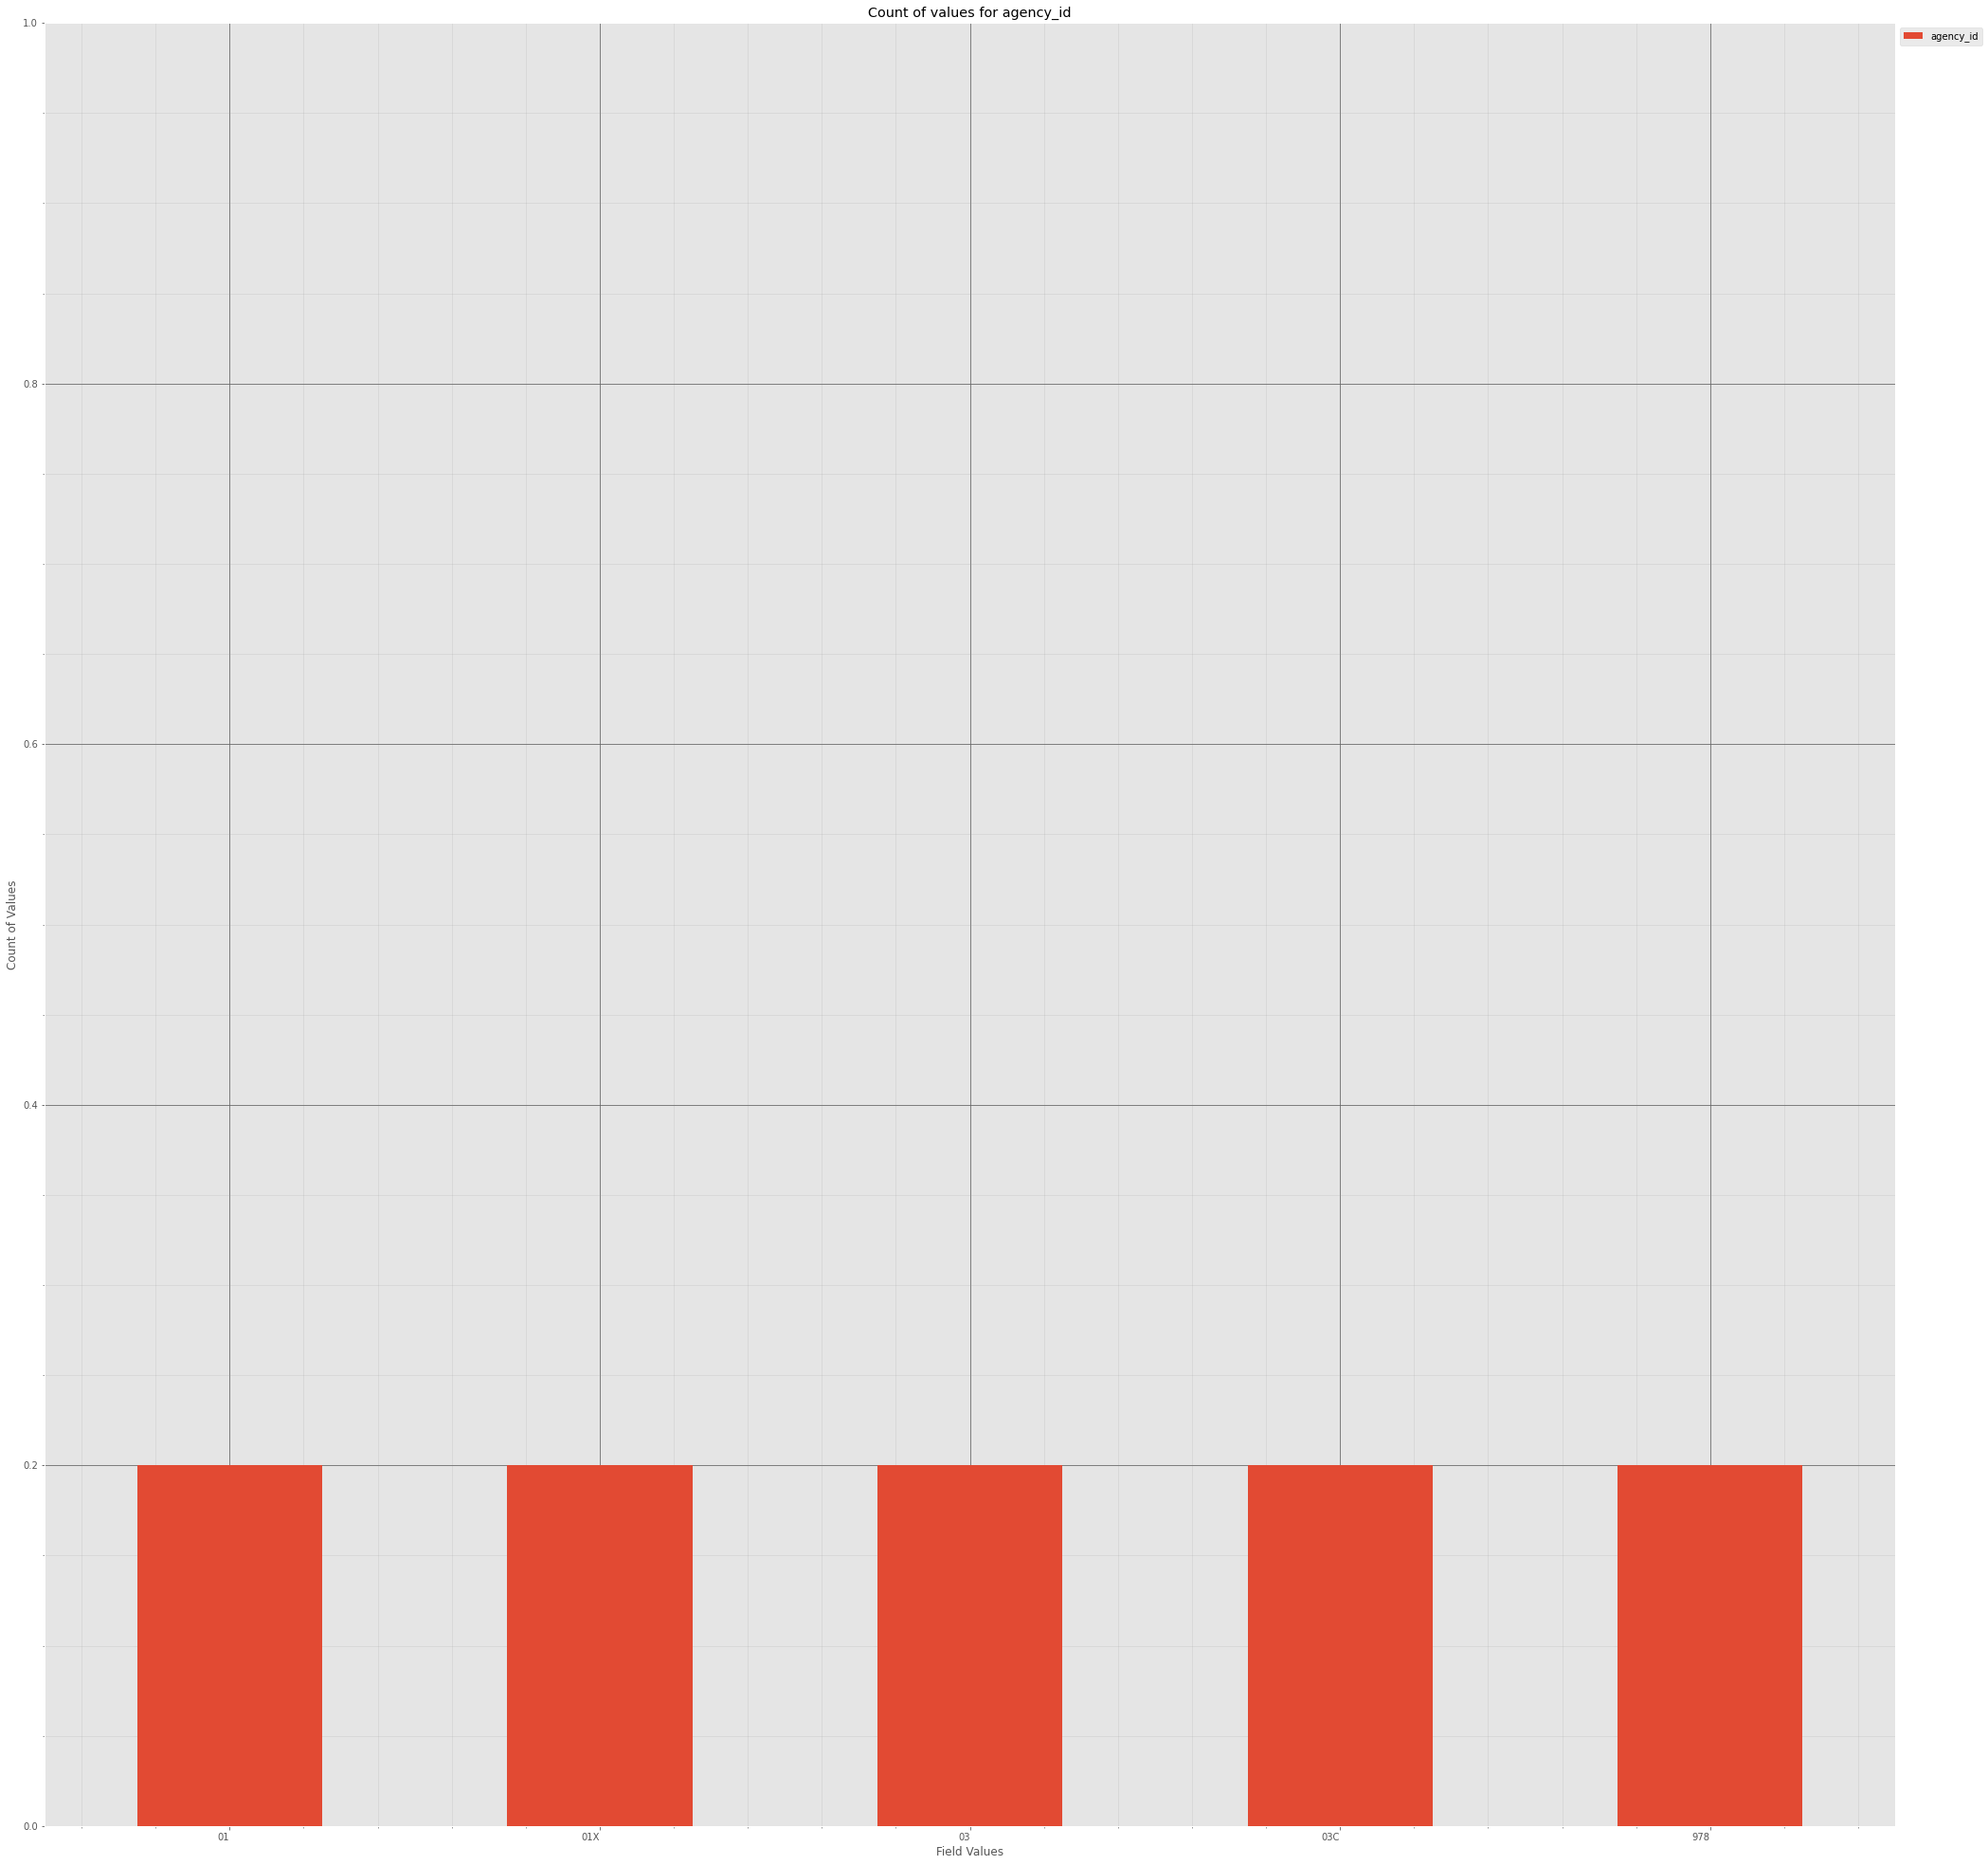



----------------------


                  agency_id
agency_name                
Bus Éireann               1
Dublin Bus                1
Expressway                1
Go-Ahead                  1
GoAhead Commuter          1
Grouping over agency_name results in:



,agency_name,Rows,% Frequency
0,Bus Éireann,1,20.0
1,Dublin Bus,1,20.0
2,Expressway,1,20.0
3,Go-Ahead,1,20.0
4,GoAhead Commuter,1,20.0


Non Zero Data:


,agency_name,Rows,% Frequency
0,Bus Éireann,1,20.0
1,Dublin Bus,1,20.0
2,Expressway,1,20.0
3,Go-Ahead,1,20.0
4,GoAhead Commuter,1,20.0


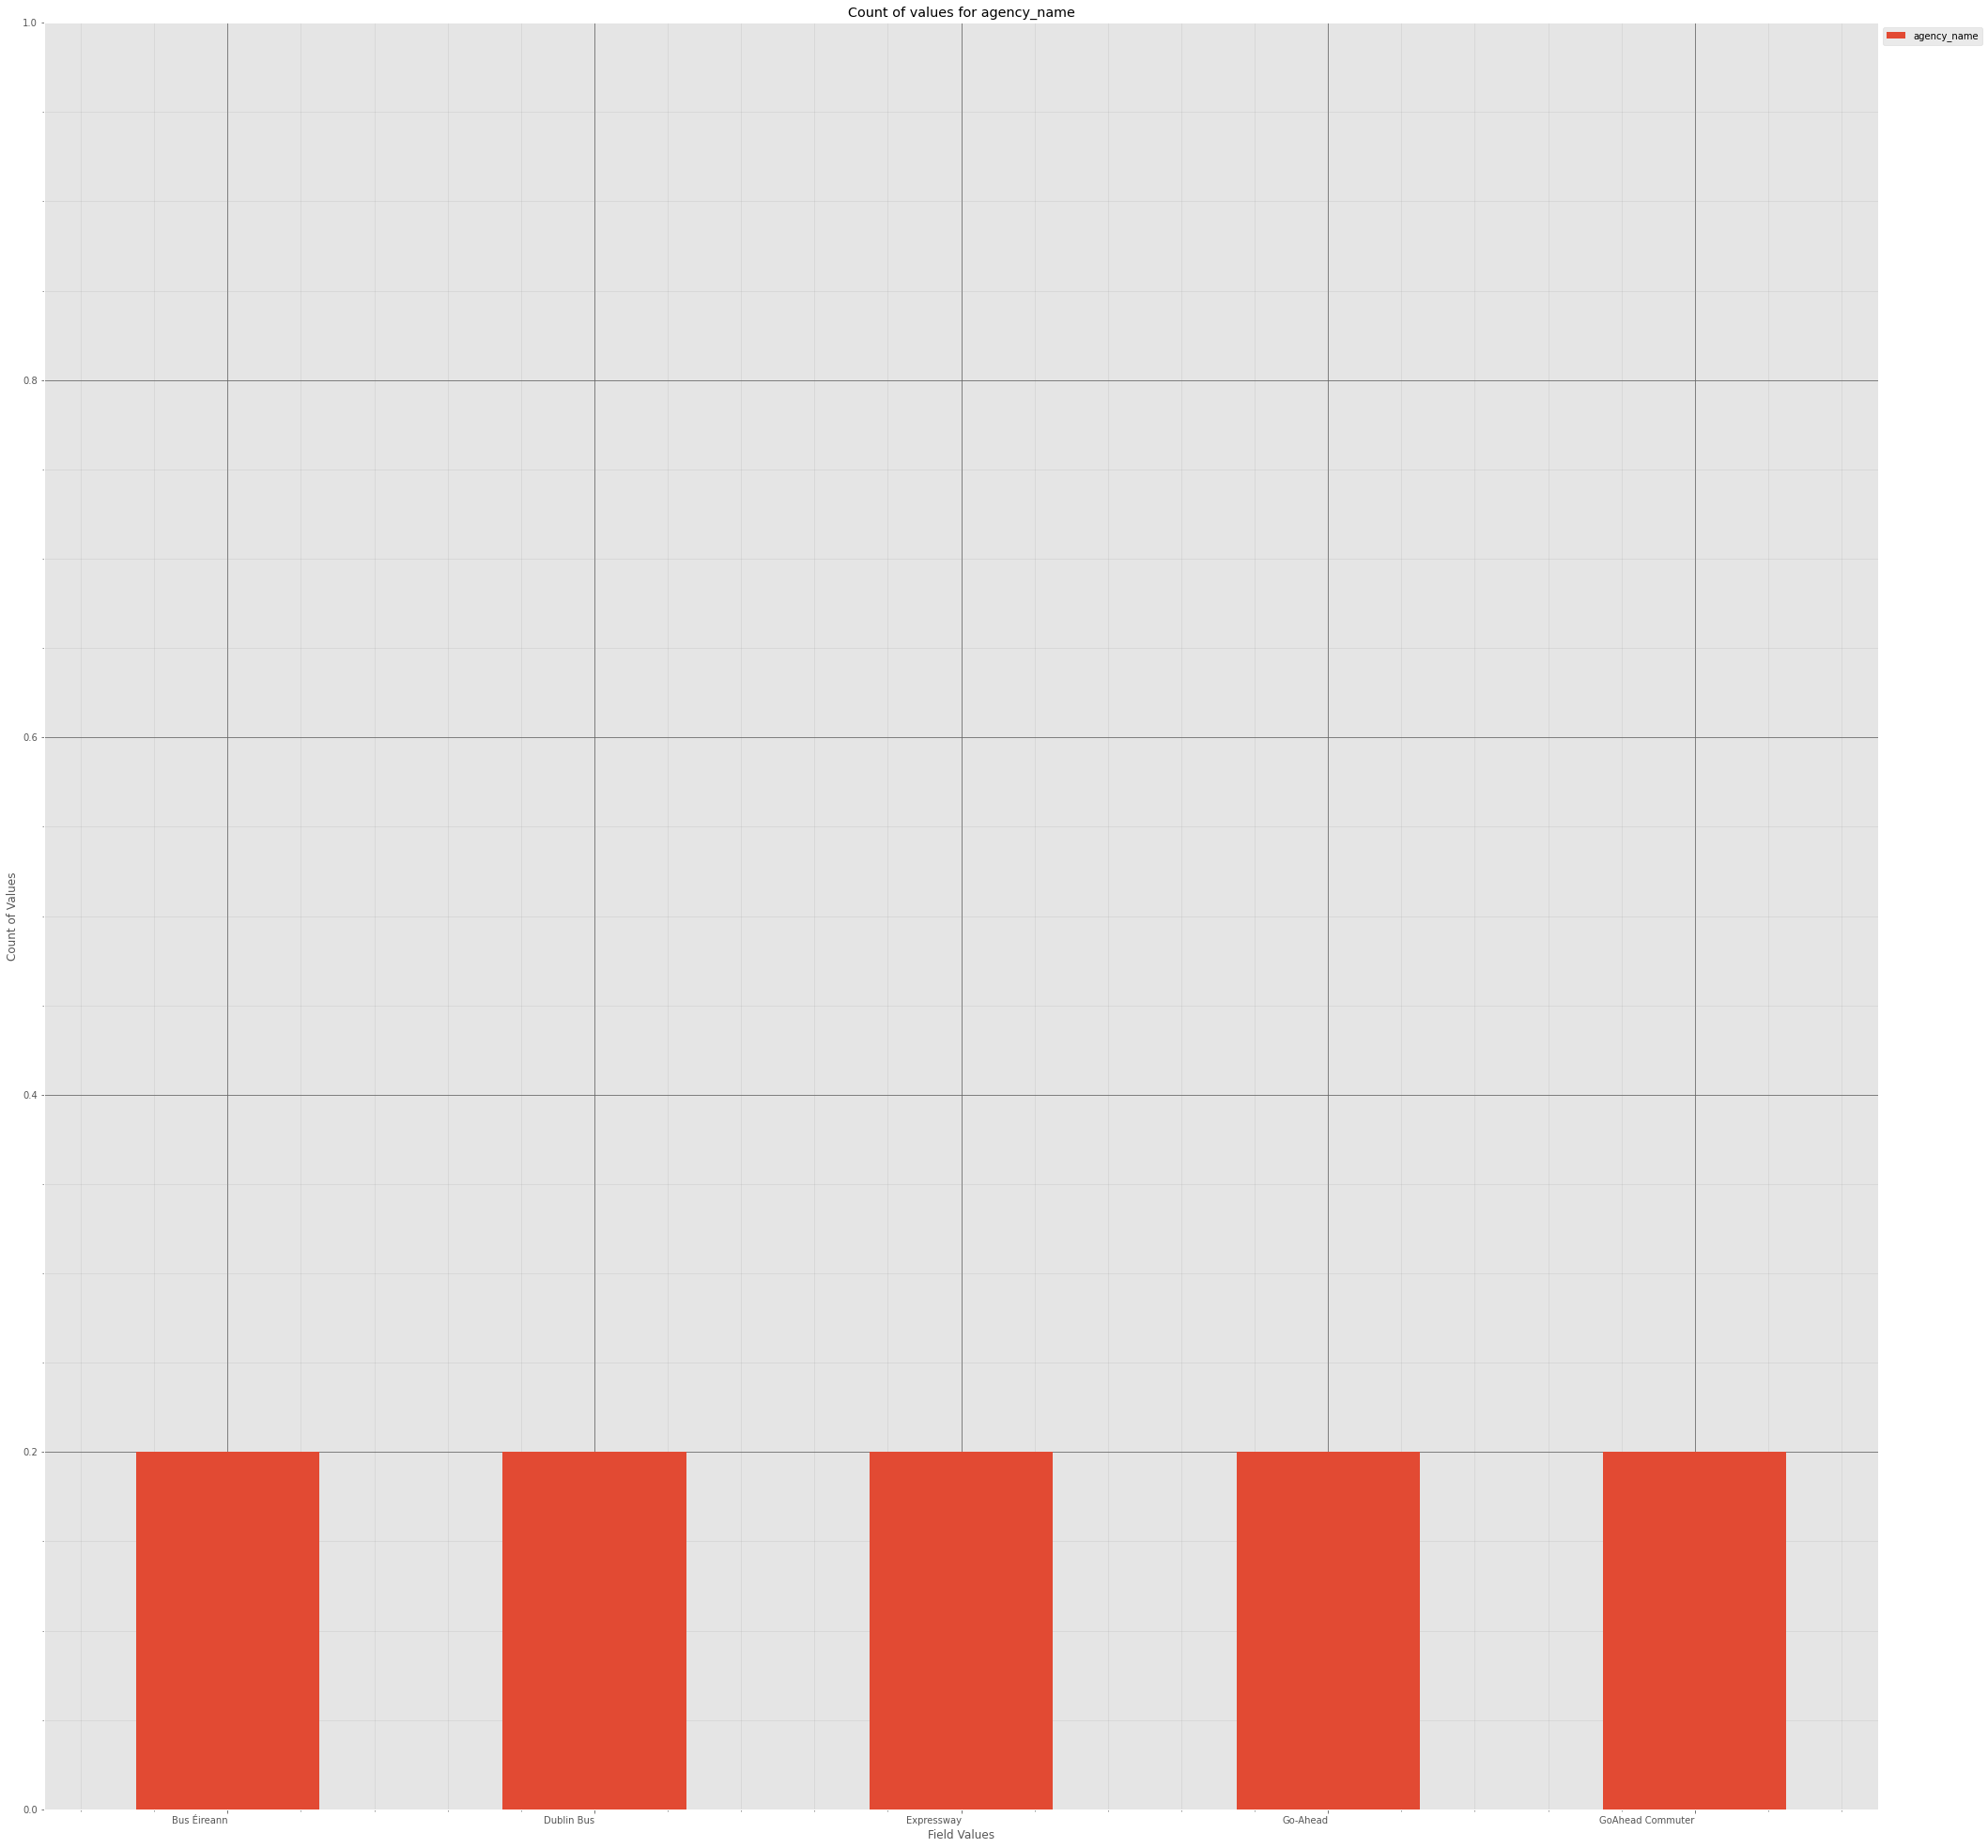



----------------------


                                    agency_id
agency_url                                   
https://www.transportforireland.ie          5
Grouping over agency_url results in:



,agency_url,Rows,% Frequency
0,https://www.transportforireland.ie,5,100.0


Non Zero Data:


,agency_url,Rows,% Frequency
0,https://www.transportforireland.ie,5,100.0


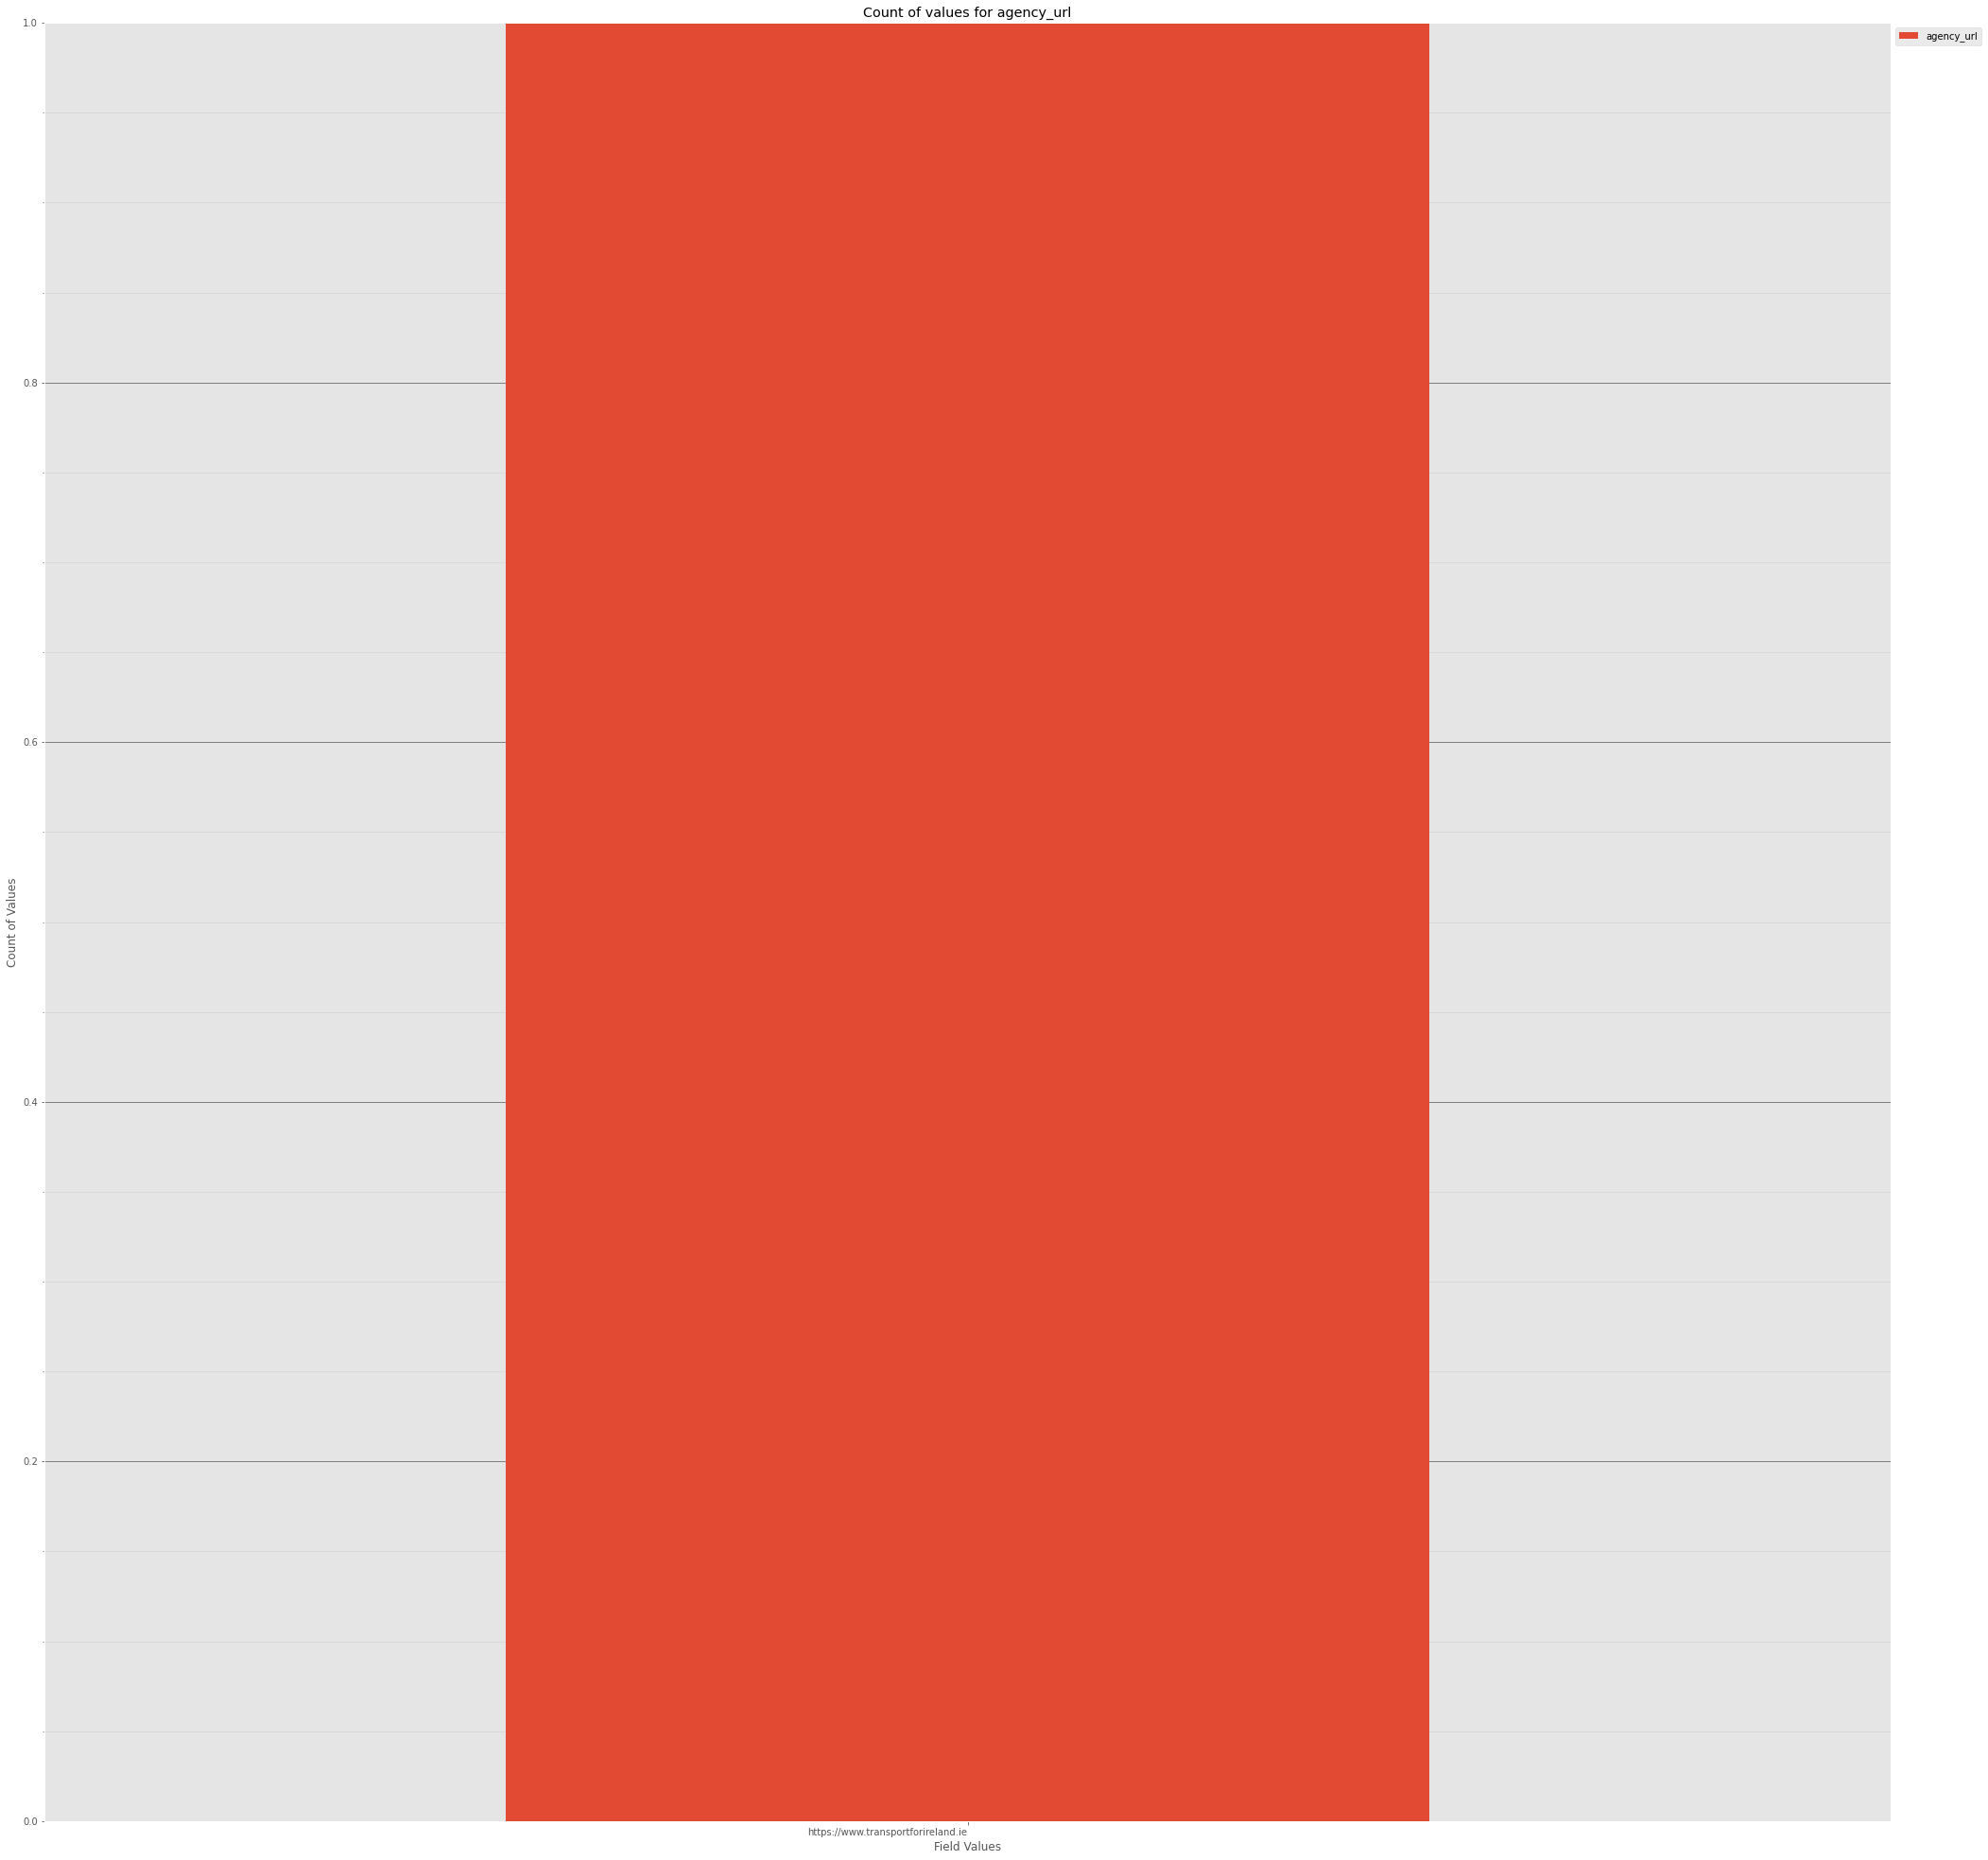



----------------------


                 agency_id
agency_timezone           
Europe/Dublin            5
Grouping over agency_timezone results in:



,agency_timezone,Rows,% Frequency
0,Europe/Dublin,5,100.0


Non Zero Data:


,agency_timezone,Rows,% Frequency
0,Europe/Dublin,5,100.0


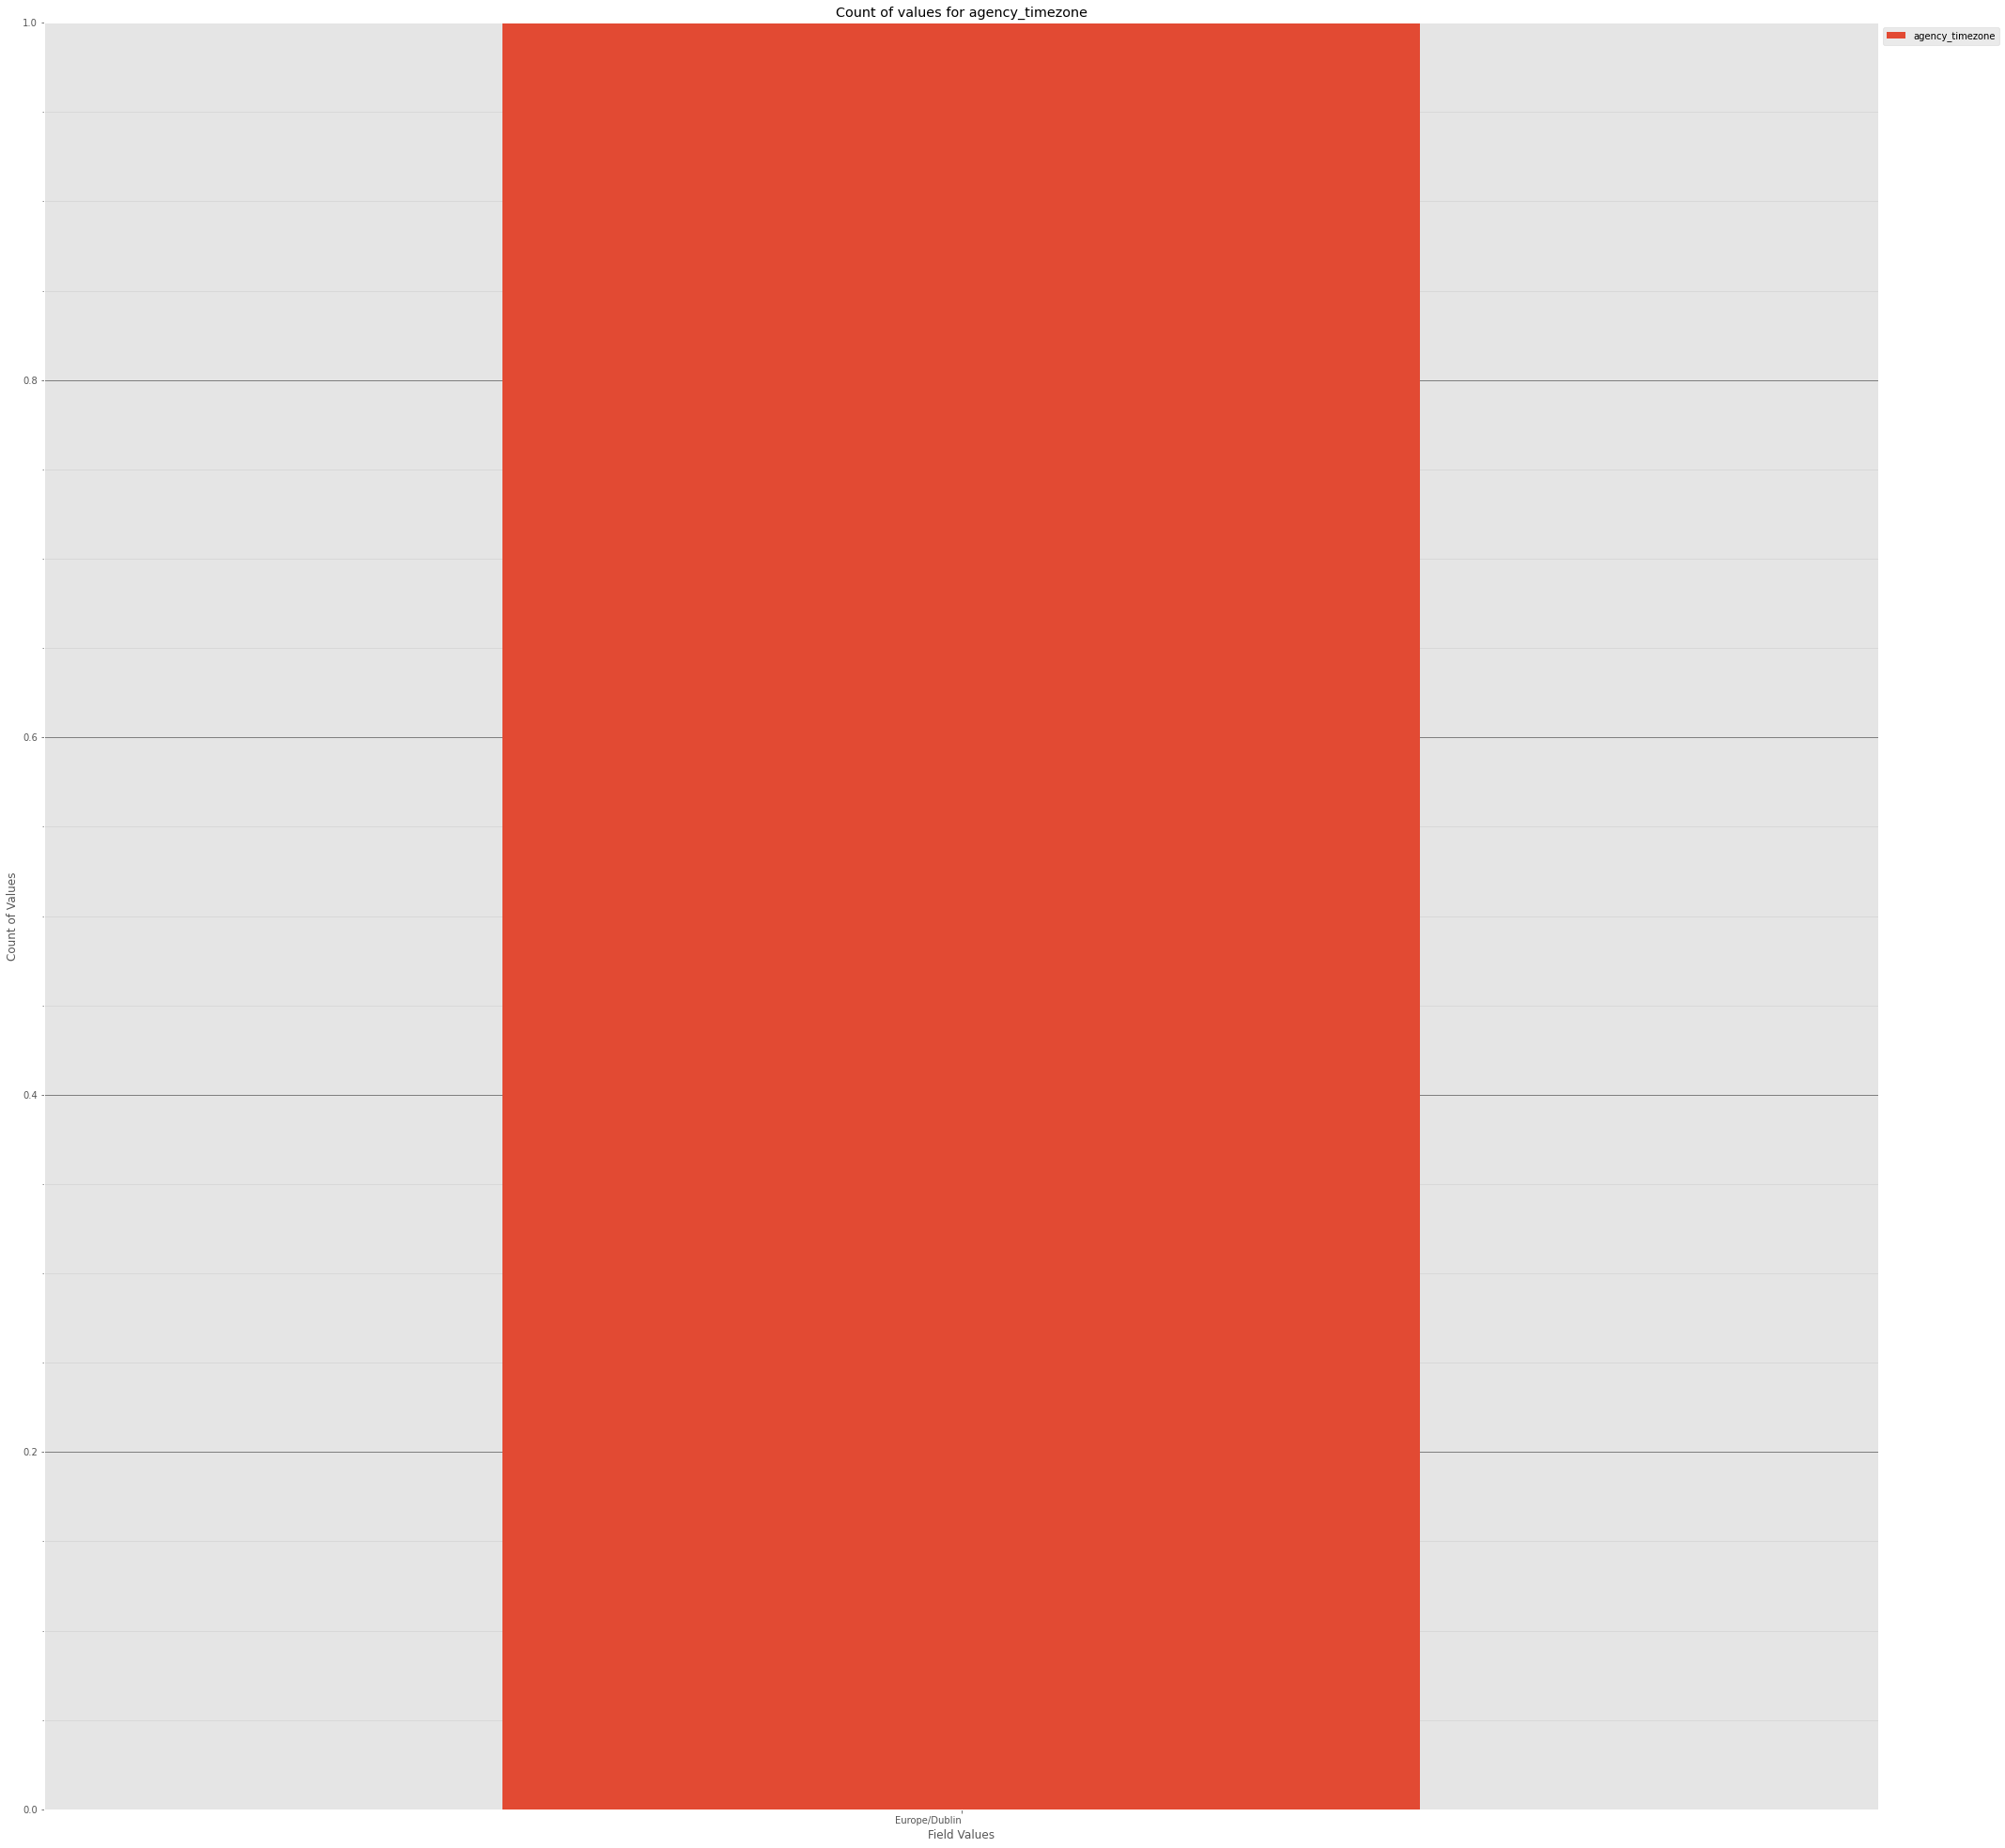



----------------------


             agency_id
agency_lang           
EN                   5
Grouping over agency_lang results in:



,agency_lang,Rows,% Frequency
0,EN,5,100.0


Non Zero Data:


,agency_lang,Rows,% Frequency
0,EN,5,100.0


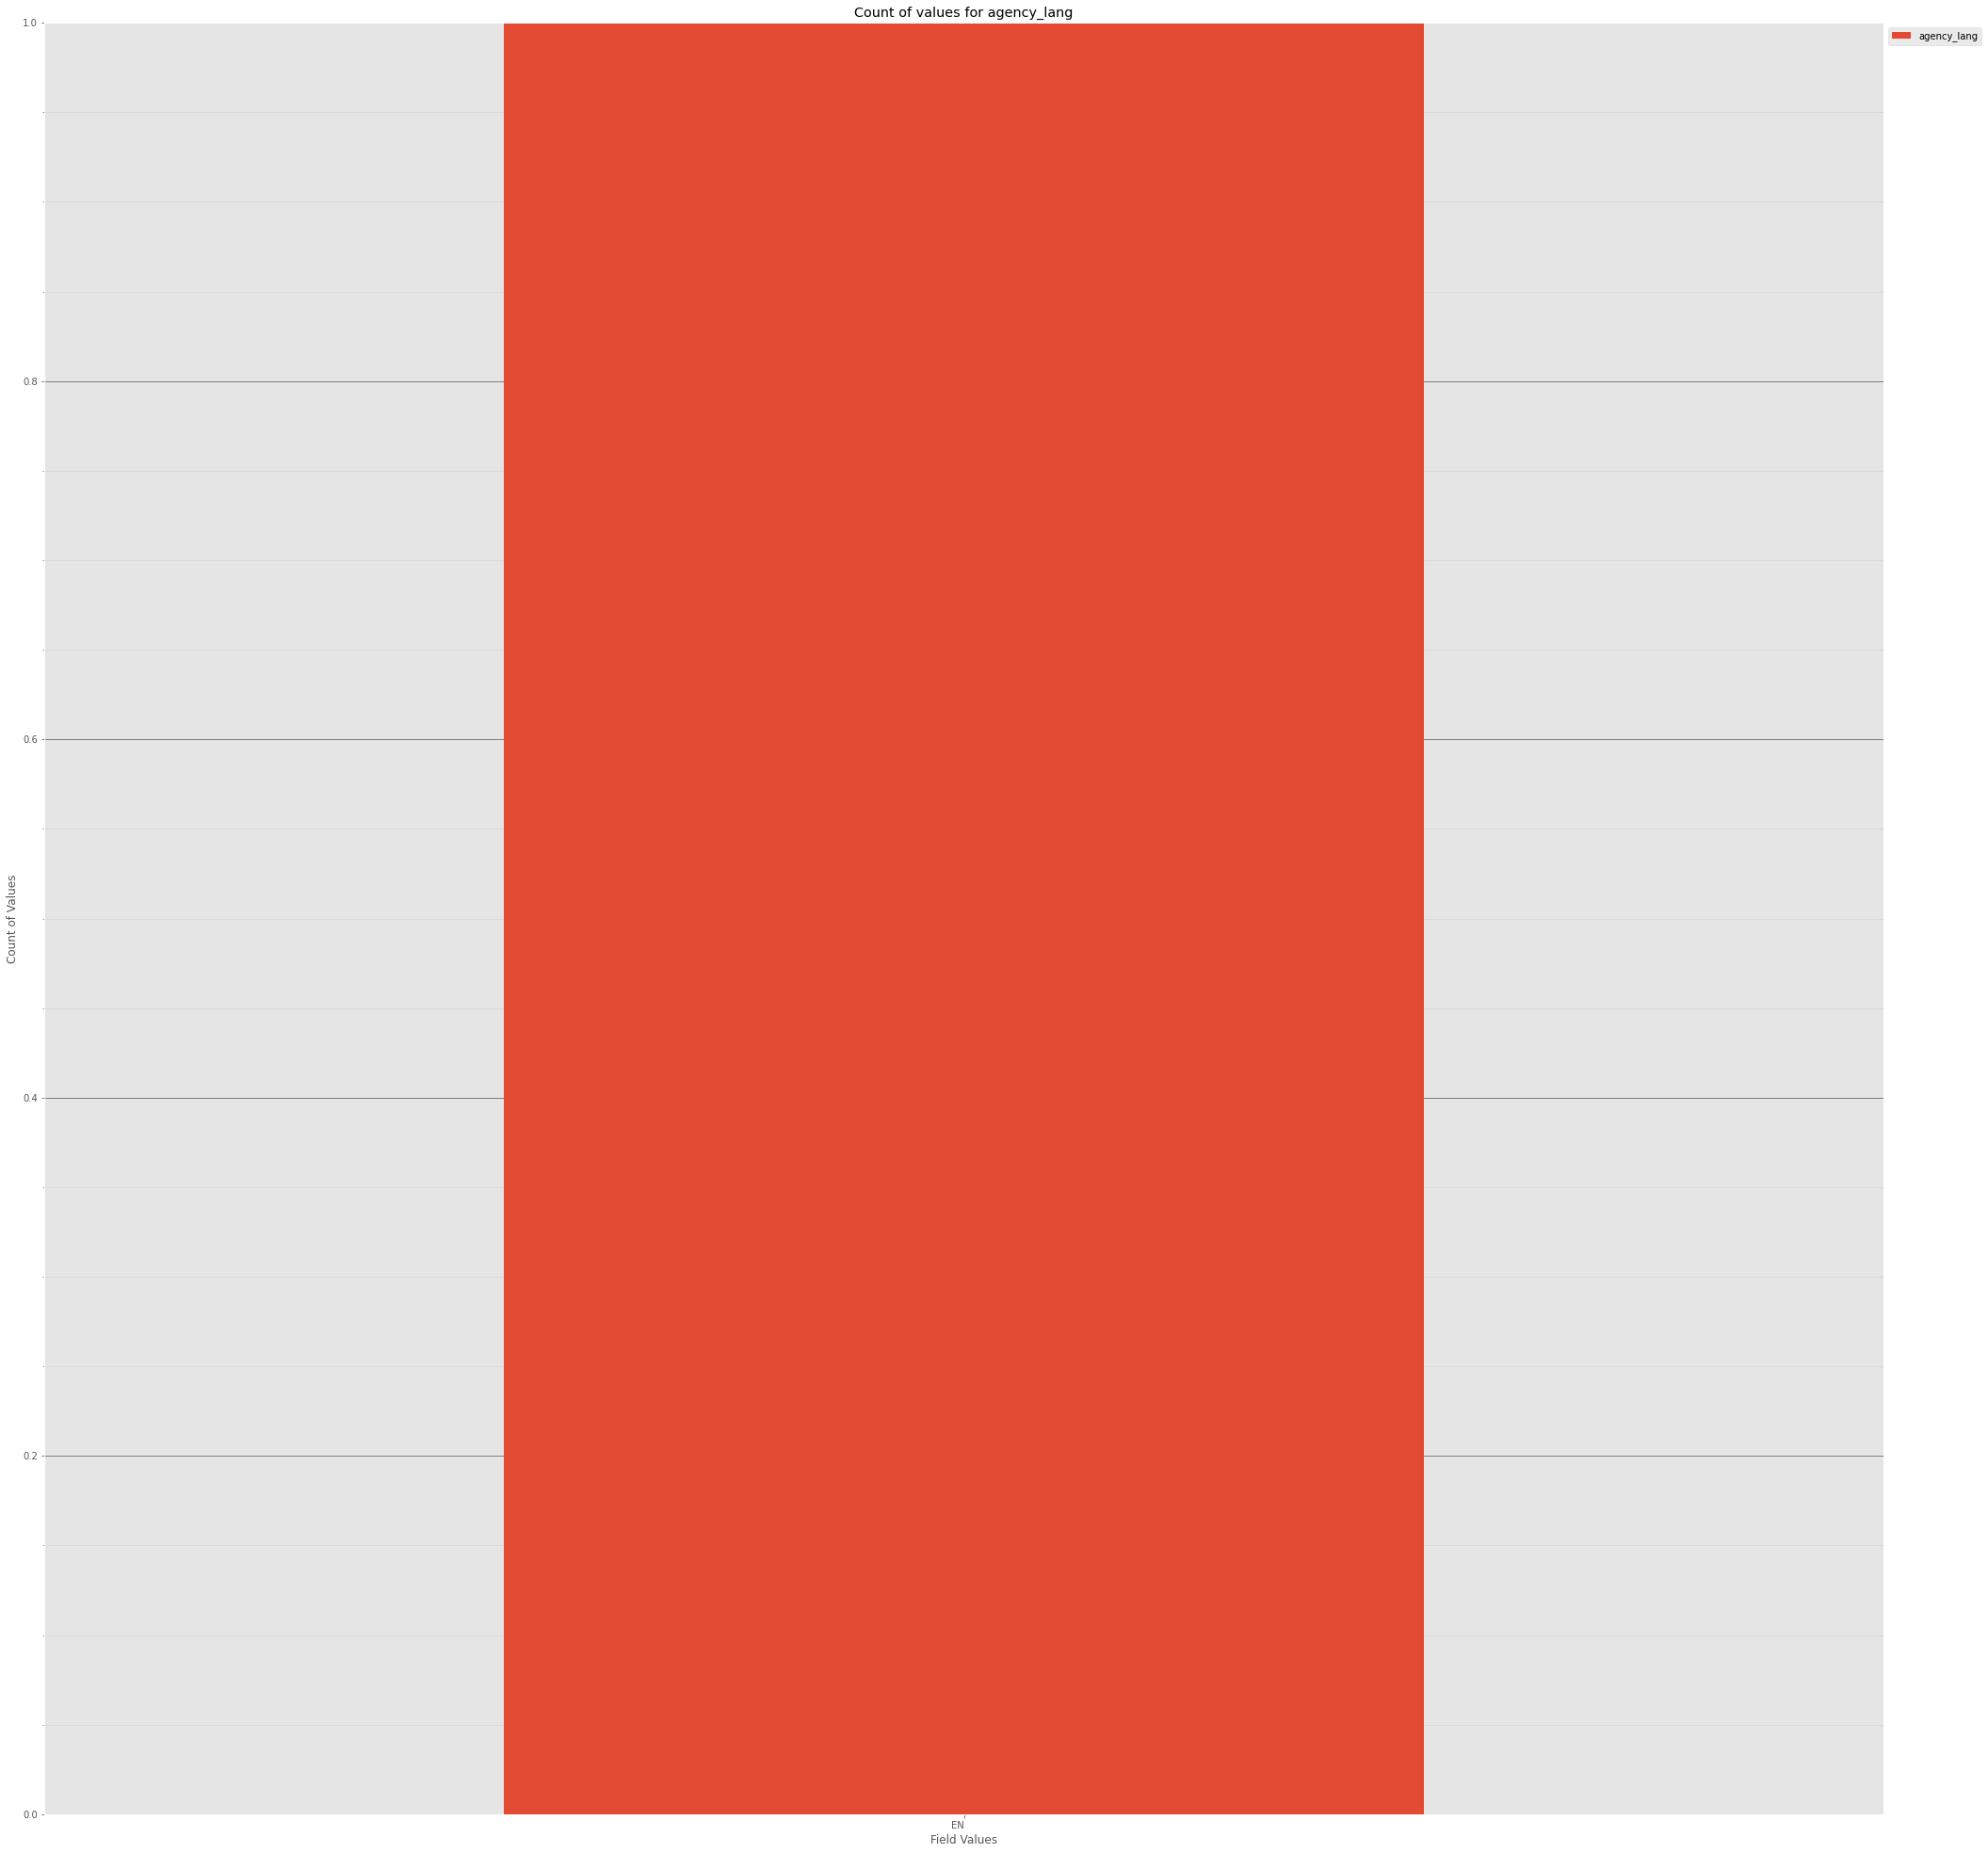

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,agency_id,agency_name,agency_url,agency_timezone,agency_lang


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()


----------------------


Grouping over agency_id|agency_name results in:



Rows  % Frequency
agency_id agency_name                        
01        Bus Éireann          1         20.0
          Dublin Bus           0          0.0
          Expressway           0          0.0
          Go-Ahead             0          0.0
          GoAhead Commuter     0          0.0
01X       Bus Éireann          0          0.0
          Dublin Bus           0          0.0
          Expressway           1         20.0
          Go-Ahead             0          0.0
          GoAhead Commuter     0          0.0
03        Bus Éireann          0          0.0
          Dublin Bus           0          0.0
          Expressway           0          0.0
          Go-Ahead             1         20.0
          GoAhead Commuter     0          0.0
03C       Bus Éireann          0          0.0
          Dublin Bus           0          0.0
          Expressway           0          0.0
          Go-Ahead             0          0.0
          GoAhead Commuter     1         20.0
978       Bus Éireann          0          0.0
          Dublin Bus           1         20.0
          Expressway           0          0.0
          Go-Ahead             0          0.0
          GoAhead Commuter     0          0.0

Non Zero Data:


,,Rows,% Frequency
agency_id,agency_name,,
01,Bus Éireann,1,20.0
01X,Expressway,1,20.0
03,Go-Ahead,1,20.0
03C,GoAhead Commuter,1,20.0
978,Dublin Bus,1,20.0


Function exception:

cannot insert agency_id, already exists
---------------------
---------------------
---------------------
BEGIN FILE: 2 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining calendar.txt:


Inside ingest_data(./data/Google_Transit_Static/calendar.txt,dictionary)
On Chunk: 1


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,0,0,0,0,0,0,1,20210623,20211218
1,1#1,1,0,0,0,0,0,1,20210623,20211204
2,1#2,0,0,0,0,0,0,1,20210623,20210731
3,10,0,0,1,0,0,0,0,20210623,20211204
4,10#1,0,1,0,0,0,0,0,20210623,20211218
...,...,...,...,...,...,...,...,...,...,...
80,y1012,0,0,0,0,1,0,0,20210623,20211218
81,y1012#1,0,0,0,0,1,0,0,20210623,20210731
82,y1013,0,0,0,1,0,0,0,20210623,20211218
83,y1014,0,0,1,0,0,0,0,20210623,20211218


Your file contains: 
85 rows x 10 columns.


The following columns are present:
"service_id"
"monday"
"tuesday"
"wednesday"
"thursday"
"friday"
"saturday"
"sunday"
"start_date"
"end_date"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,service_id,85,85,10403,1,100%,0%,1%,None
1,monday,85,2,0,67,100%,0%,79%,None
2,tuesday,85,2,0,73,100%,0%,86%,None
3,wednesday,85,2,0,69,100%,0%,81%,None
4,thursday,85,2,0,69,100%,0%,81%,None
5,friday,85,2,0,69,100%,0%,81%,None
6,saturday,85,2,0,74,100%,0%,87%,None
7,sunday,85,2,0,75,100%,0%,88%,None
8,start_date,85,2,20210623,69,100%,0%,81%,None
9,end_date,85,7,20211218,29,100%,0%,34%,None





Sample Data:





,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,0,0,0,0,0,0,1,20210623,20211218
1,1#1,1,0,0,0,0,0,1,20210623,20211204
2,1#2,0,0,0,0,0,0,1,20210623,20210731
3,10,0,0,1,0,0,0,0,20210623,20211204
4,10#1,0,1,0,0,0,0,0,20210623,20211218


Inside data_convert()
Converting to datetime
Inside data_convert()
Converting to category
Inside data_convert()
No need to convert
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


            service_id
service_id            
1                    1
1#1                  1
1#2                  1
10                   1
10#1                 1
...                ...
y1012                1
y1012#1              1
y1013                1
y1014                1
y1015                1

[85 rows x 1 columns]
Grouping over service_id results in:



,service_id,Rows,% Frequency
0,1,1,1.176471
1,1#1,1,1.176471
2,1#2,1,1.176471
3,10,1,1.176471
4,10#1,1,1.176471
...,...,...,...
80,y1012,1,1.176471
81,y1012#1,1,1.176471
82,y1013,1,1.176471
83,y1014,1,1.176471


Non Zero Data:


,service_id,Rows,% Frequency
0,1,1,1.176471
1,1#1,1,1.176471
2,1#2,1,1.176471
3,10,1,1.176471
4,10#1,1,1.176471
...,...,...,...
80,y1012,1,1.176471
81,y1012#1,1,1.176471
82,y1013,1,1.176471
83,y1014,1,1.176471


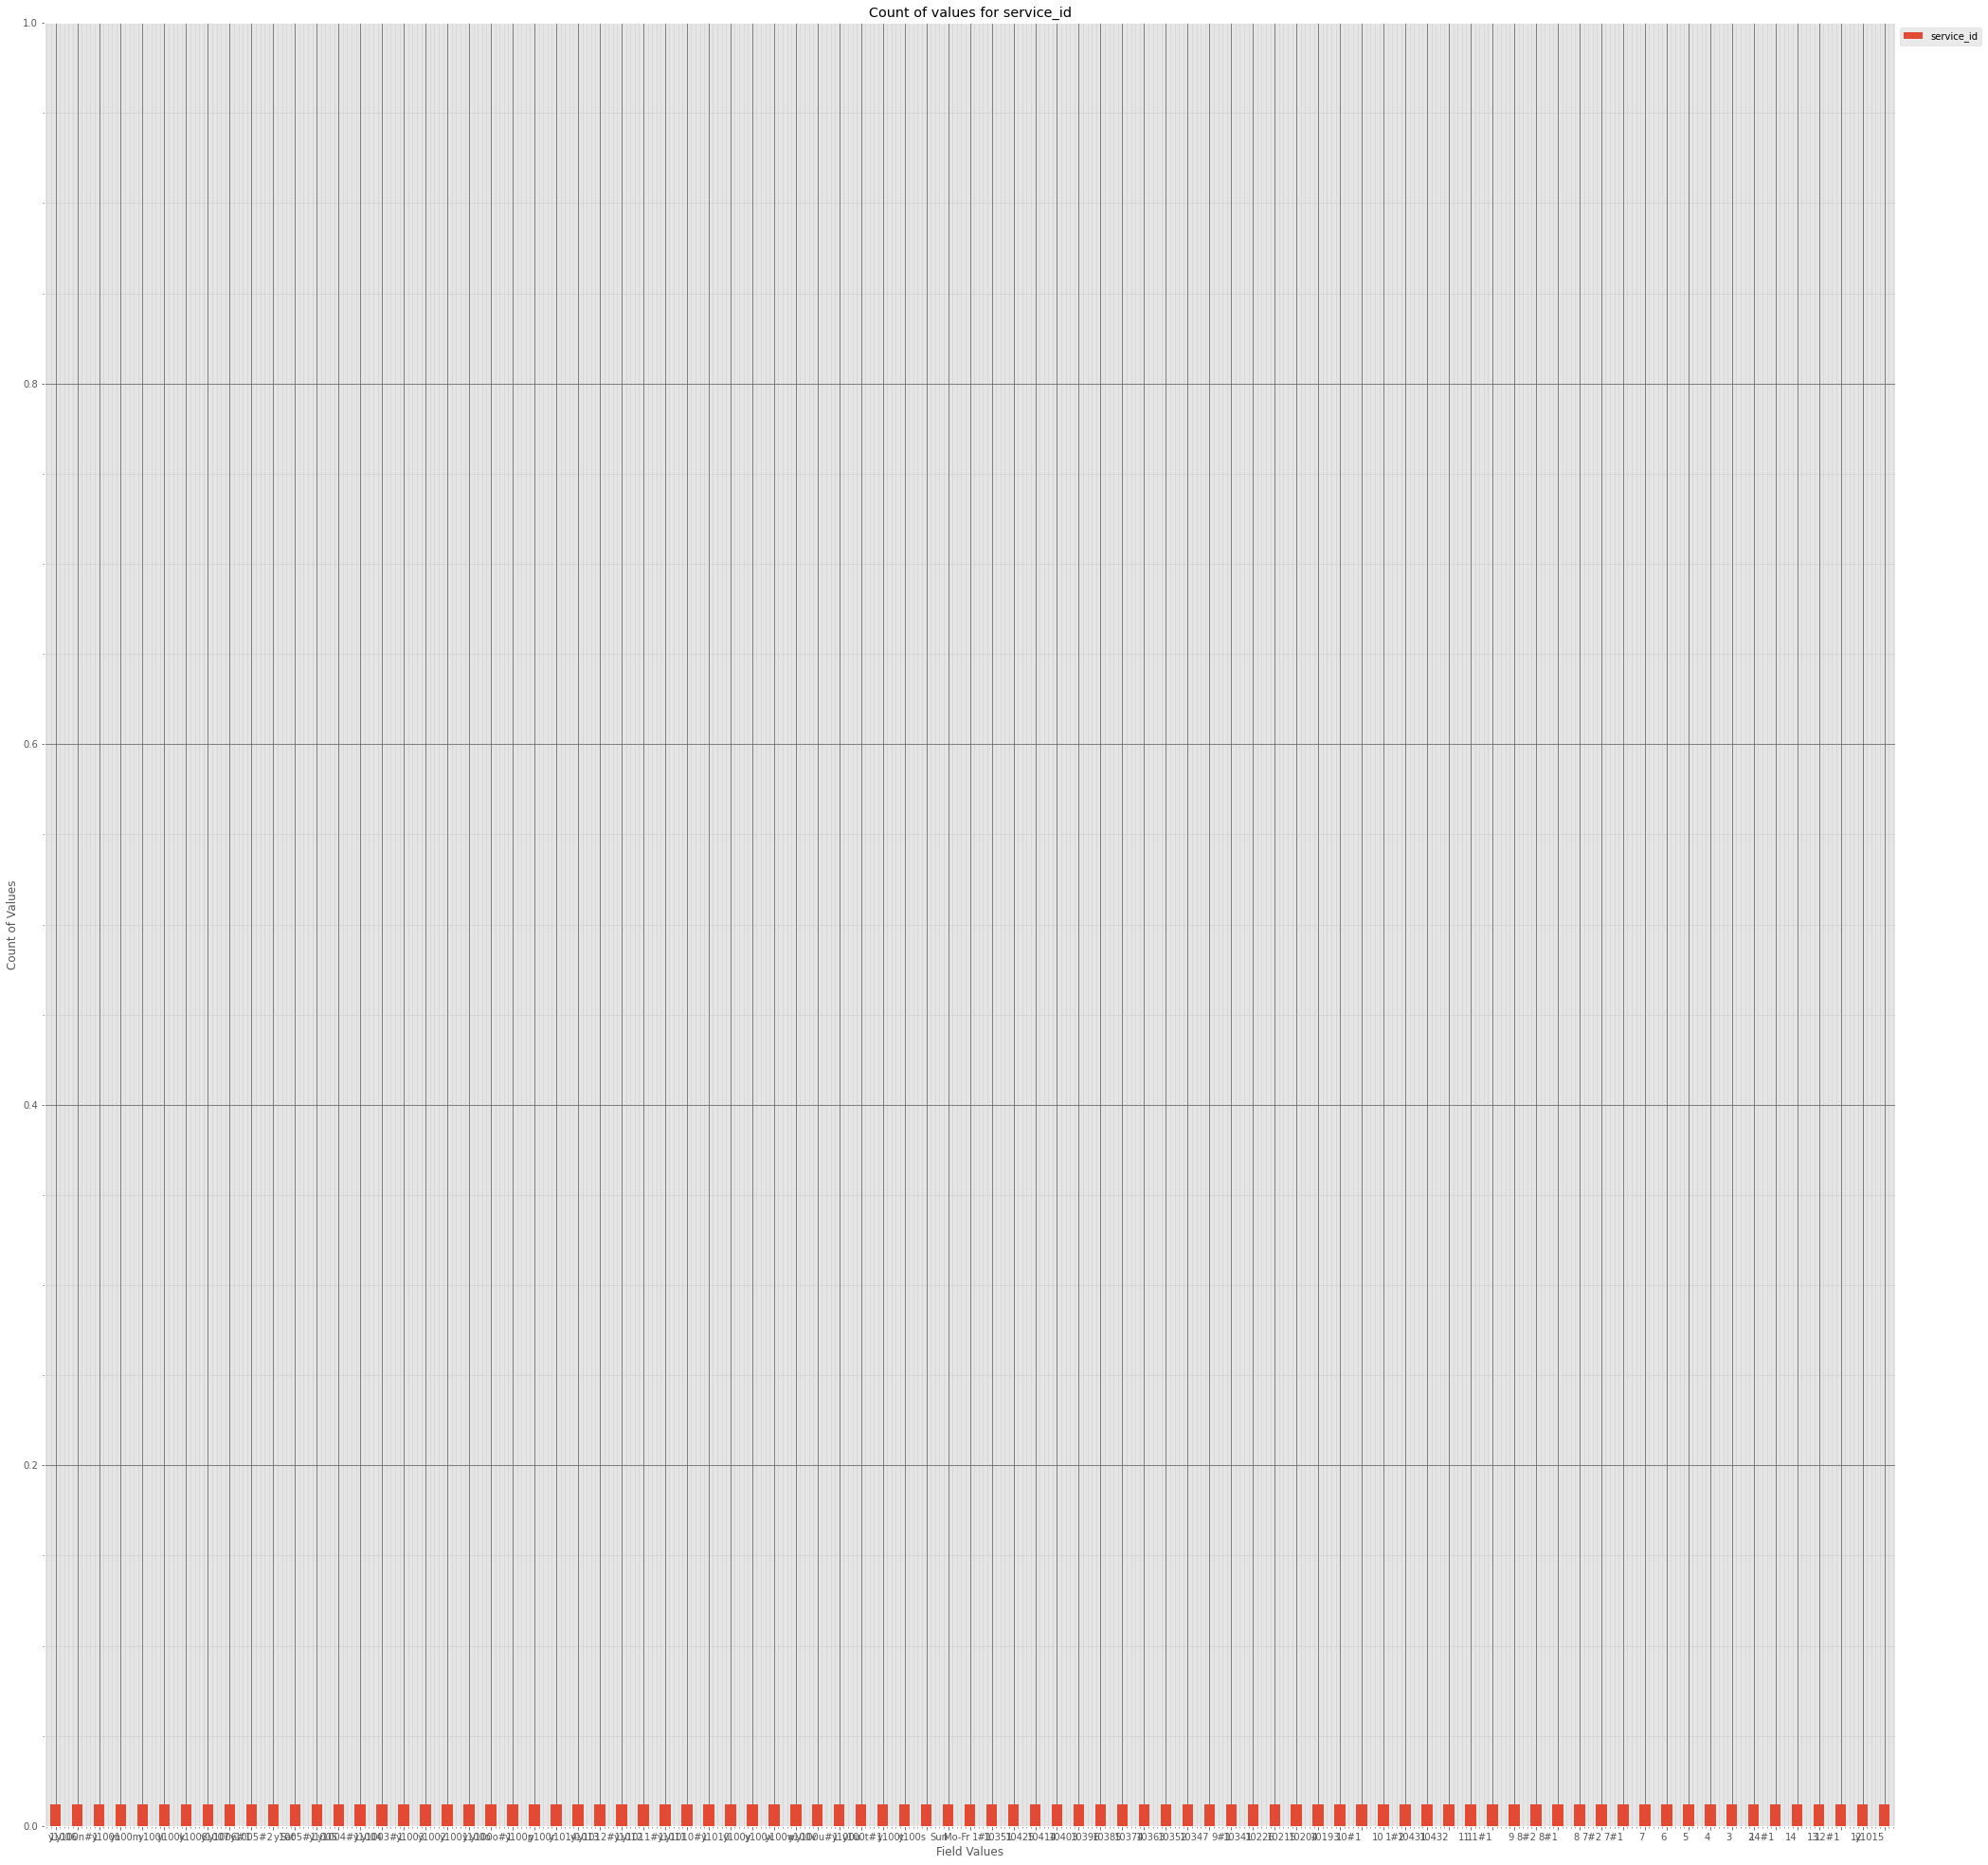



----------------------


        service_id
monday            
0               67
1               18
Grouping over monday results in:



,monday,Rows,% Frequency
0,0,67,78.823529
1,1,18,21.176471


Non Zero Data:


,monday,Rows,% Frequency
0,0,67,78.823529
1,1,18,21.176471


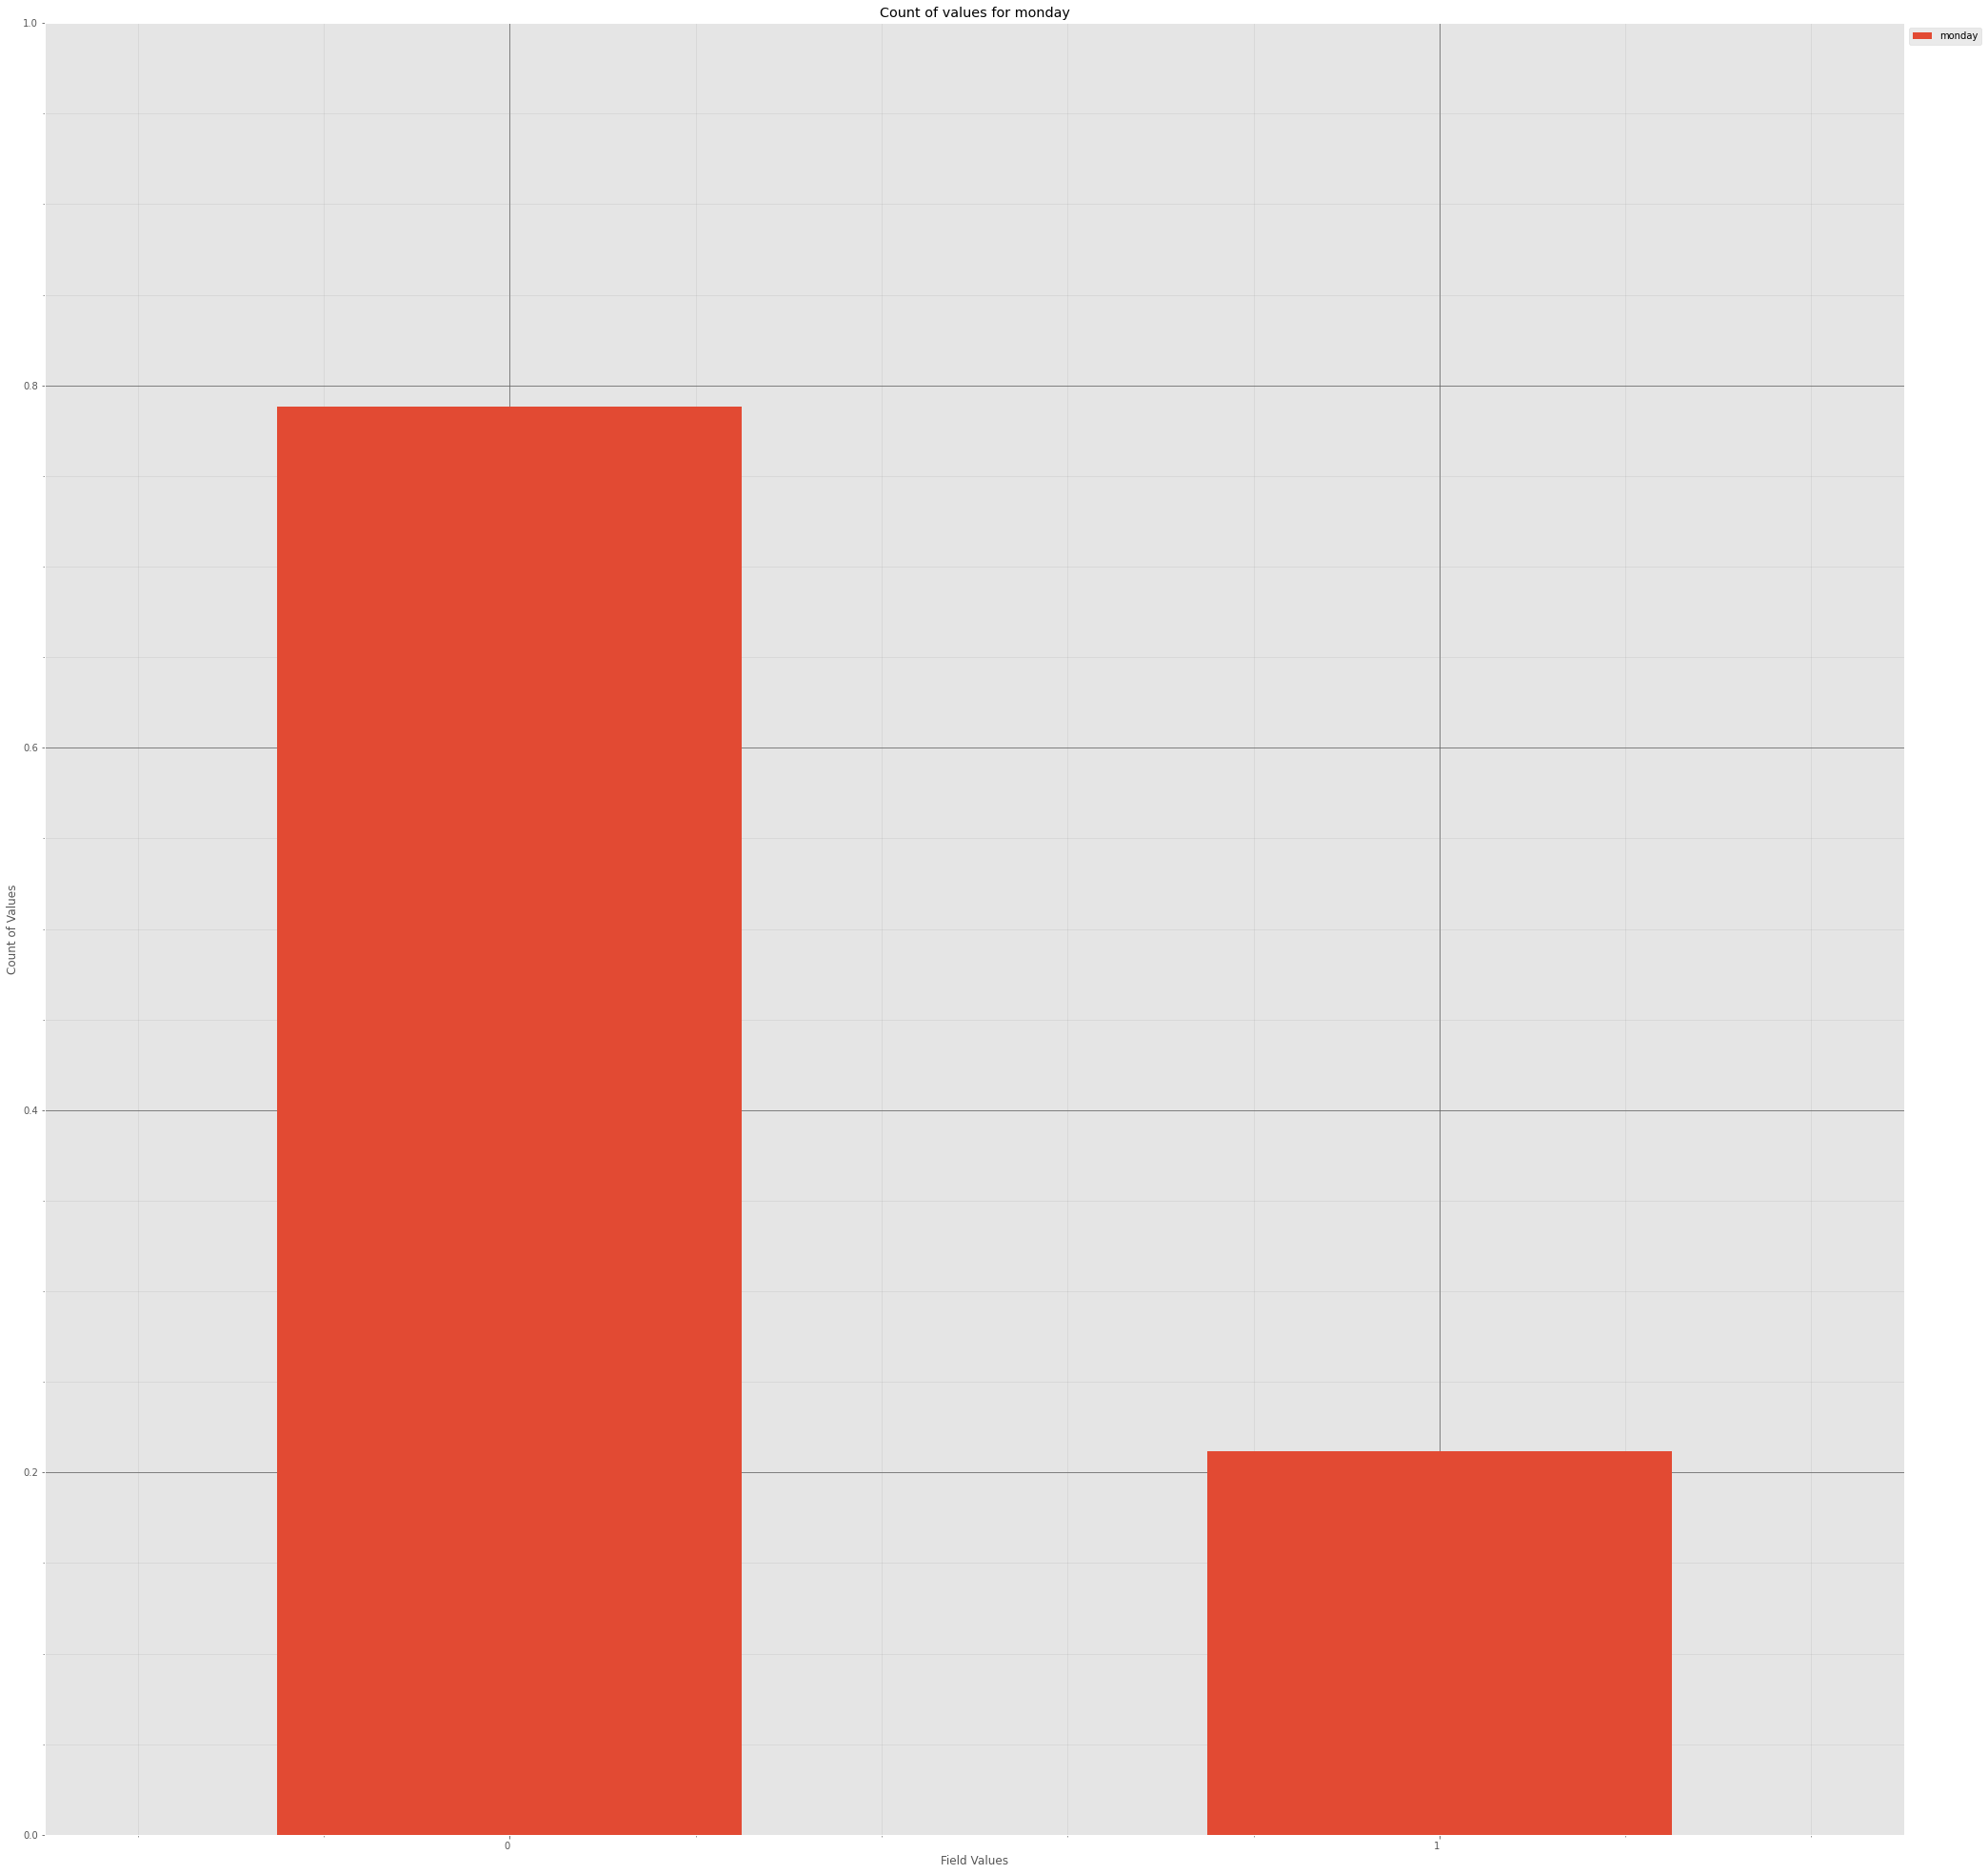



----------------------


         service_id
tuesday            
0                73
1                12
Grouping over tuesday results in:



,tuesday,Rows,% Frequency
0,0,73,85.882353
1,1,12,14.117647


Non Zero Data:


,tuesday,Rows,% Frequency
0,0,73,85.882353
1,1,12,14.117647


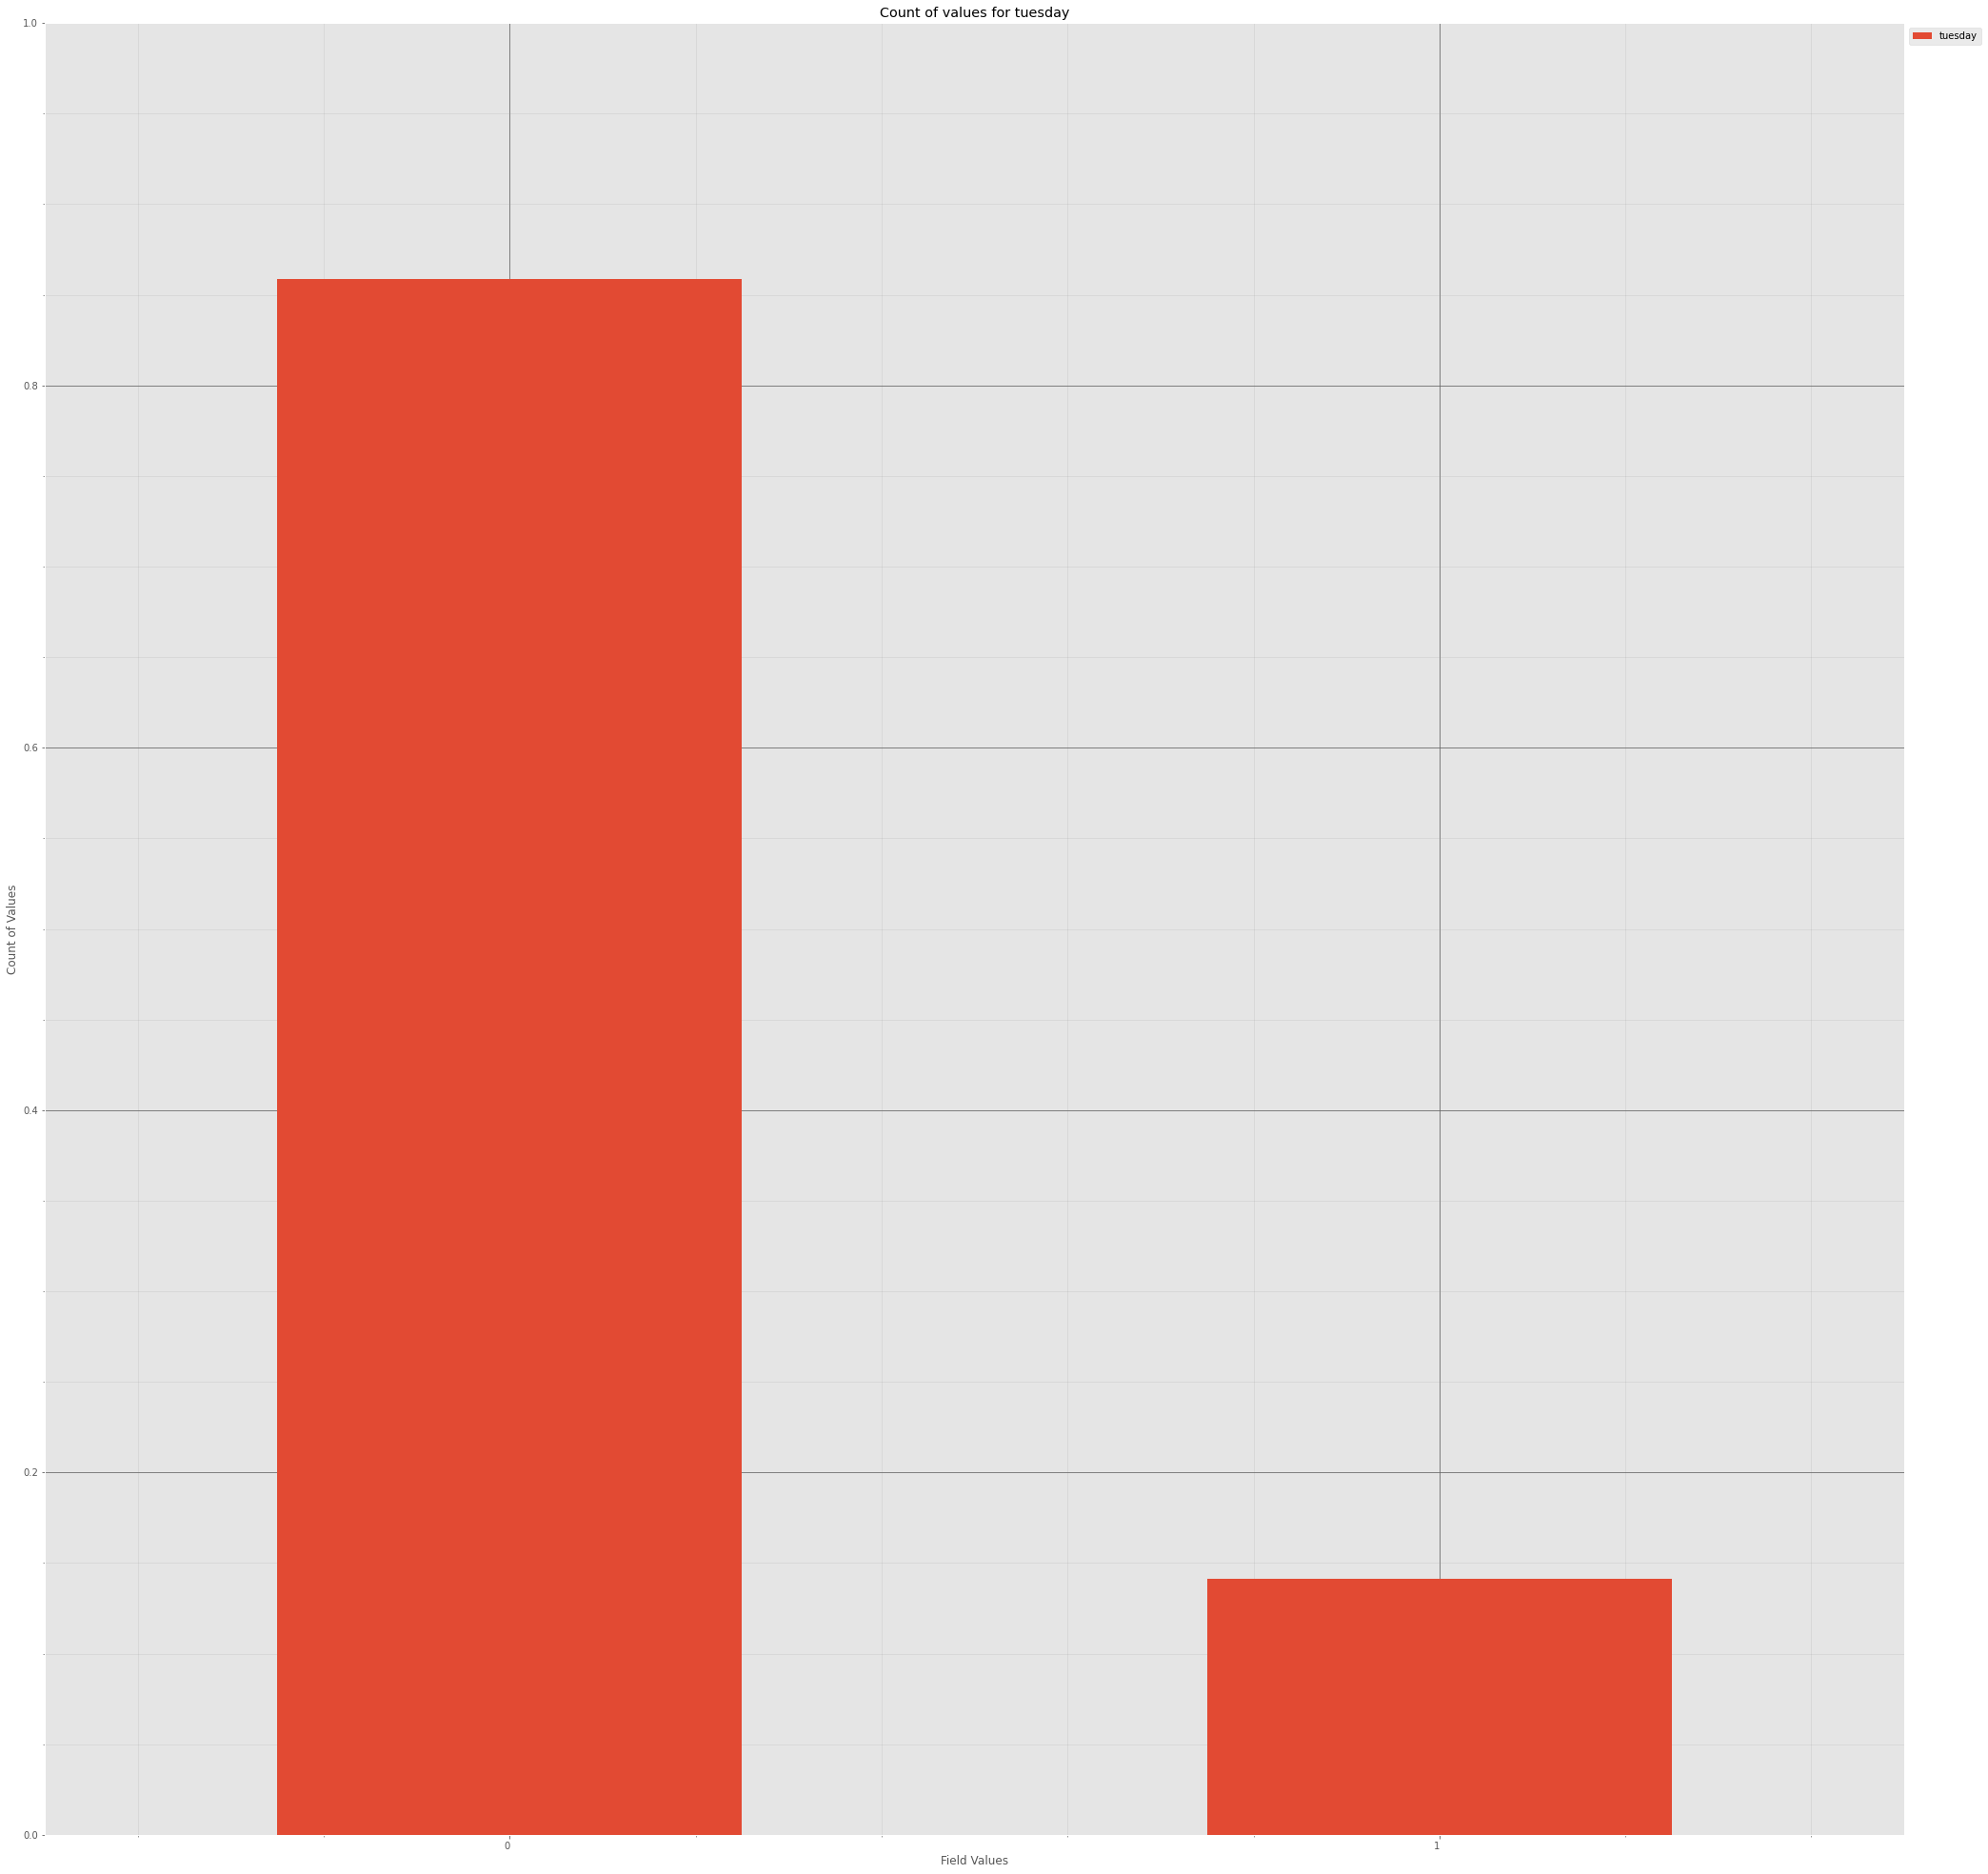



----------------------


           service_id
wednesday            
0                  69
1                  16
Grouping over wednesday results in:



,wednesday,Rows,% Frequency
0,0,69,81.176471
1,1,16,18.823529


Non Zero Data:


,wednesday,Rows,% Frequency
0,0,69,81.176471
1,1,16,18.823529


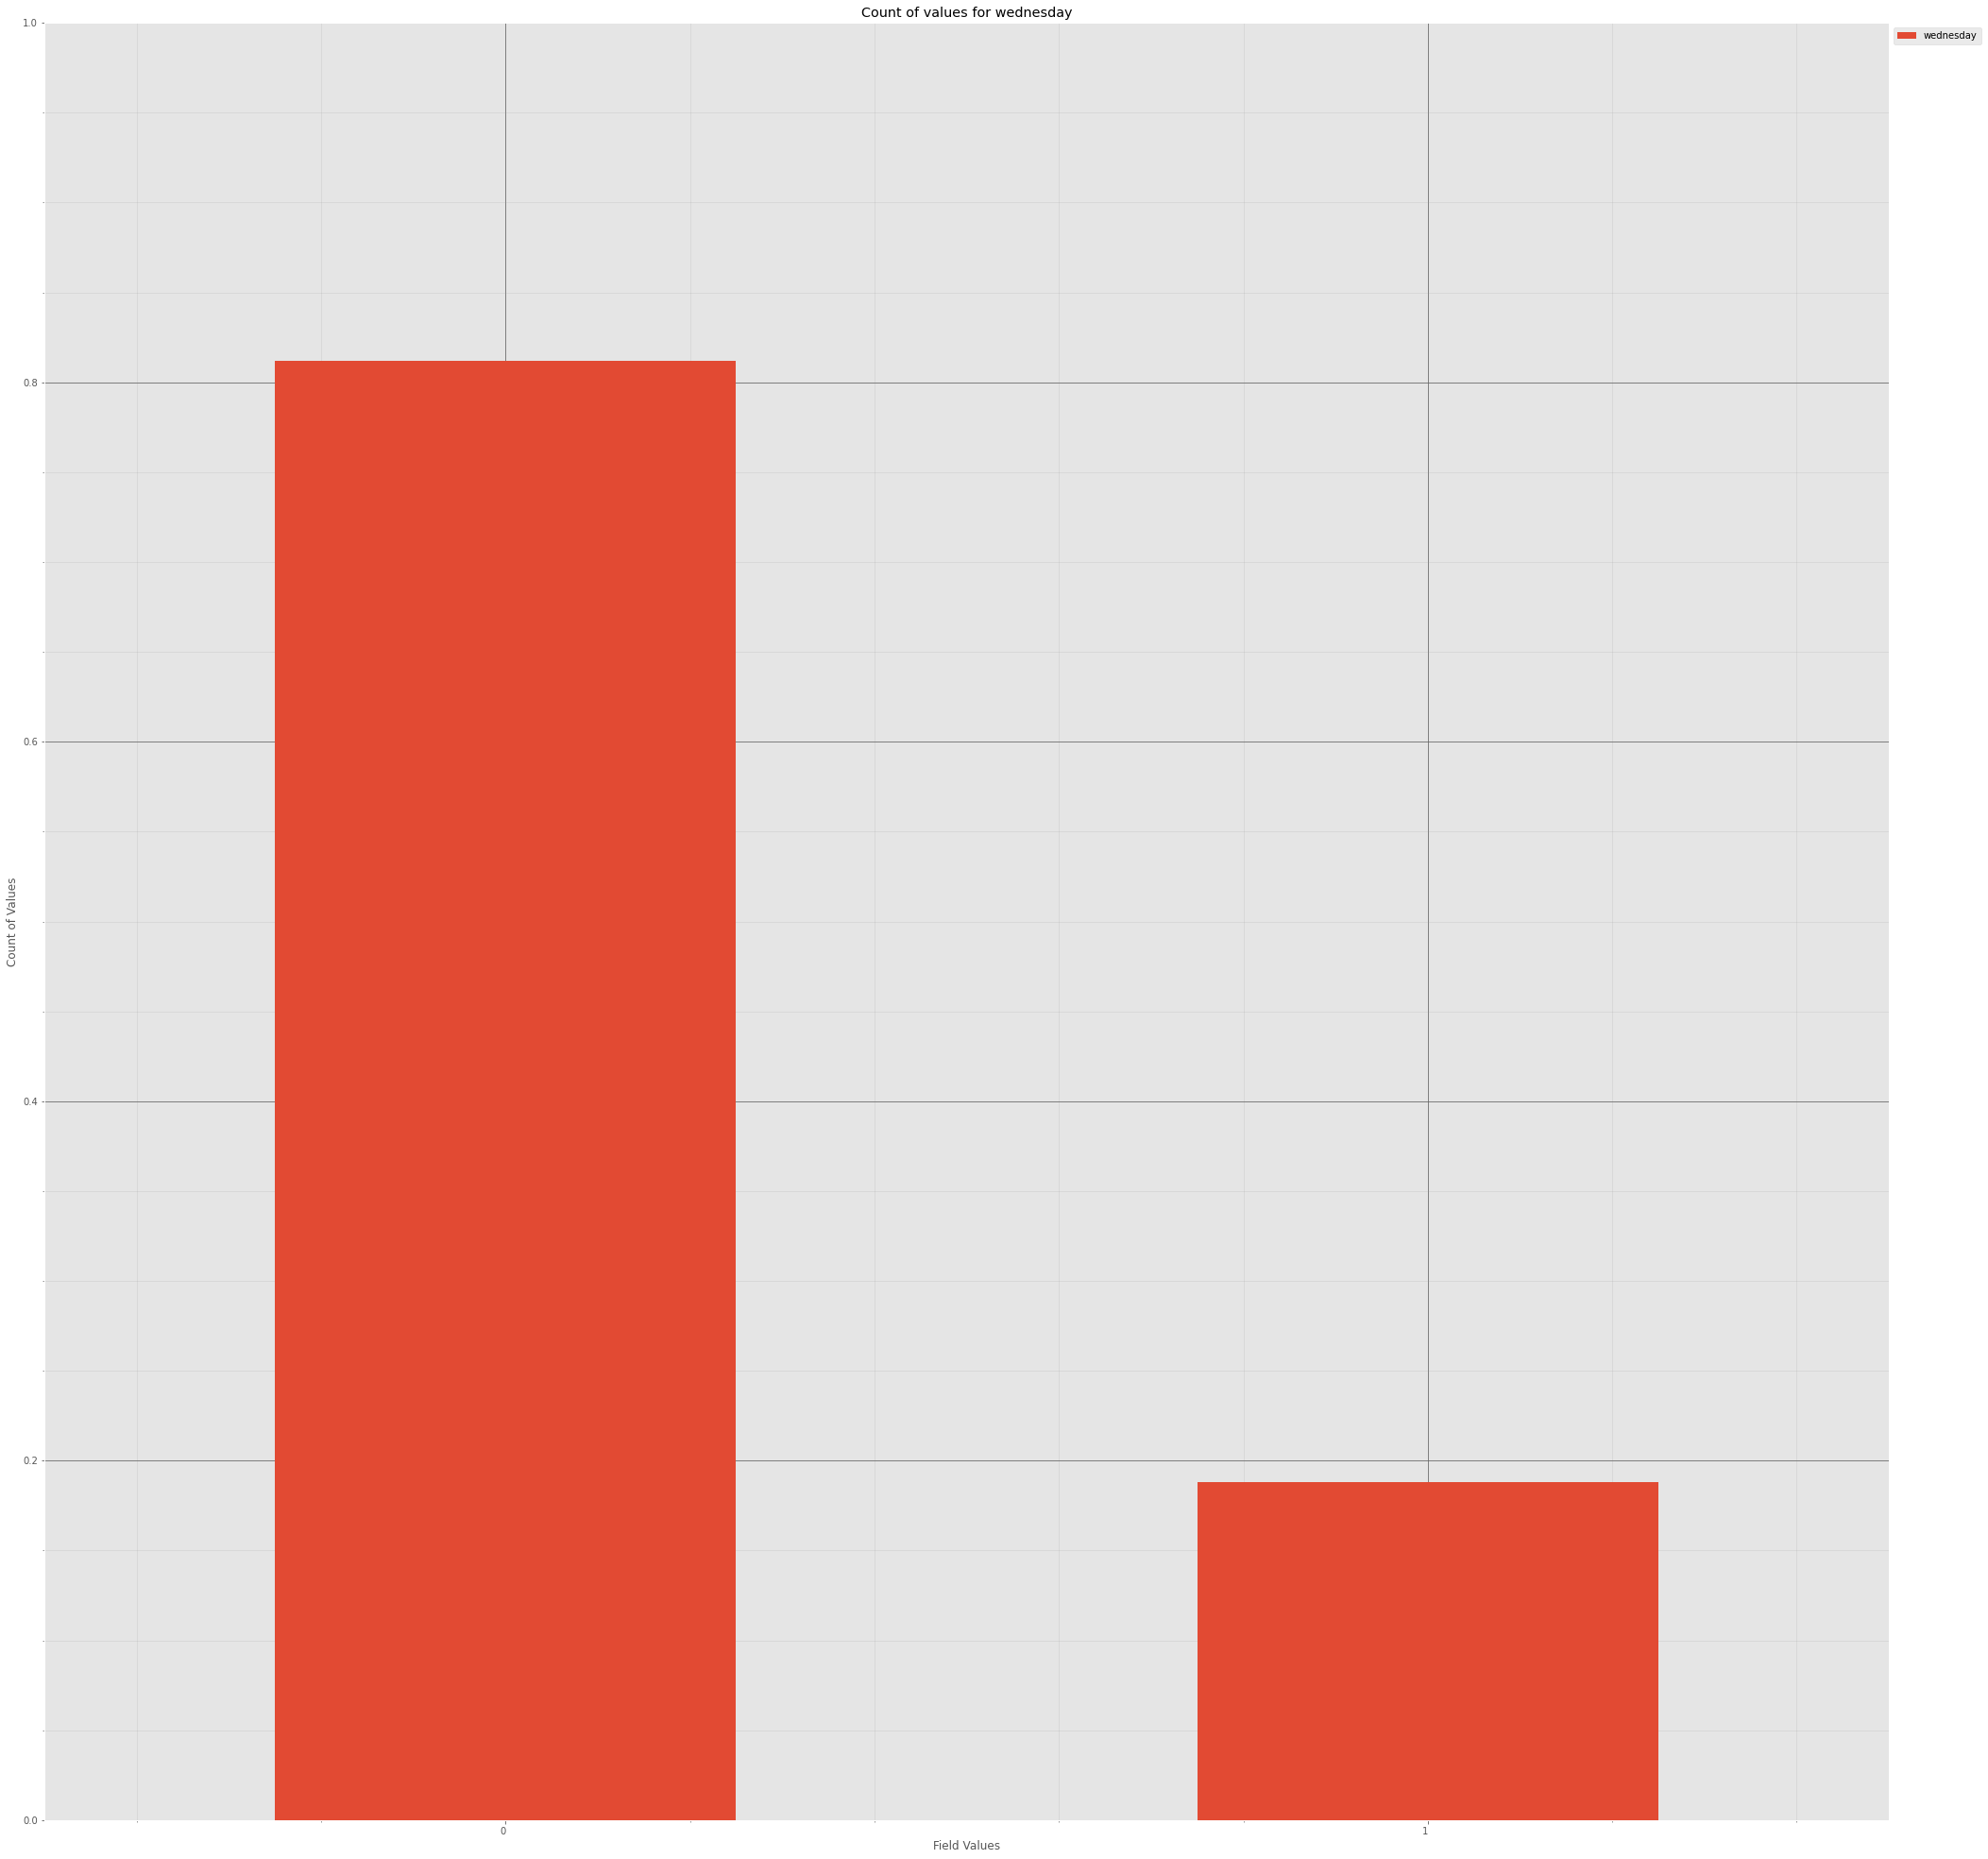



----------------------


          service_id
thursday            
0                 69
1                 16
Grouping over thursday results in:



,thursday,Rows,% Frequency
0,0,69,81.176471
1,1,16,18.823529


Non Zero Data:


,thursday,Rows,% Frequency
0,0,69,81.176471
1,1,16,18.823529


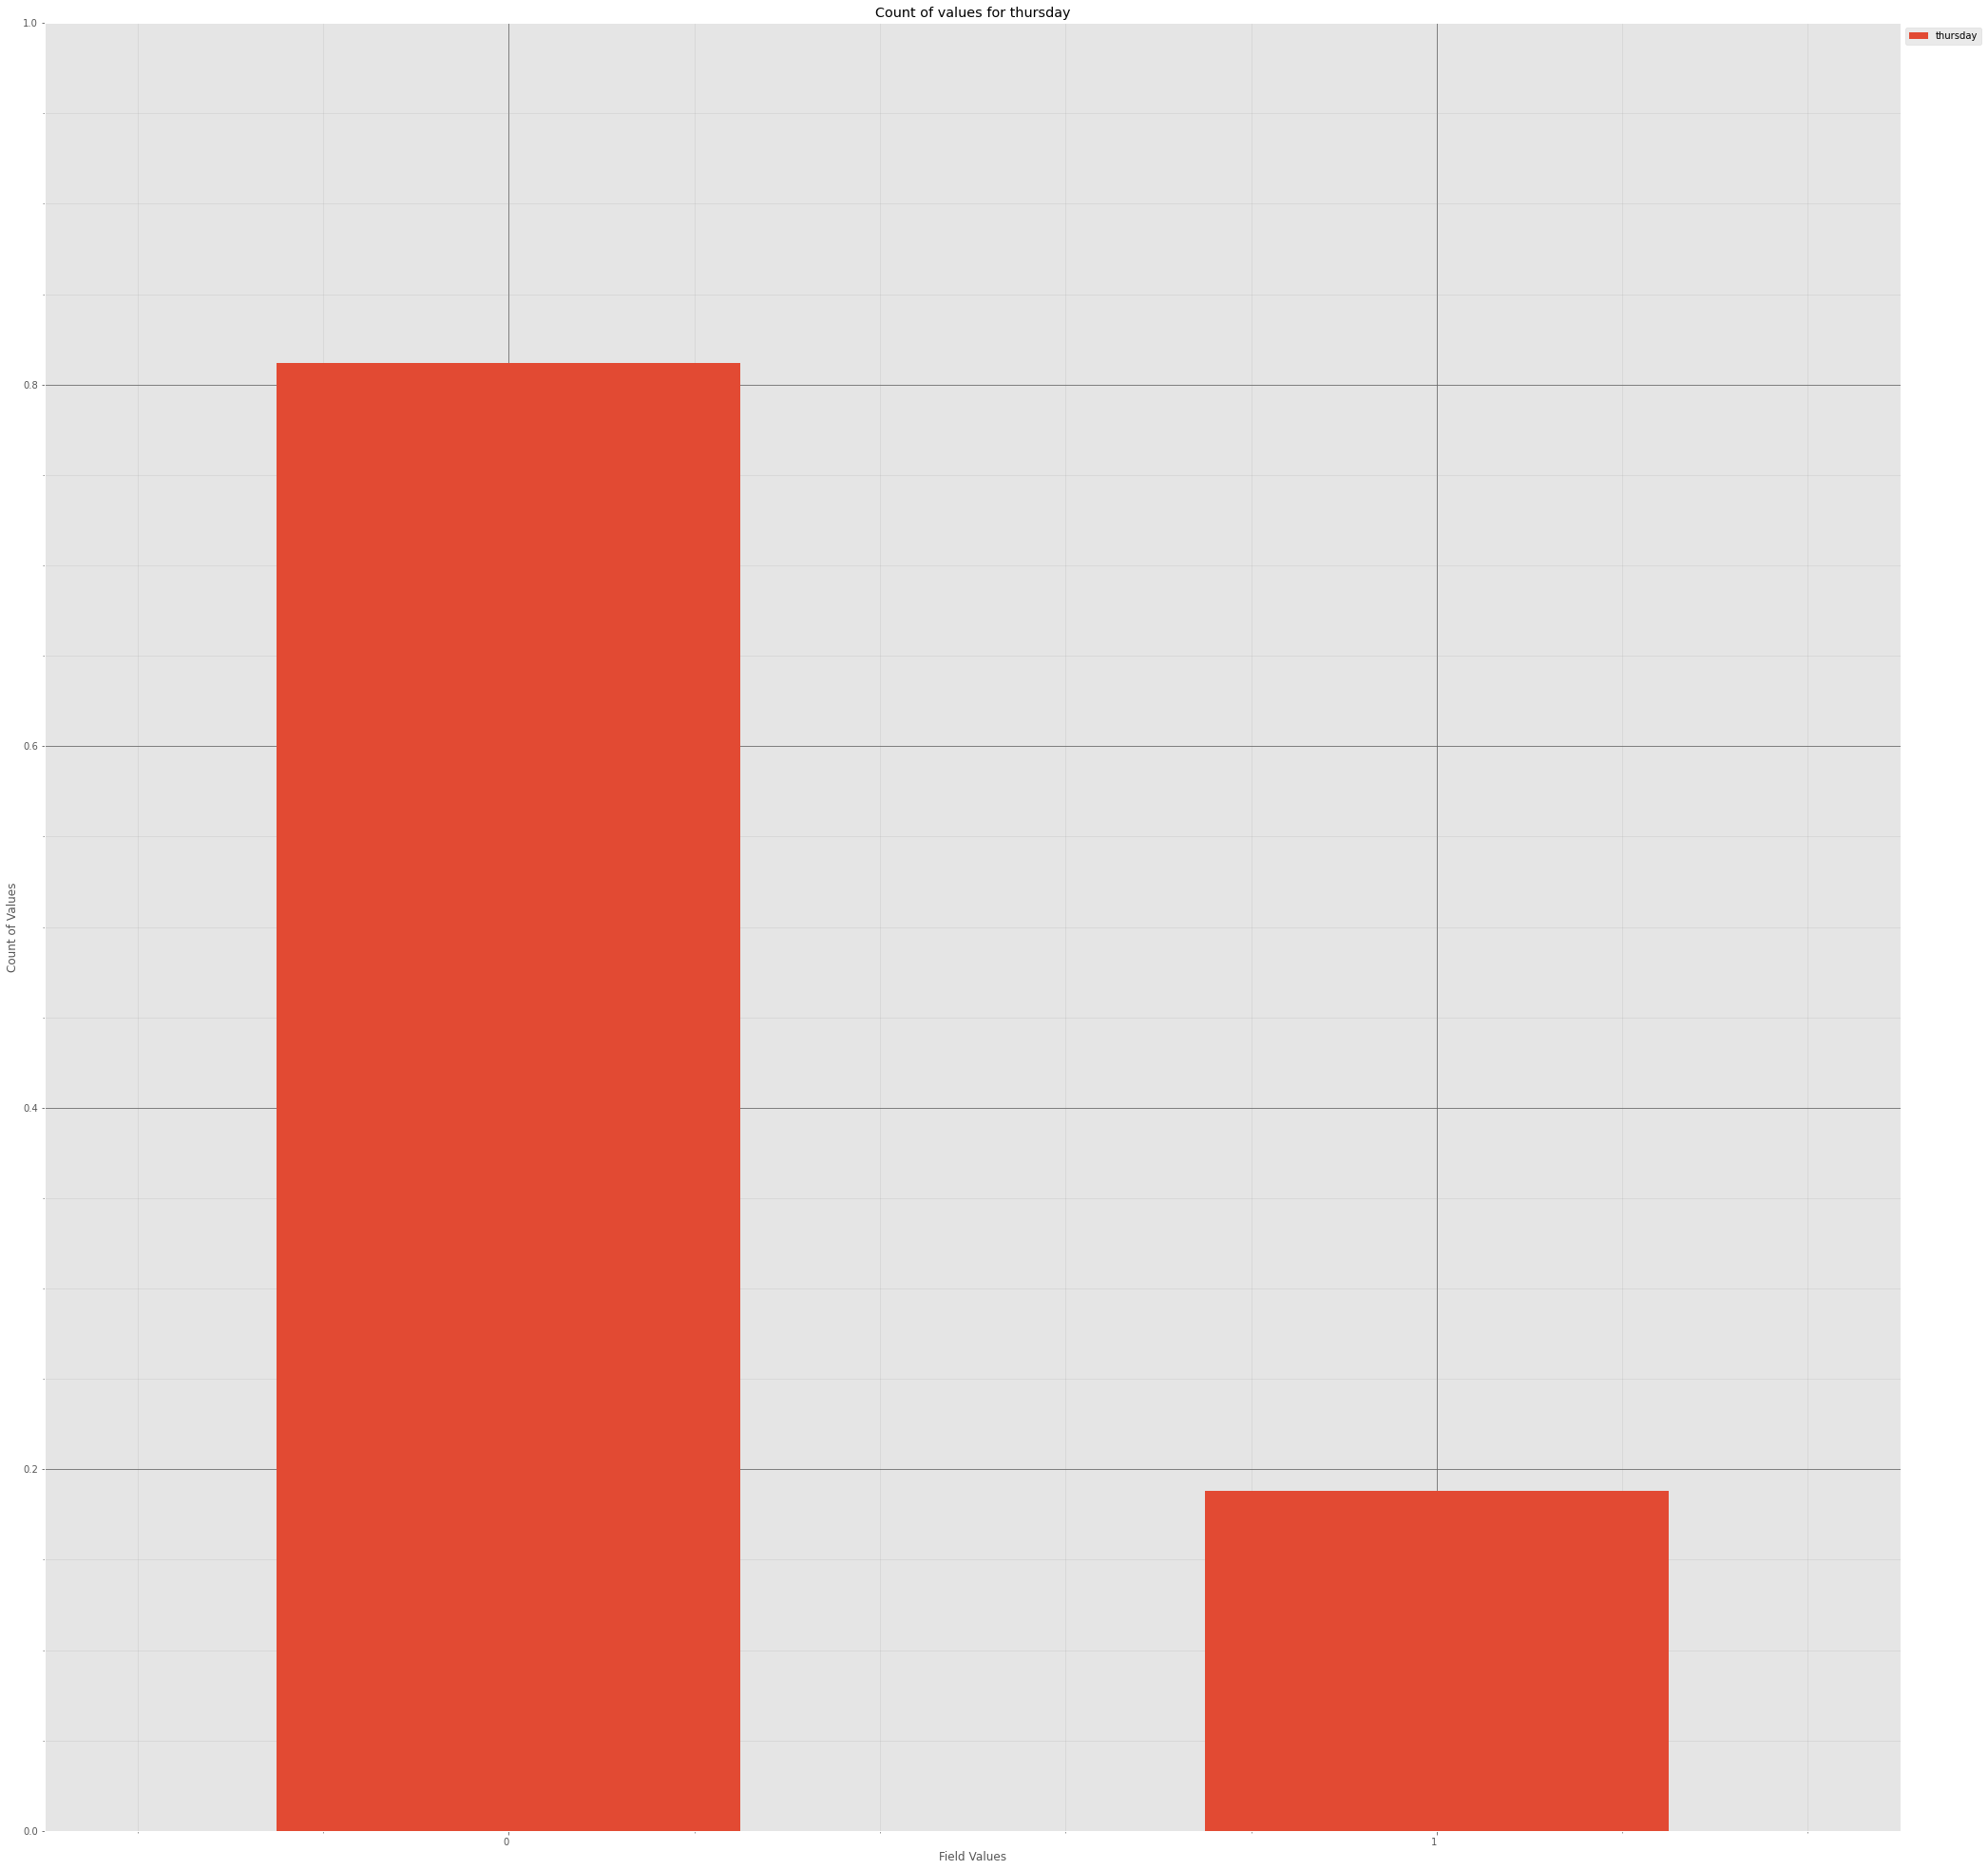



----------------------


        service_id
friday            
0               69
1               16
Grouping over friday results in:



,friday,Rows,% Frequency
0,0,69,81.176471
1,1,16,18.823529


Non Zero Data:


,friday,Rows,% Frequency
0,0,69,81.176471
1,1,16,18.823529


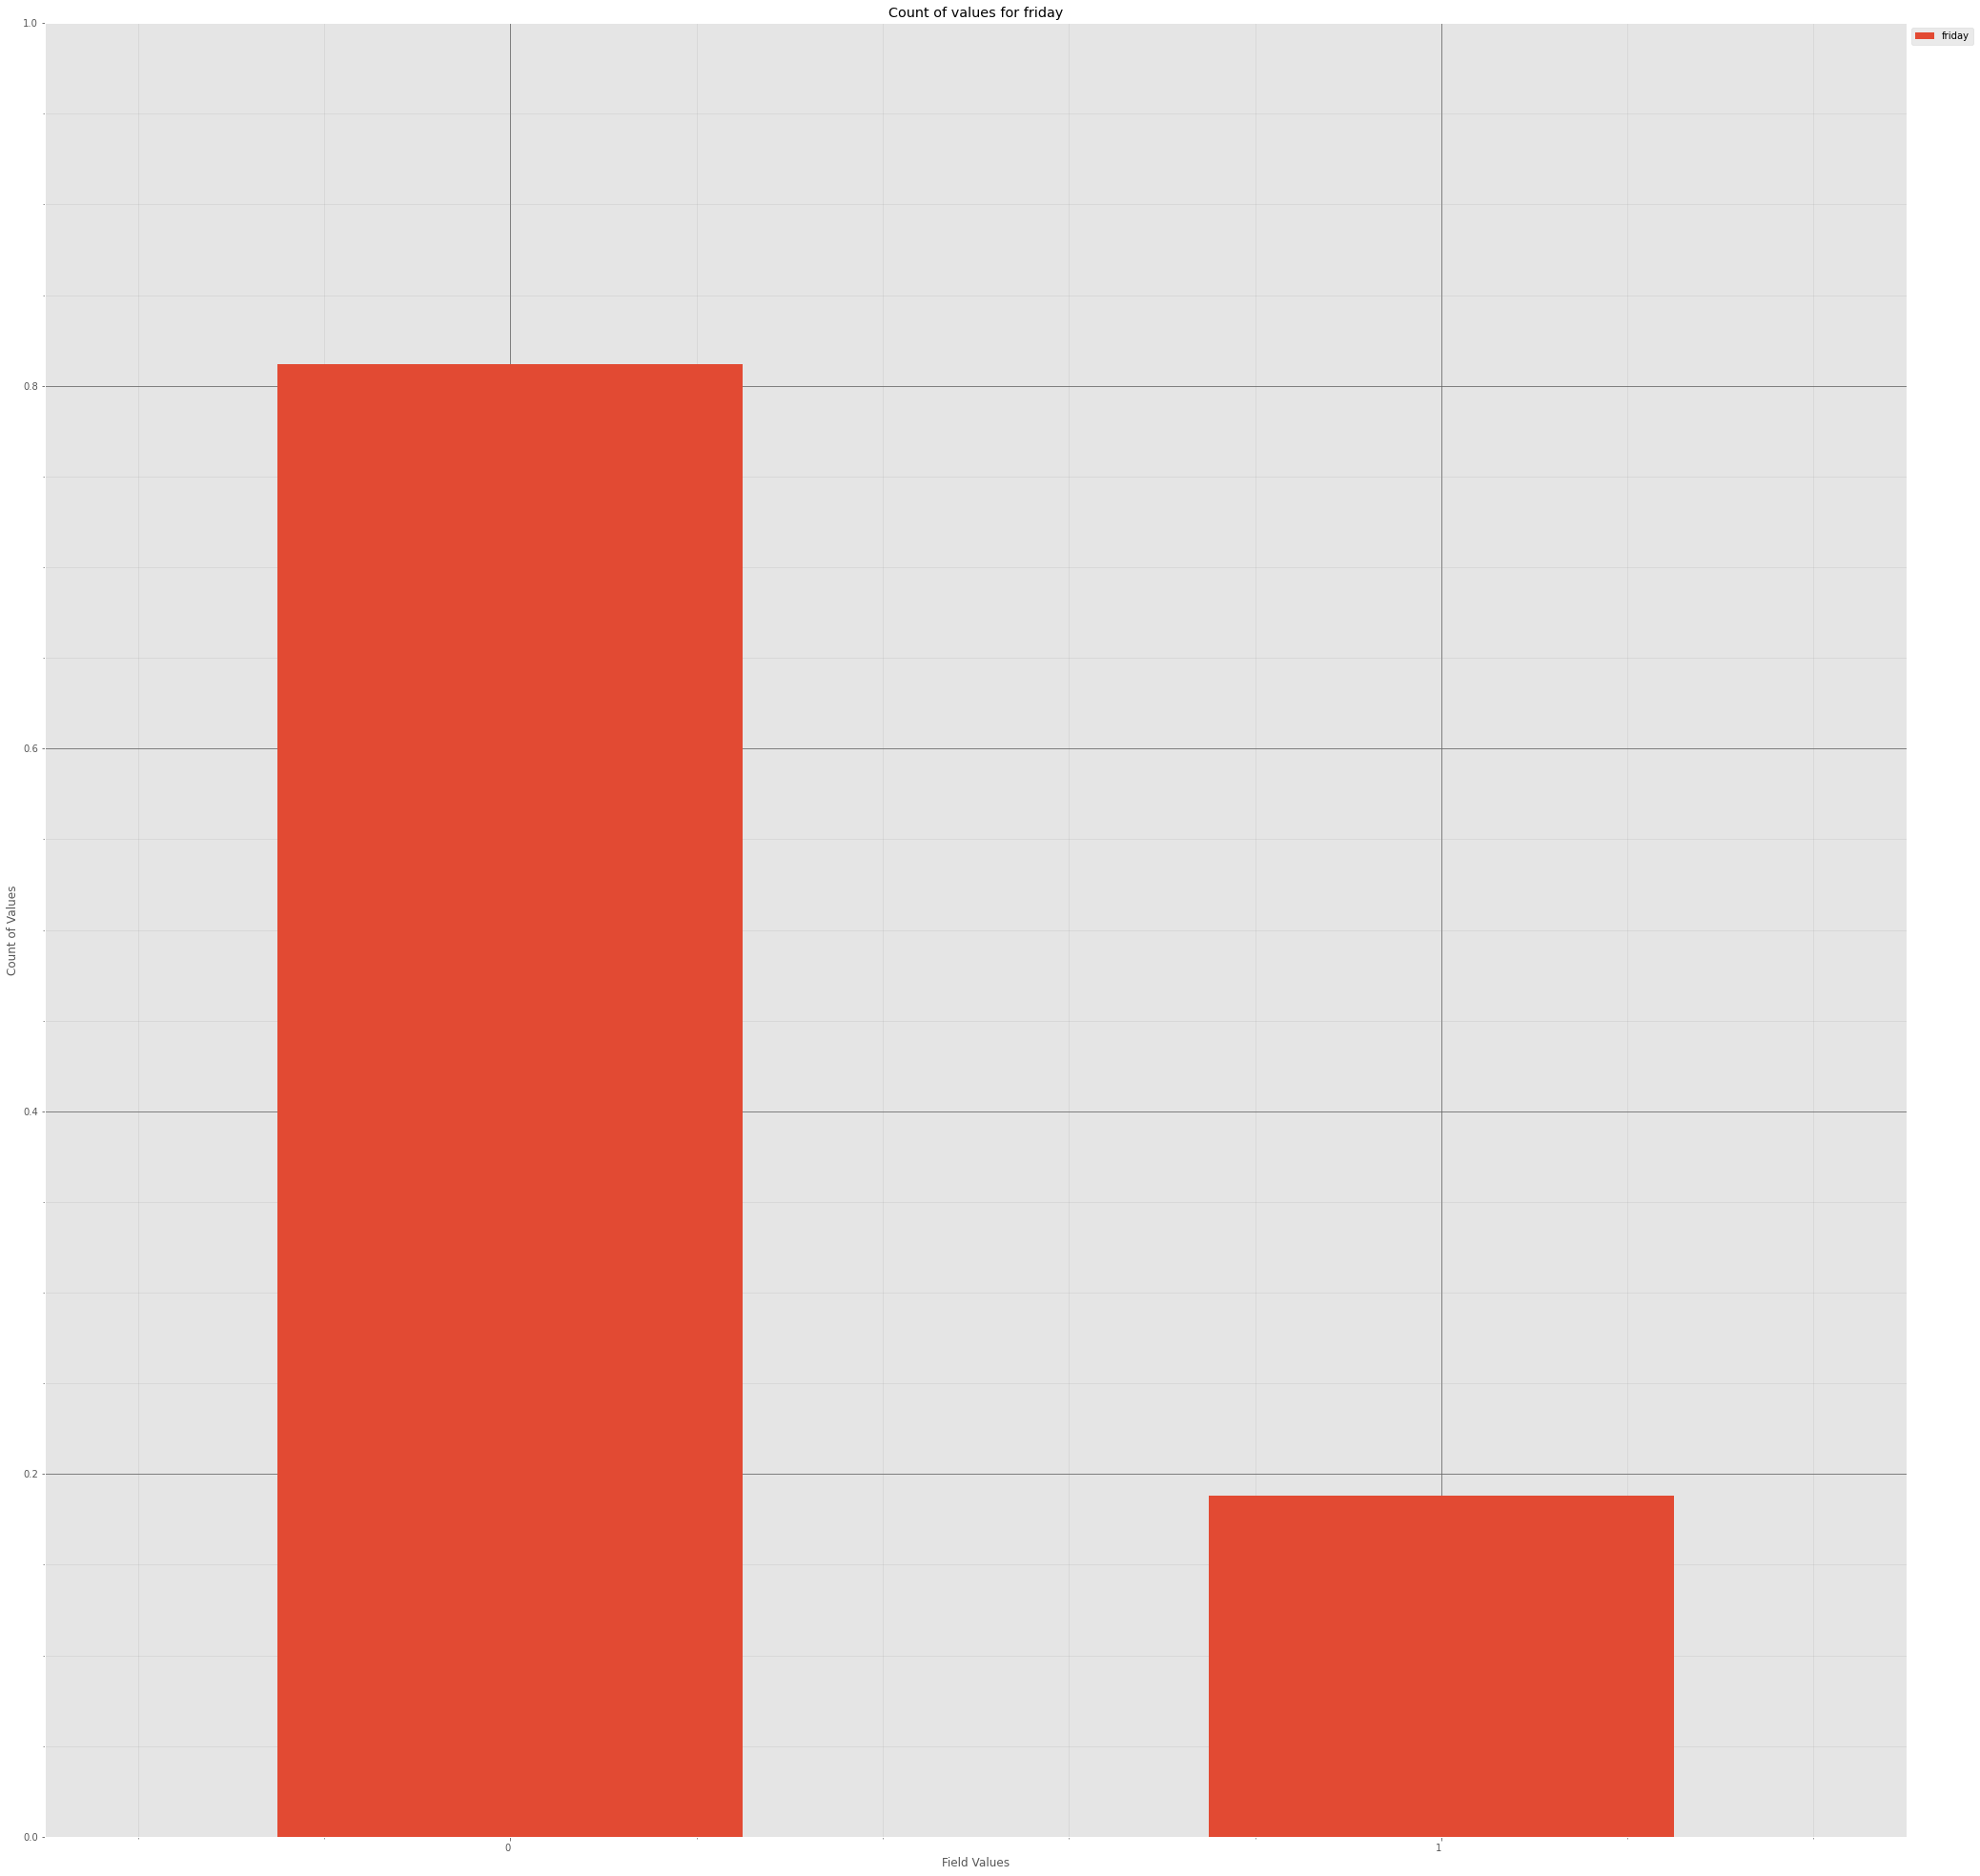



----------------------


          service_id
saturday            
0                 74
1                 11
Grouping over saturday results in:



,saturday,Rows,% Frequency
0,0,74,87.058824
1,1,11,12.941176


Non Zero Data:


,saturday,Rows,% Frequency
0,0,74,87.058824
1,1,11,12.941176


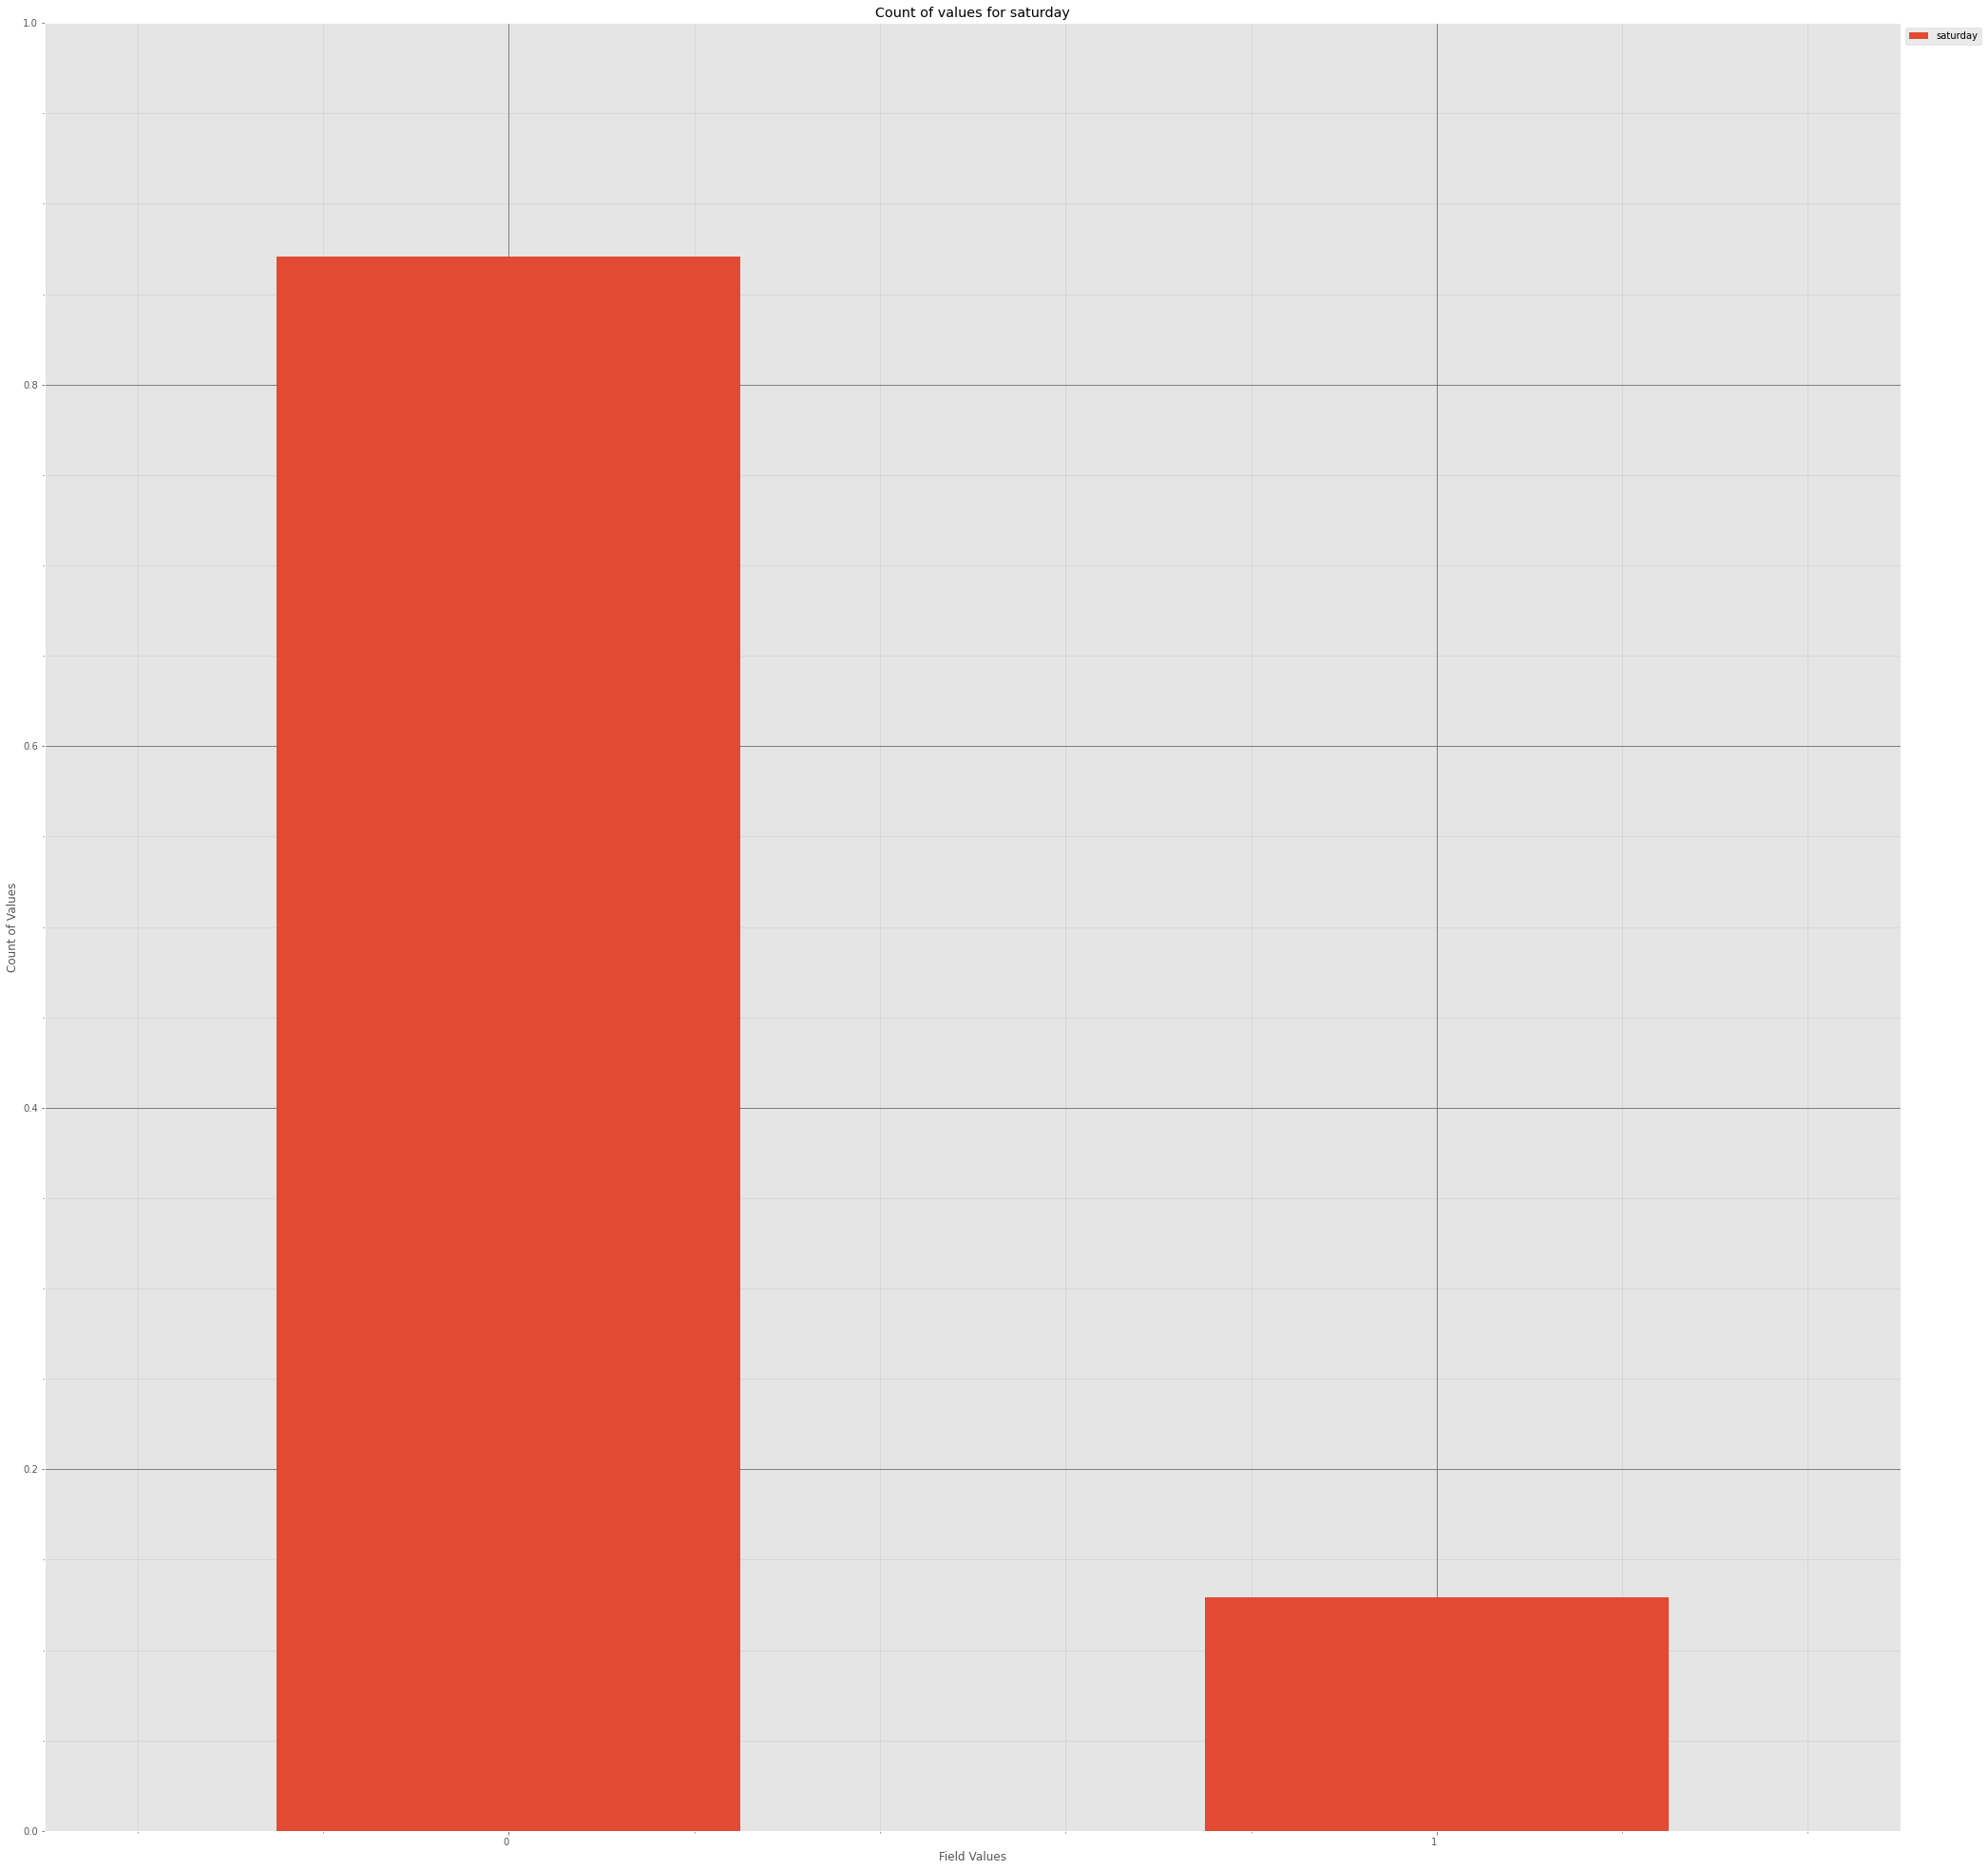



----------------------


        service_id
sunday            
0               75
1               10
Grouping over sunday results in:



,sunday,Rows,% Frequency
0,0,75,88.235294
1,1,10,11.764706


Non Zero Data:


,sunday,Rows,% Frequency
0,0,75,88.235294
1,1,10,11.764706


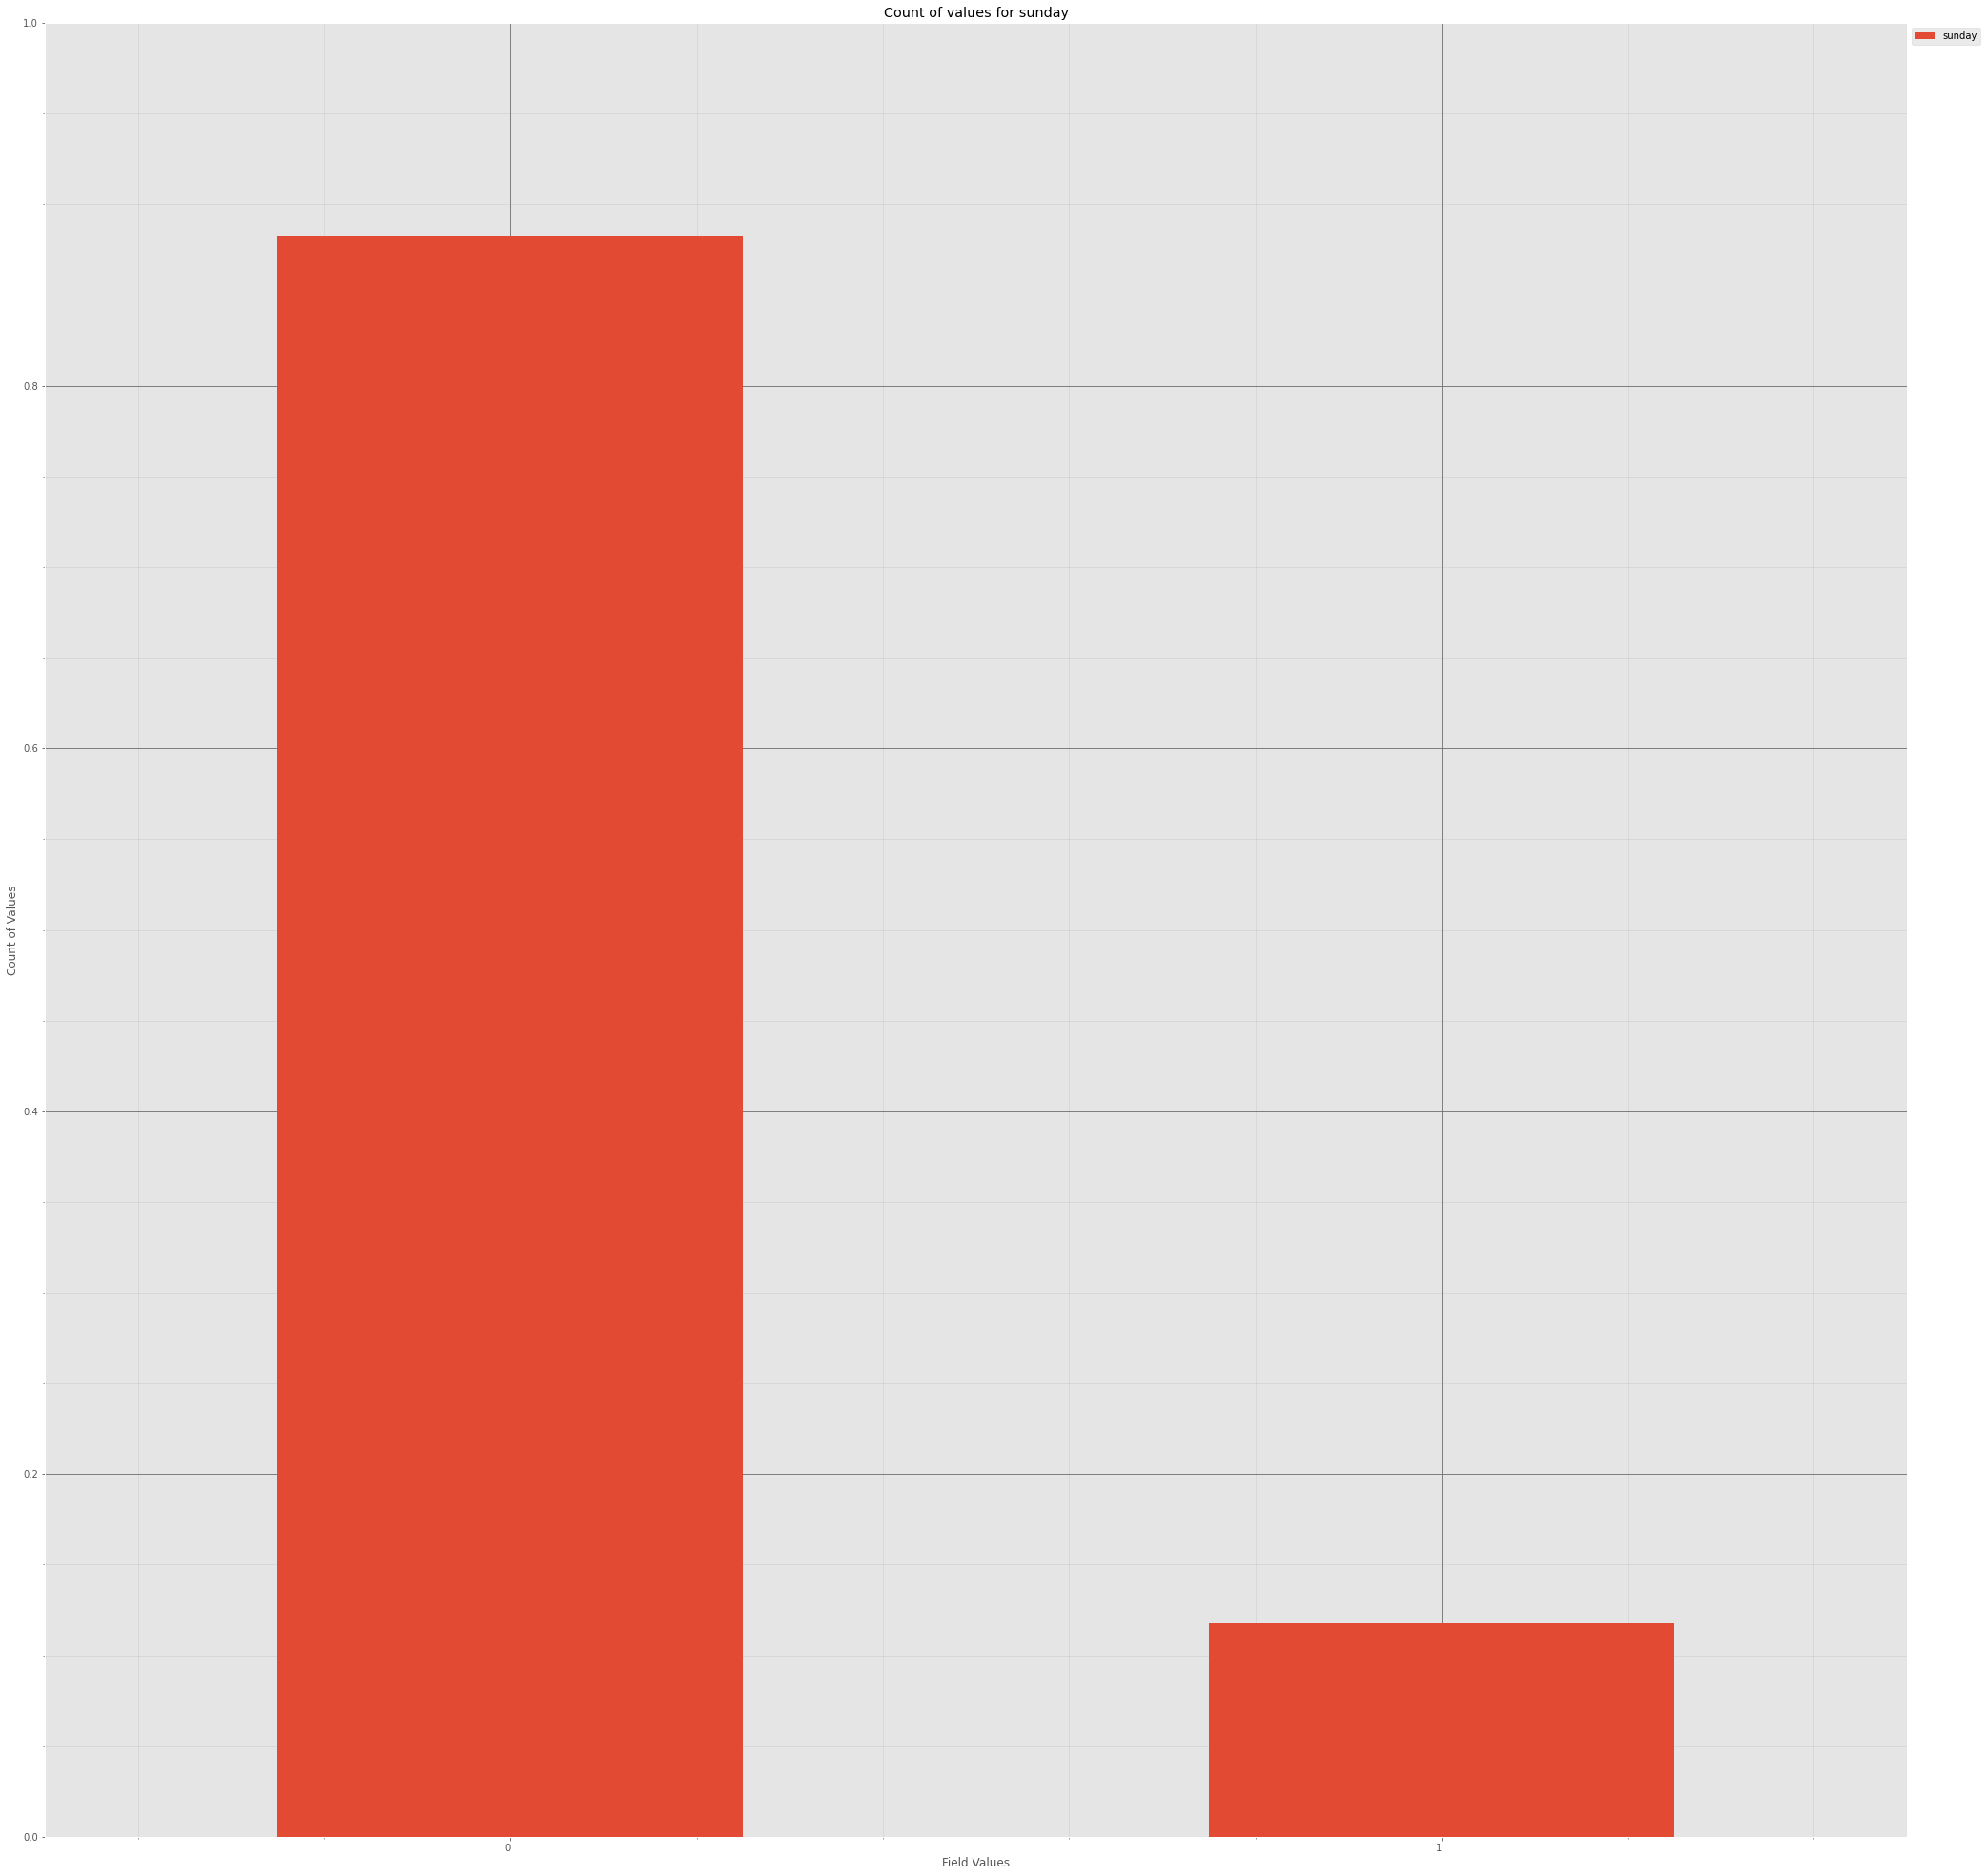

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()


----------------------


Grouping over service_id|monday results in:



Rows  % Frequency
service_id monday                   
1          0          1     1.176471
           1          0     0.000000
1#1        0          0     0.000000
           1          1     1.176471
1#2        0          1     1.176471
...                 ...          ...
y1013      1          0     0.000000
y1014      0          1     1.176471
           1          0     0.000000
y1015      0          0     0.000000
           1          1     1.176471

[170 rows x 2 columns]

Non Zero Data:


,,Rows,% Frequency
service_id,monday,,
1,0,1,1.176471
1#1,1,1,1.176471
1#2,0,1,1.176471
10,0,1,1.176471
10#1,0,1,1.176471
...,...,...,...
y1012,0,1,1.176471
y1012#1,0,1,1.176471
y1013,0,1,1.176471


Function exception:

cannot insert service_id, already exists
---------------------
---------------------
---------------------
BEGIN FILE: 3 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining calendar_dates.txt:


Inside ingest_data(./data/Google_Transit_Static/calendar_dates.txt,dictionary)
On Chunk: 1


,service_id,date,exception_type
0,1,20210801,2
1,1,20210808,2
2,1,20210815,2
3,1,20210822,2
4,1,20210829,2
...,...,...,...
845,y1015,20211115,2
846,y1015,20211122,2
847,y1015,20211129,2
848,y1015,20211206,2


Your file contains: 
850 rows x 3 columns.


The following columns are present:
"service_id"
"date"
"exception_type"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,service_id,850,62,y100m,45,100%,0%,5%,None
1,date,850,180,20211011,11,100%,0%,1%,None
2,exception_type,850,1,2,850,100%,0%,100%,None





Sample Data:





,service_id,date,exception_type
0,1,20210801,2
1,1,20210808,2
2,1,20210815,2
3,1,20210822,2
4,1,20210829,2


Inside data_convert()
Converting to datetime
Inside data_convert()
Converting to category
Inside data_convert()
No need to convert
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


            service_id
service_id            
1                   20
1#1                 21
10                  10
10#1                11
10341               16
...                ...
y1012               21
y1012#1              1
y1013               22
y1014               22
y1015               22

[62 rows x 1 columns]
Grouping over service_id results in:



,service_id,Rows,% Frequency
0,1,20,2.352941
1,1#1,21,2.470588
2,10,10,1.176471
3,10#1,11,1.294118
4,10341,16,1.882353
...,...,...,...
57,y1012,21,2.470588
58,y1012#1,1,0.117647
59,y1013,22,2.588235
60,y1014,22,2.588235


Non Zero Data:


,service_id,Rows,% Frequency
0,1,20,2.352941
1,1#1,21,2.470588
2,10,10,1.176471
3,10#1,11,1.294118
4,10341,16,1.882353
...,...,...,...
57,y1012,21,2.470588
58,y1012#1,1,0.117647
59,y1013,22,2.588235
60,y1014,22,2.588235


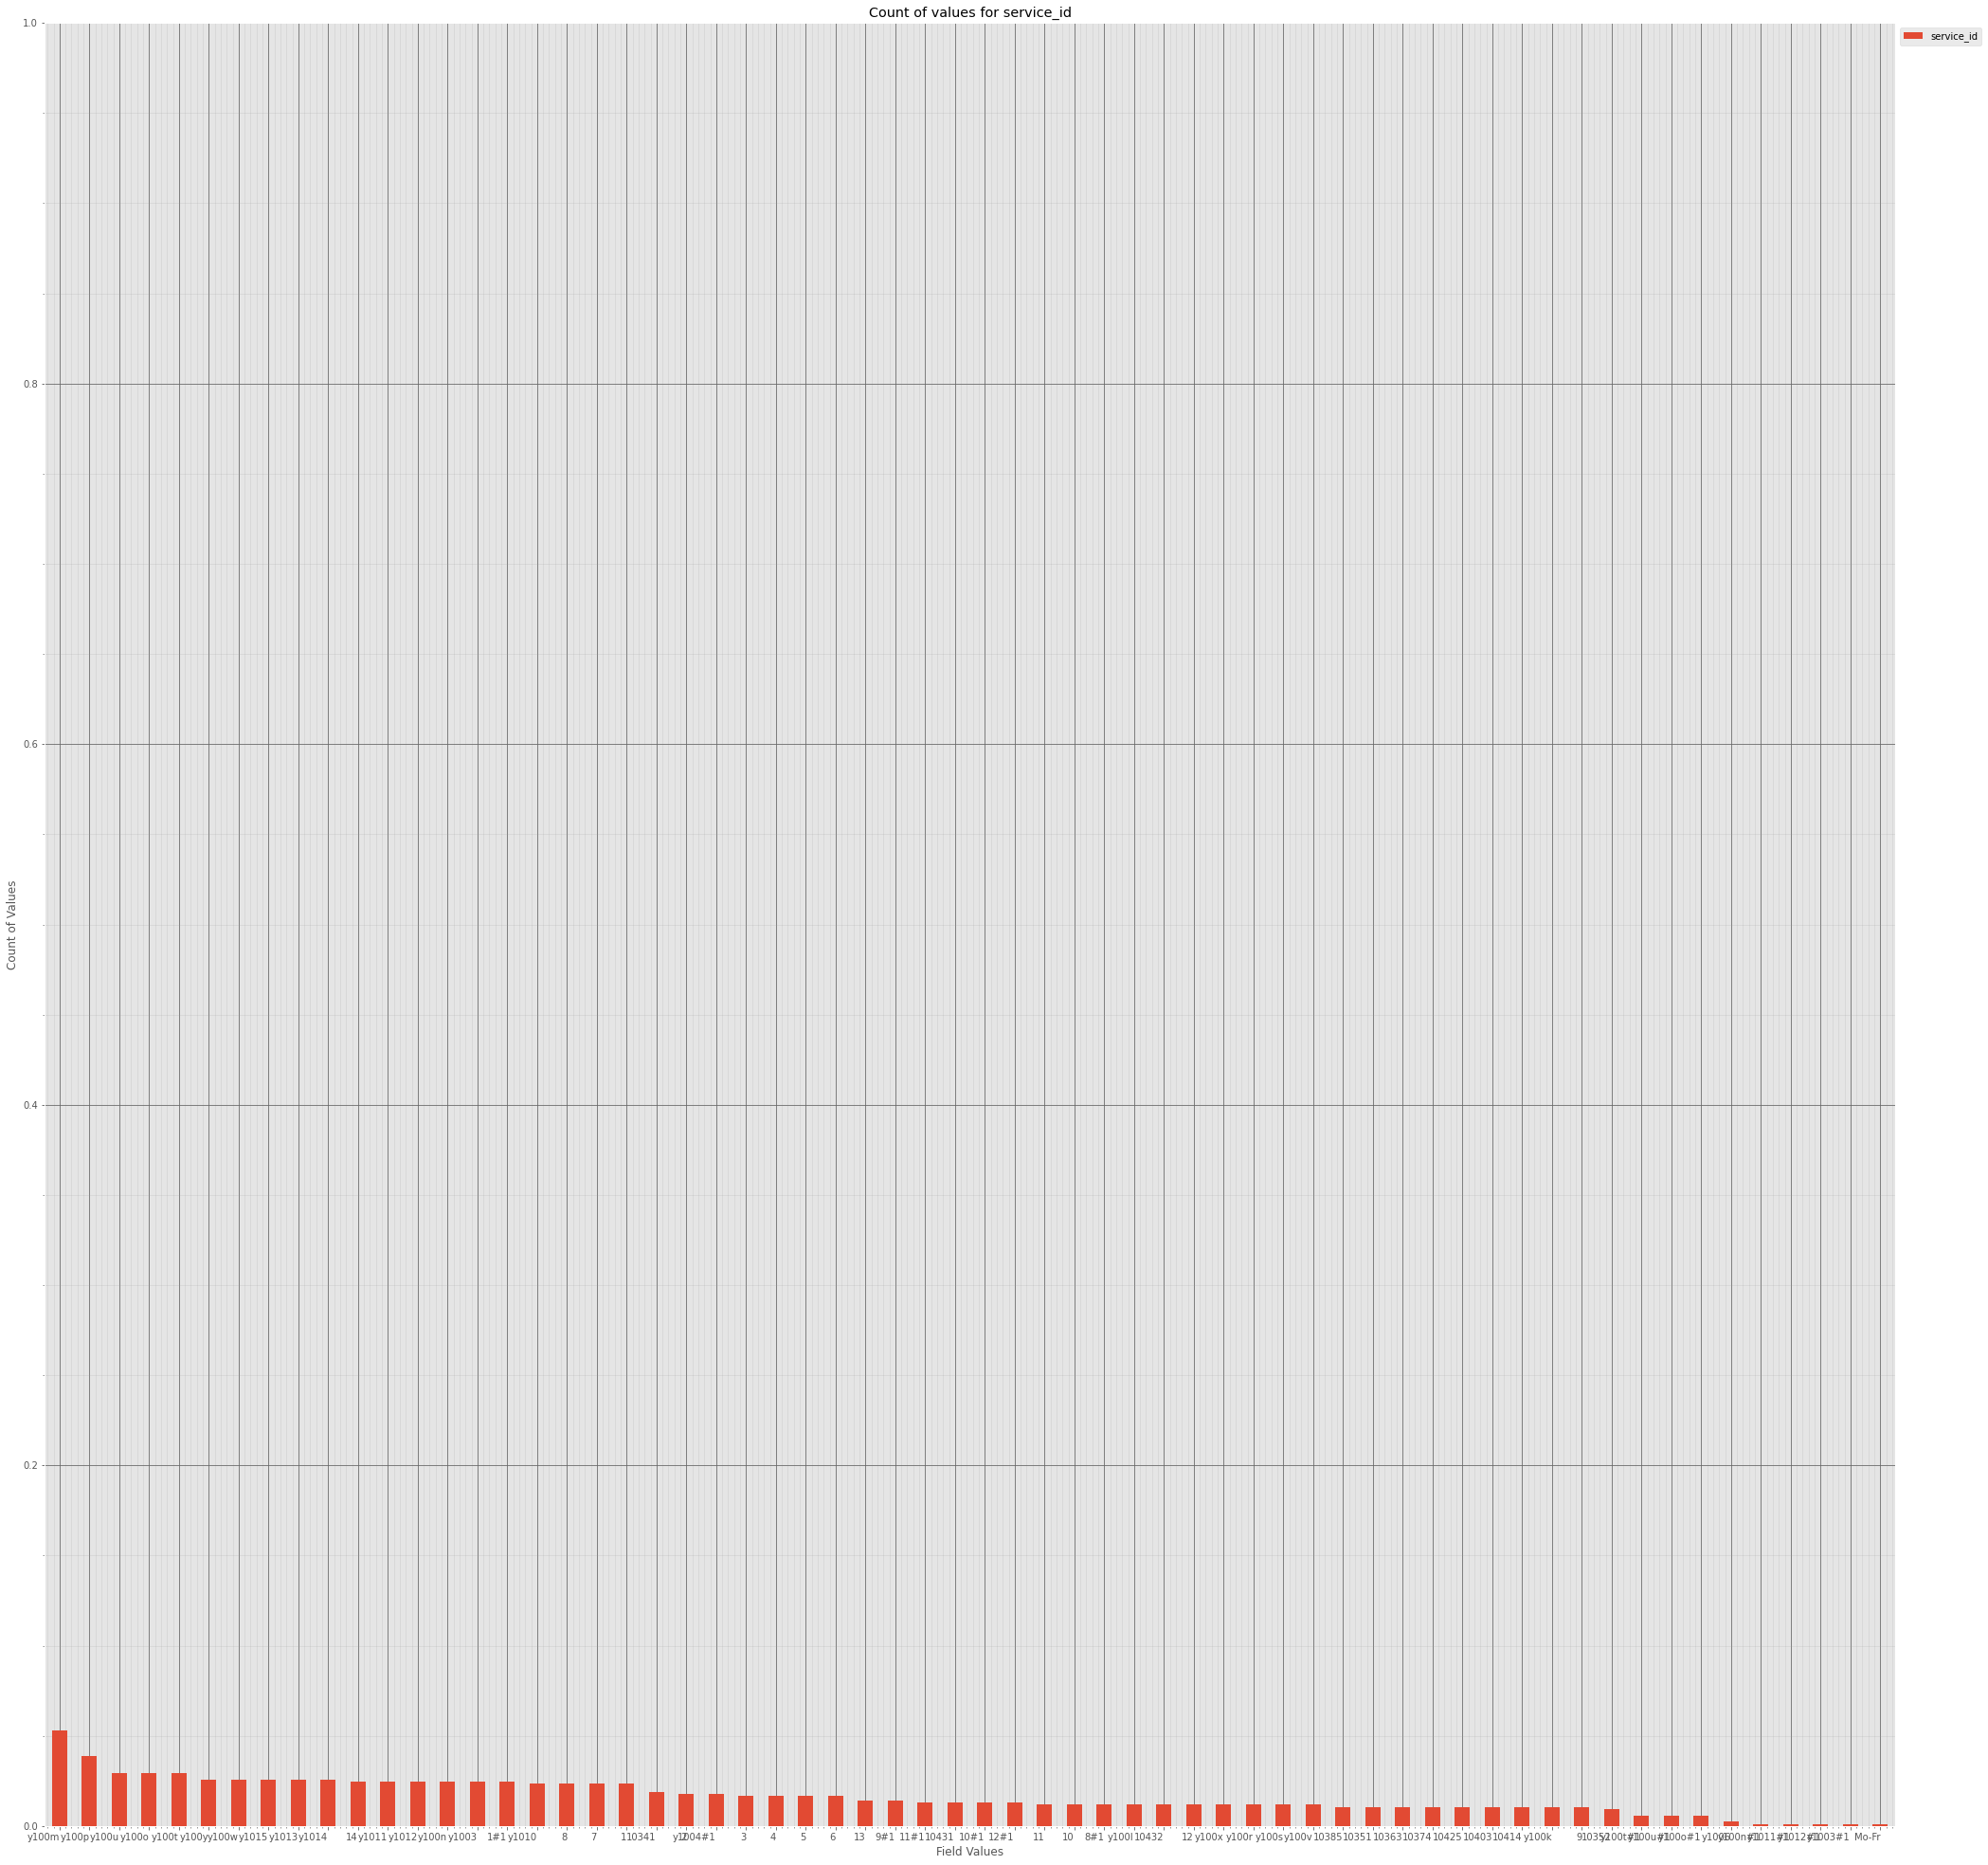



----------------------


                service_id
exception_type            
2                      850
Grouping over exception_type results in:



,exception_type,Rows,% Frequency
0,2,850,100.0


Non Zero Data:


,exception_type,Rows,% Frequency
0,2,850,100.0


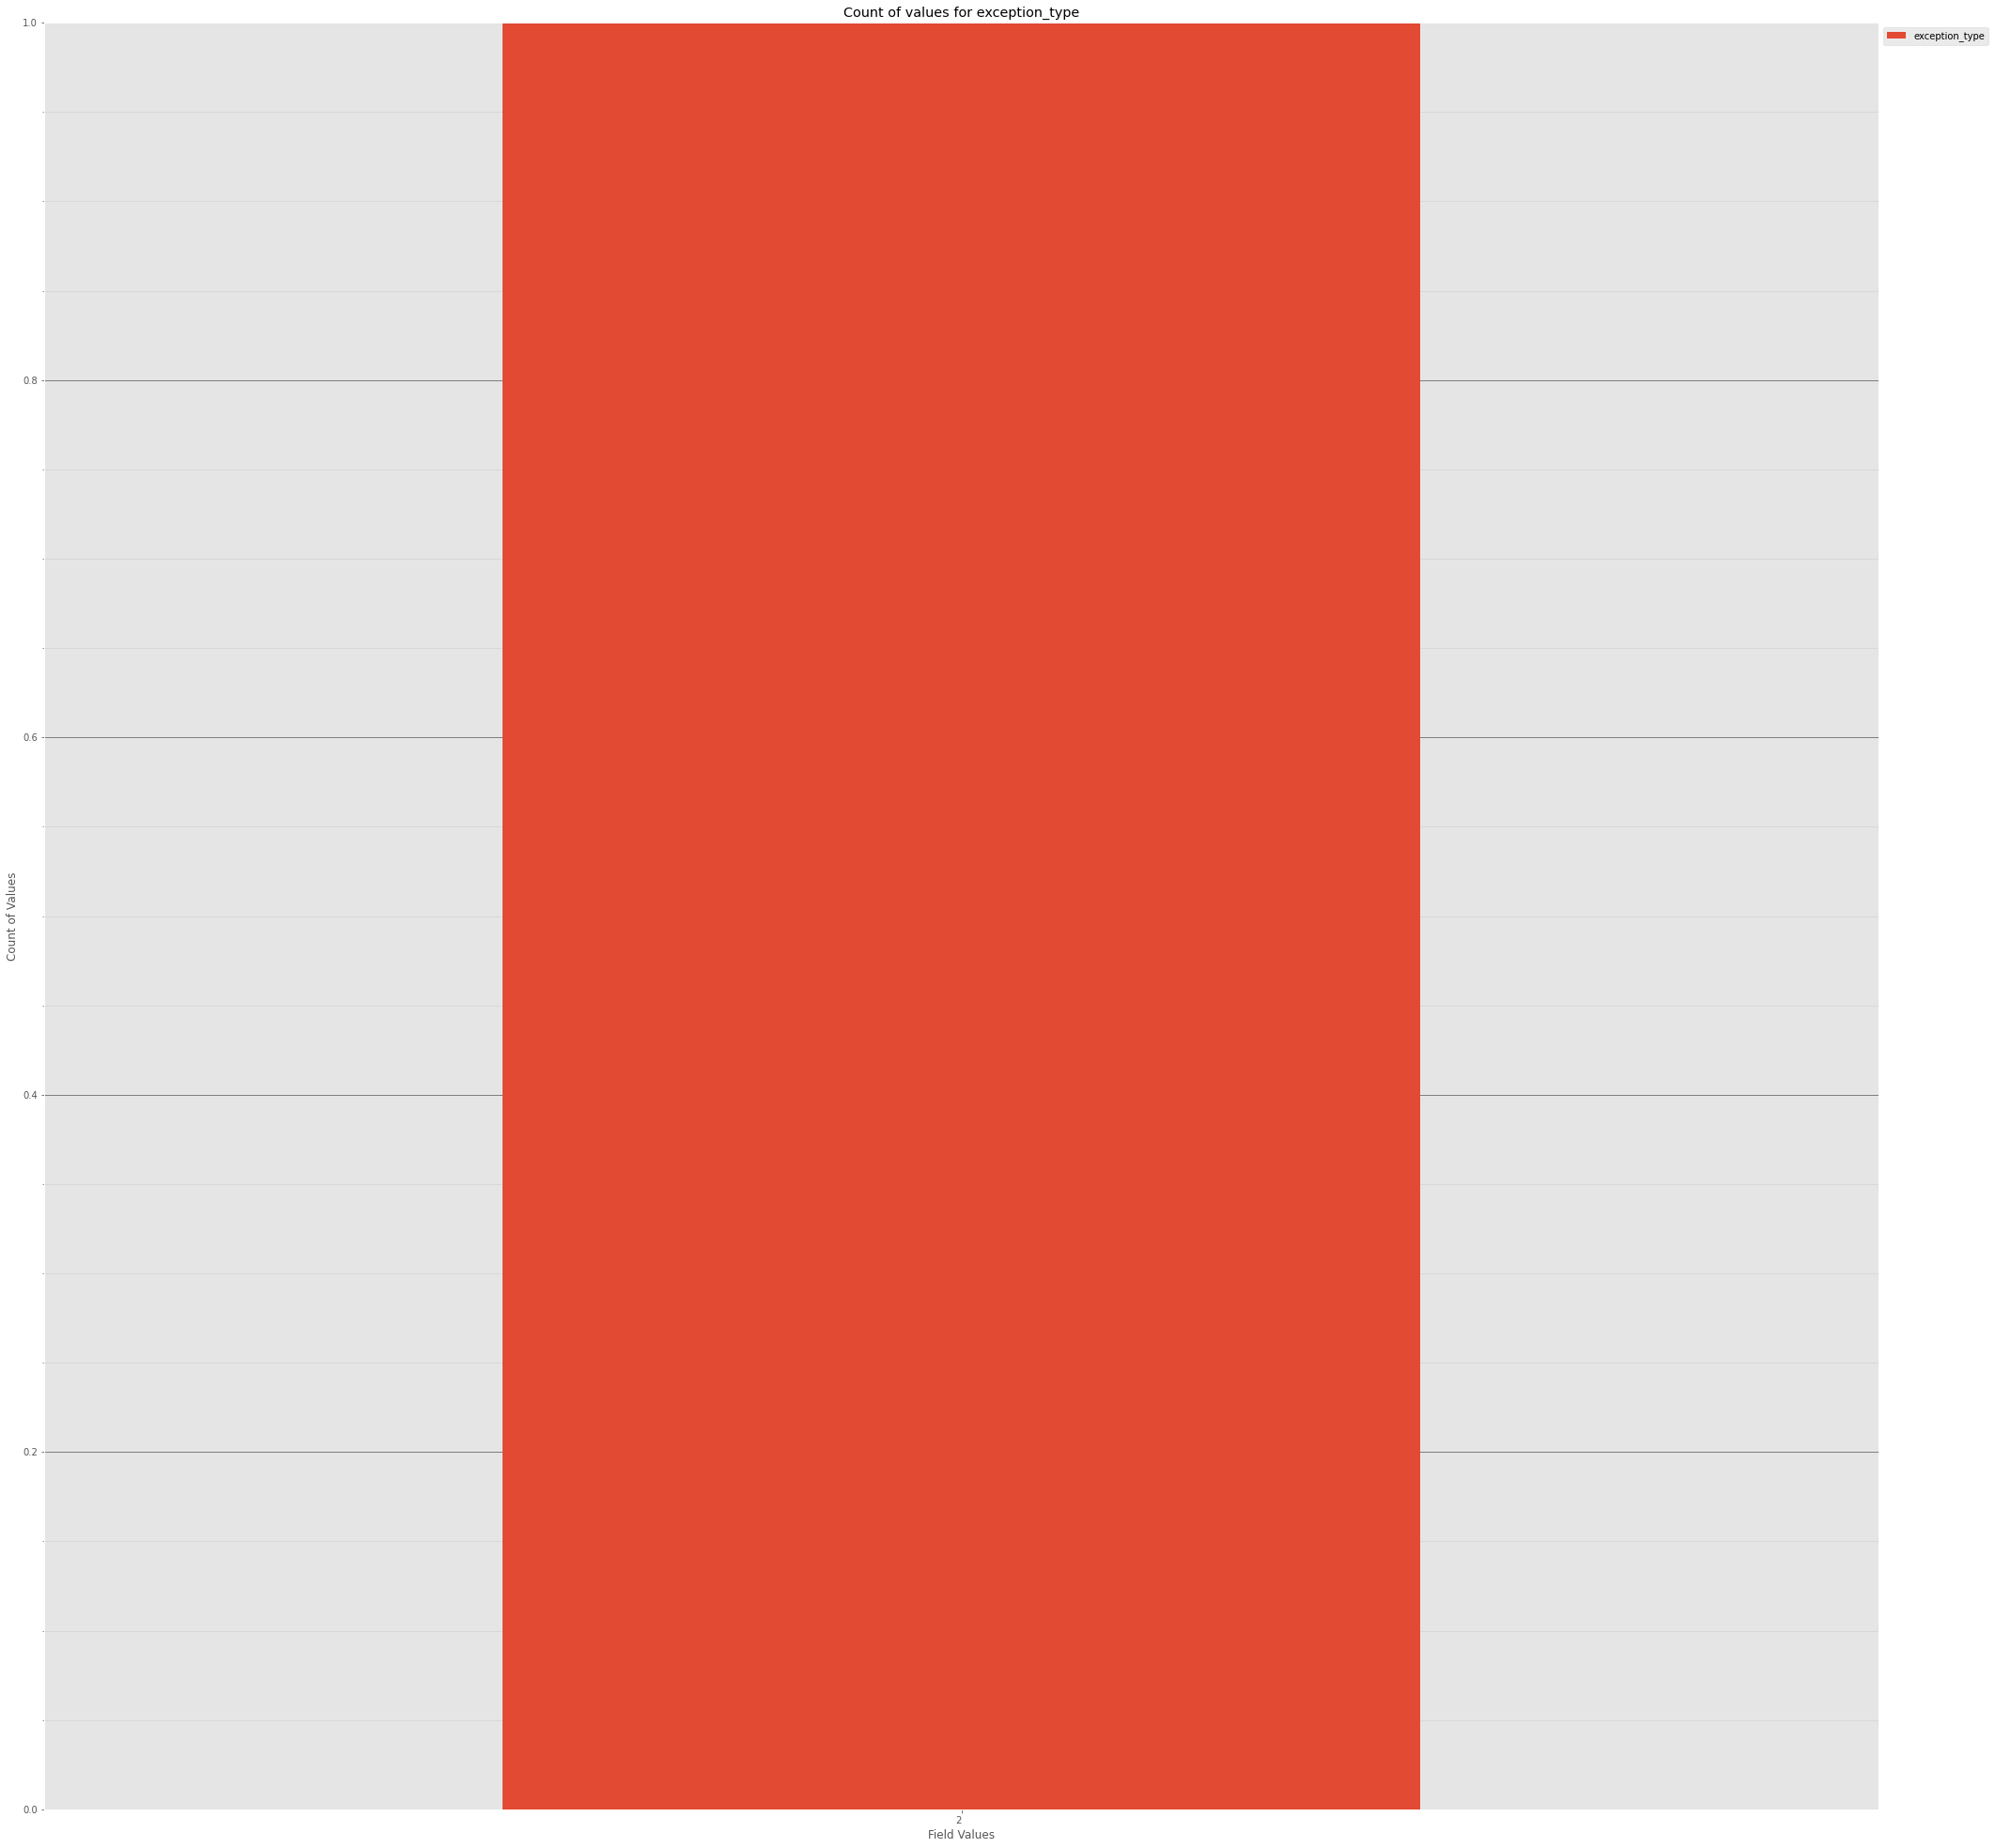

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,service_id,date,exception_type


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()


----------------------


Grouping over service_id|exception_type results in:



,,Rows,% Frequency
service_id,exception_type,,
1,2,20,2.352941
1#1,2,21,2.470588
10,2,10,1.176471
10#1,2,11,1.294118
10341,2,16,1.882353
...,...,...,...
y1012,2,21,2.470588
y1012#1,2,1,0.117647
y1013,2,22,2.588235


Non Zero Data:


,,Rows,% Frequency
service_id,exception_type,,
1,2,20,2.352941
1#1,2,21,2.470588
10,2,10,1.176471
10#1,2,11,1.294118
10341,2,16,1.882353
...,...,...,...
y1012,2,21,2.470588
y1012#1,2,1,0.117647
y1013,2,22,2.588235


Function exception:

cannot insert service_id, already exists
---------------------
---------------------
---------------------
BEGIN FILE: 4 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining routes.txt:


Inside ingest_data(./data/Google_Transit_Static/routes.txt,dictionary)
On Chunk: 1


,route_id,agency_id,route_short_name,route_long_name,route_type
0,10-100-e20-1,01,100,Drogheda Bus Station -,3
1,10-101-e20-1,01,101,Busáras - Drogheda Bus Station,3
2,10-103-e20-1,01,103,Dublin (Beresford Place) - Tayto Park,3
3,10-104-e20-1,01,104,Bus Stop at Train Station - Hastings Green Rou...,3
4,10-105-e20-1,01,105,Hospital Car Park - Drogheda Bus Station,3
...,...,...,...,...,...
543,60-9-d12-1,978,9,Charlestown Shopping Centre - Greenhills College,3
544,60-H1-b12-1,978,H1,National Lottery Head Quarters - Old Race Course,3
545,60-H2-b12-1,978,H2,National Lottery Head Quarters - Malahide Gard...,3
546,60-H3-b12-1,978,H3,National Lottery Head Quarters - Howth Summit,3


Your file contains: 
548 rows x 5 columns.


The following columns are present:
"route_id"
"agency_id"
"route_short_name"
"route_long_name"
"route_type"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,route_id,548,548,10-72-e20-1,1,100%,0%,0%,None
1,agency_id,548,5,01,228,100%,0%,42%,None
2,route_short_name,548,389,70,3,100%,0%,1%,None
3,route_long_name,548,378,Burlington Road (Mespil Road) - Damastown Drive,8,100%,0%,1%,None
4,route_type,548,1,3,548,100%,0%,100%,None





Sample Data:





,route_id,agency_id,route_short_name,route_long_name,route_type
0,10-100-e20-1,01,100,Drogheda Bus Station -,3
1,10-101-e20-1,01,101,Busáras - Drogheda Bus Station,3
2,10-103-e20-1,01,103,Dublin (Beresford Place) - Tayto Park,3
3,10-104-e20-1,01,104,Bus Stop at Train Station - Hastings Green Rou...,3
4,10-105-e20-1,01,105,Hospital Car Park - Drogheda Bus Station,3


Inside data_convert()
No need to convert to: datetime
Inside data_convert()
Converting to category
Inside data_convert()
No need to convert
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


              route_id
route_id              
10-100-e20-1         1
10-101-e20-1         1
10-103-e20-1         1
10-104-e20-1         1
10-105-e20-1         1
...                ...
60-9-d12-1           1
60-H1-b12-1          1
60-H2-b12-1          1
60-H3-b12-1          1
60-H9-b12-1          1

[548 rows x 1 columns]
Grouping over route_id results in:



,route_id,Rows,% Frequency
0,10-100-e20-1,1,0.182482
1,10-101-e20-1,1,0.182482
2,10-103-e20-1,1,0.182482
3,10-104-e20-1,1,0.182482
4,10-105-e20-1,1,0.182482
...,...,...,...
543,60-9-d12-1,1,0.182482
544,60-H1-b12-1,1,0.182482
545,60-H2-b12-1,1,0.182482
546,60-H3-b12-1,1,0.182482


Non Zero Data:


,route_id,Rows,% Frequency
0,10-100-e20-1,1,0.182482
1,10-101-e20-1,1,0.182482
2,10-103-e20-1,1,0.182482
3,10-104-e20-1,1,0.182482
4,10-105-e20-1,1,0.182482
...,...,...,...
543,60-9-d12-1,1,0.182482
544,60-H1-b12-1,1,0.182482
545,60-H2-b12-1,1,0.182482
546,60-H3-b12-1,1,0.182482




----------------------


           route_id
agency_id          
01              228
01X              20
03               77
03C              19
978             204
Grouping over agency_id results in:



,agency_id,Rows,% Frequency
0,01,228,41.605839
1,01X,20,3.649635
2,03,77,14.051095
3,03C,19,3.467153
4,978,204,37.226277


Non Zero Data:


,agency_id,Rows,% Frequency
0,01,228,41.605839
1,01X,20,3.649635
2,03,77,14.051095
3,03C,19,3.467153
4,978,204,37.226277


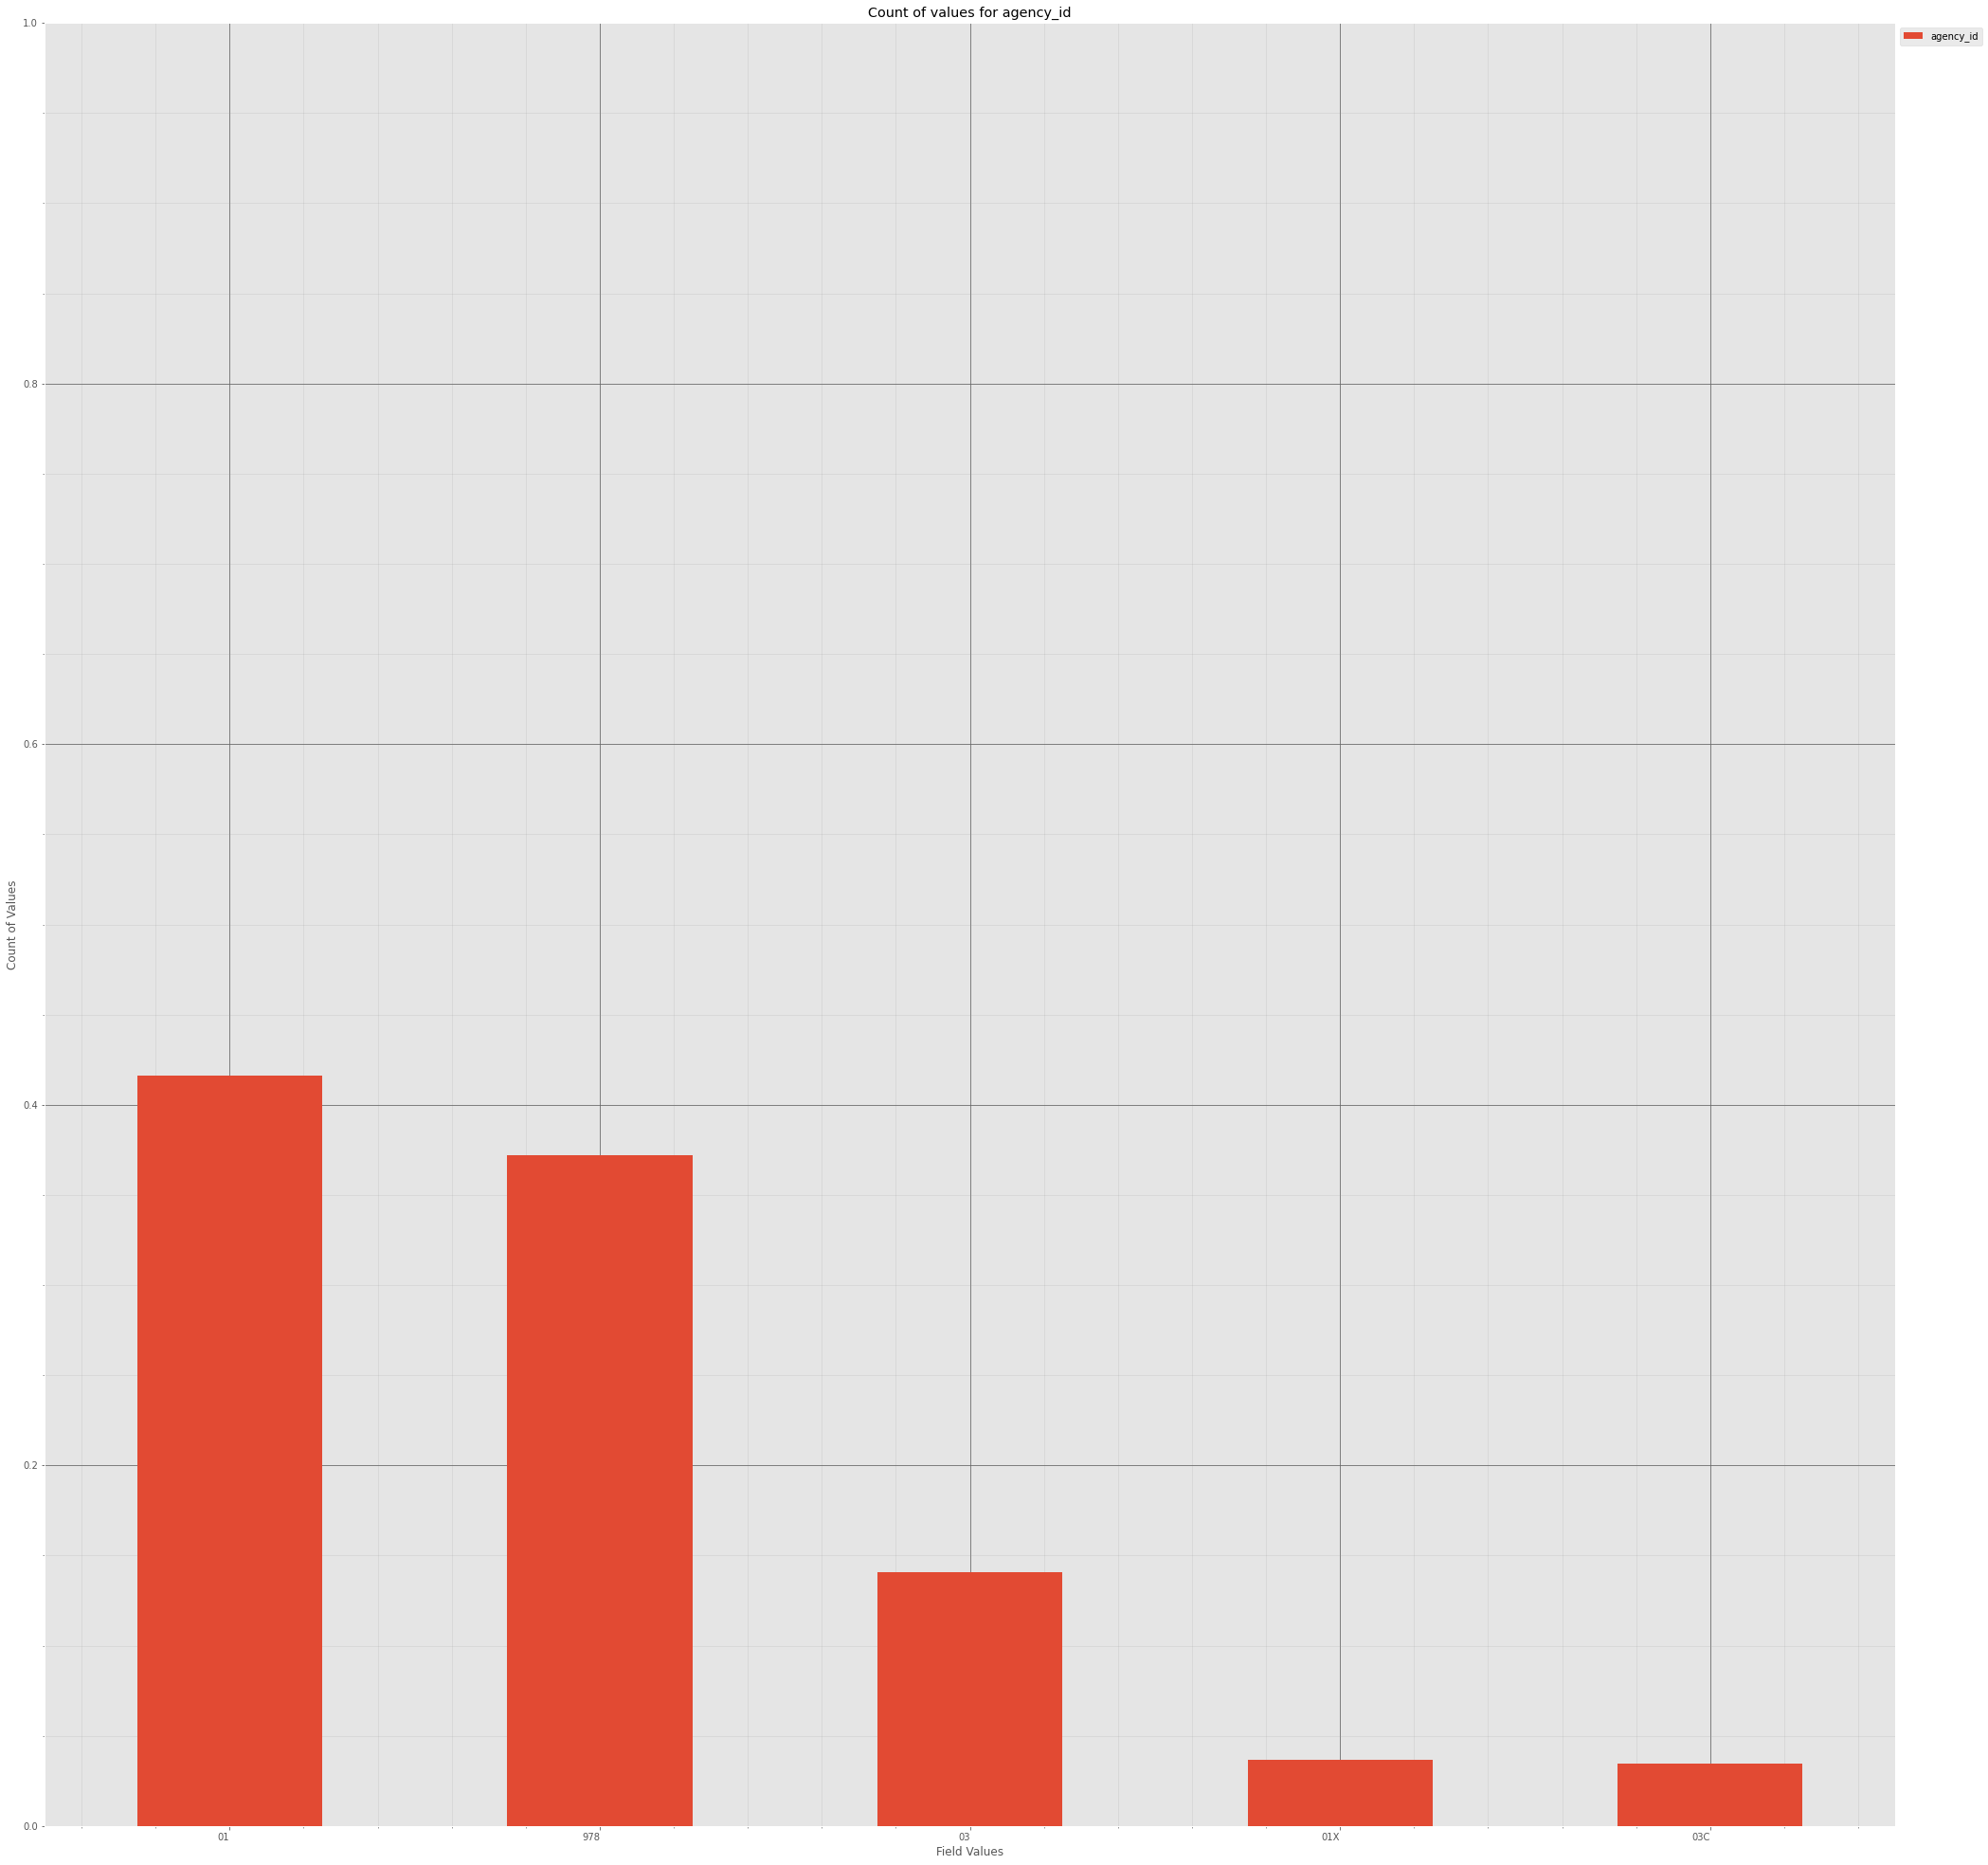



----------------------


                  route_id
route_short_name          
1                        2
100                      1
101                      1
102                      2
102-6                    2
...                    ...
9                        2
H1                       1
H2                       1
H3                       1
H9                       1

[389 rows x 1 columns]
Grouping over route_short_name results in:



,route_short_name,Rows,% Frequency
0,1,2,0.364964
1,100,1,0.182482
2,101,1,0.182482
3,102,2,0.364964
4,102-6,2,0.364964
...,...,...,...
384,9,2,0.364964
385,H1,1,0.182482
386,H2,1,0.182482
387,H3,1,0.182482


Non Zero Data:


,route_short_name,Rows,% Frequency
0,1,2,0.364964
1,100,1,0.182482
2,101,1,0.182482
3,102,2,0.364964
4,102-6,2,0.364964
...,...,...,...
384,9,2,0.364964
385,H1,1,0.182482
386,H2,1,0.182482
387,H3,1,0.182482




----------------------


                                              route_id
route_long_name                                       
- Ardee (Lidl)                                       1
- Bay Estate Dundalk                                 1
- Cavan Bus Station                                  1
- Drogheda Bus Station                               1
- Fatima                                             1
...                                                ...
Wilton Terrace -                                     1
Wilton Terrace - Abbey Road                          1
Wilton Terrace - Clonmellon                          1
Wilton Terrace - Shopping Centre                     2
Wilton Terrace - Termonabbey (Aston Village)         1

[378 rows x 1 columns]
Grouping over route_long_name results in:



,route_long_name,Rows,% Frequency
0,- Ardee (Lidl),1,0.182482
1,- Bay Estate Dundalk,1,0.182482
2,- Cavan Bus Station,1,0.182482
3,- Drogheda Bus Station,1,0.182482
4,- Fatima,1,0.182482
...,...,...,...
373,Wilton Terrace -,1,0.182482
374,Wilton Terrace - Abbey Road,1,0.182482
375,Wilton Terrace - Clonmellon,1,0.182482
376,Wilton Terrace - Shopping Centre,2,0.364964


Non Zero Data:


,route_long_name,Rows,% Frequency
0,- Ardee (Lidl),1,0.182482
1,- Bay Estate Dundalk,1,0.182482
2,- Cavan Bus Station,1,0.182482
3,- Drogheda Bus Station,1,0.182482
4,- Fatima,1,0.182482
...,...,...,...
373,Wilton Terrace -,1,0.182482
374,Wilton Terrace - Abbey Road,1,0.182482
375,Wilton Terrace - Clonmellon,1,0.182482
376,Wilton Terrace - Shopping Centre,2,0.364964




----------------------


            route_id
route_type          
3                548
Grouping over route_type results in:



,route_type,Rows,% Frequency
0,3,548,100.0


Non Zero Data:


,route_type,Rows,% Frequency
0,3,548,100.0


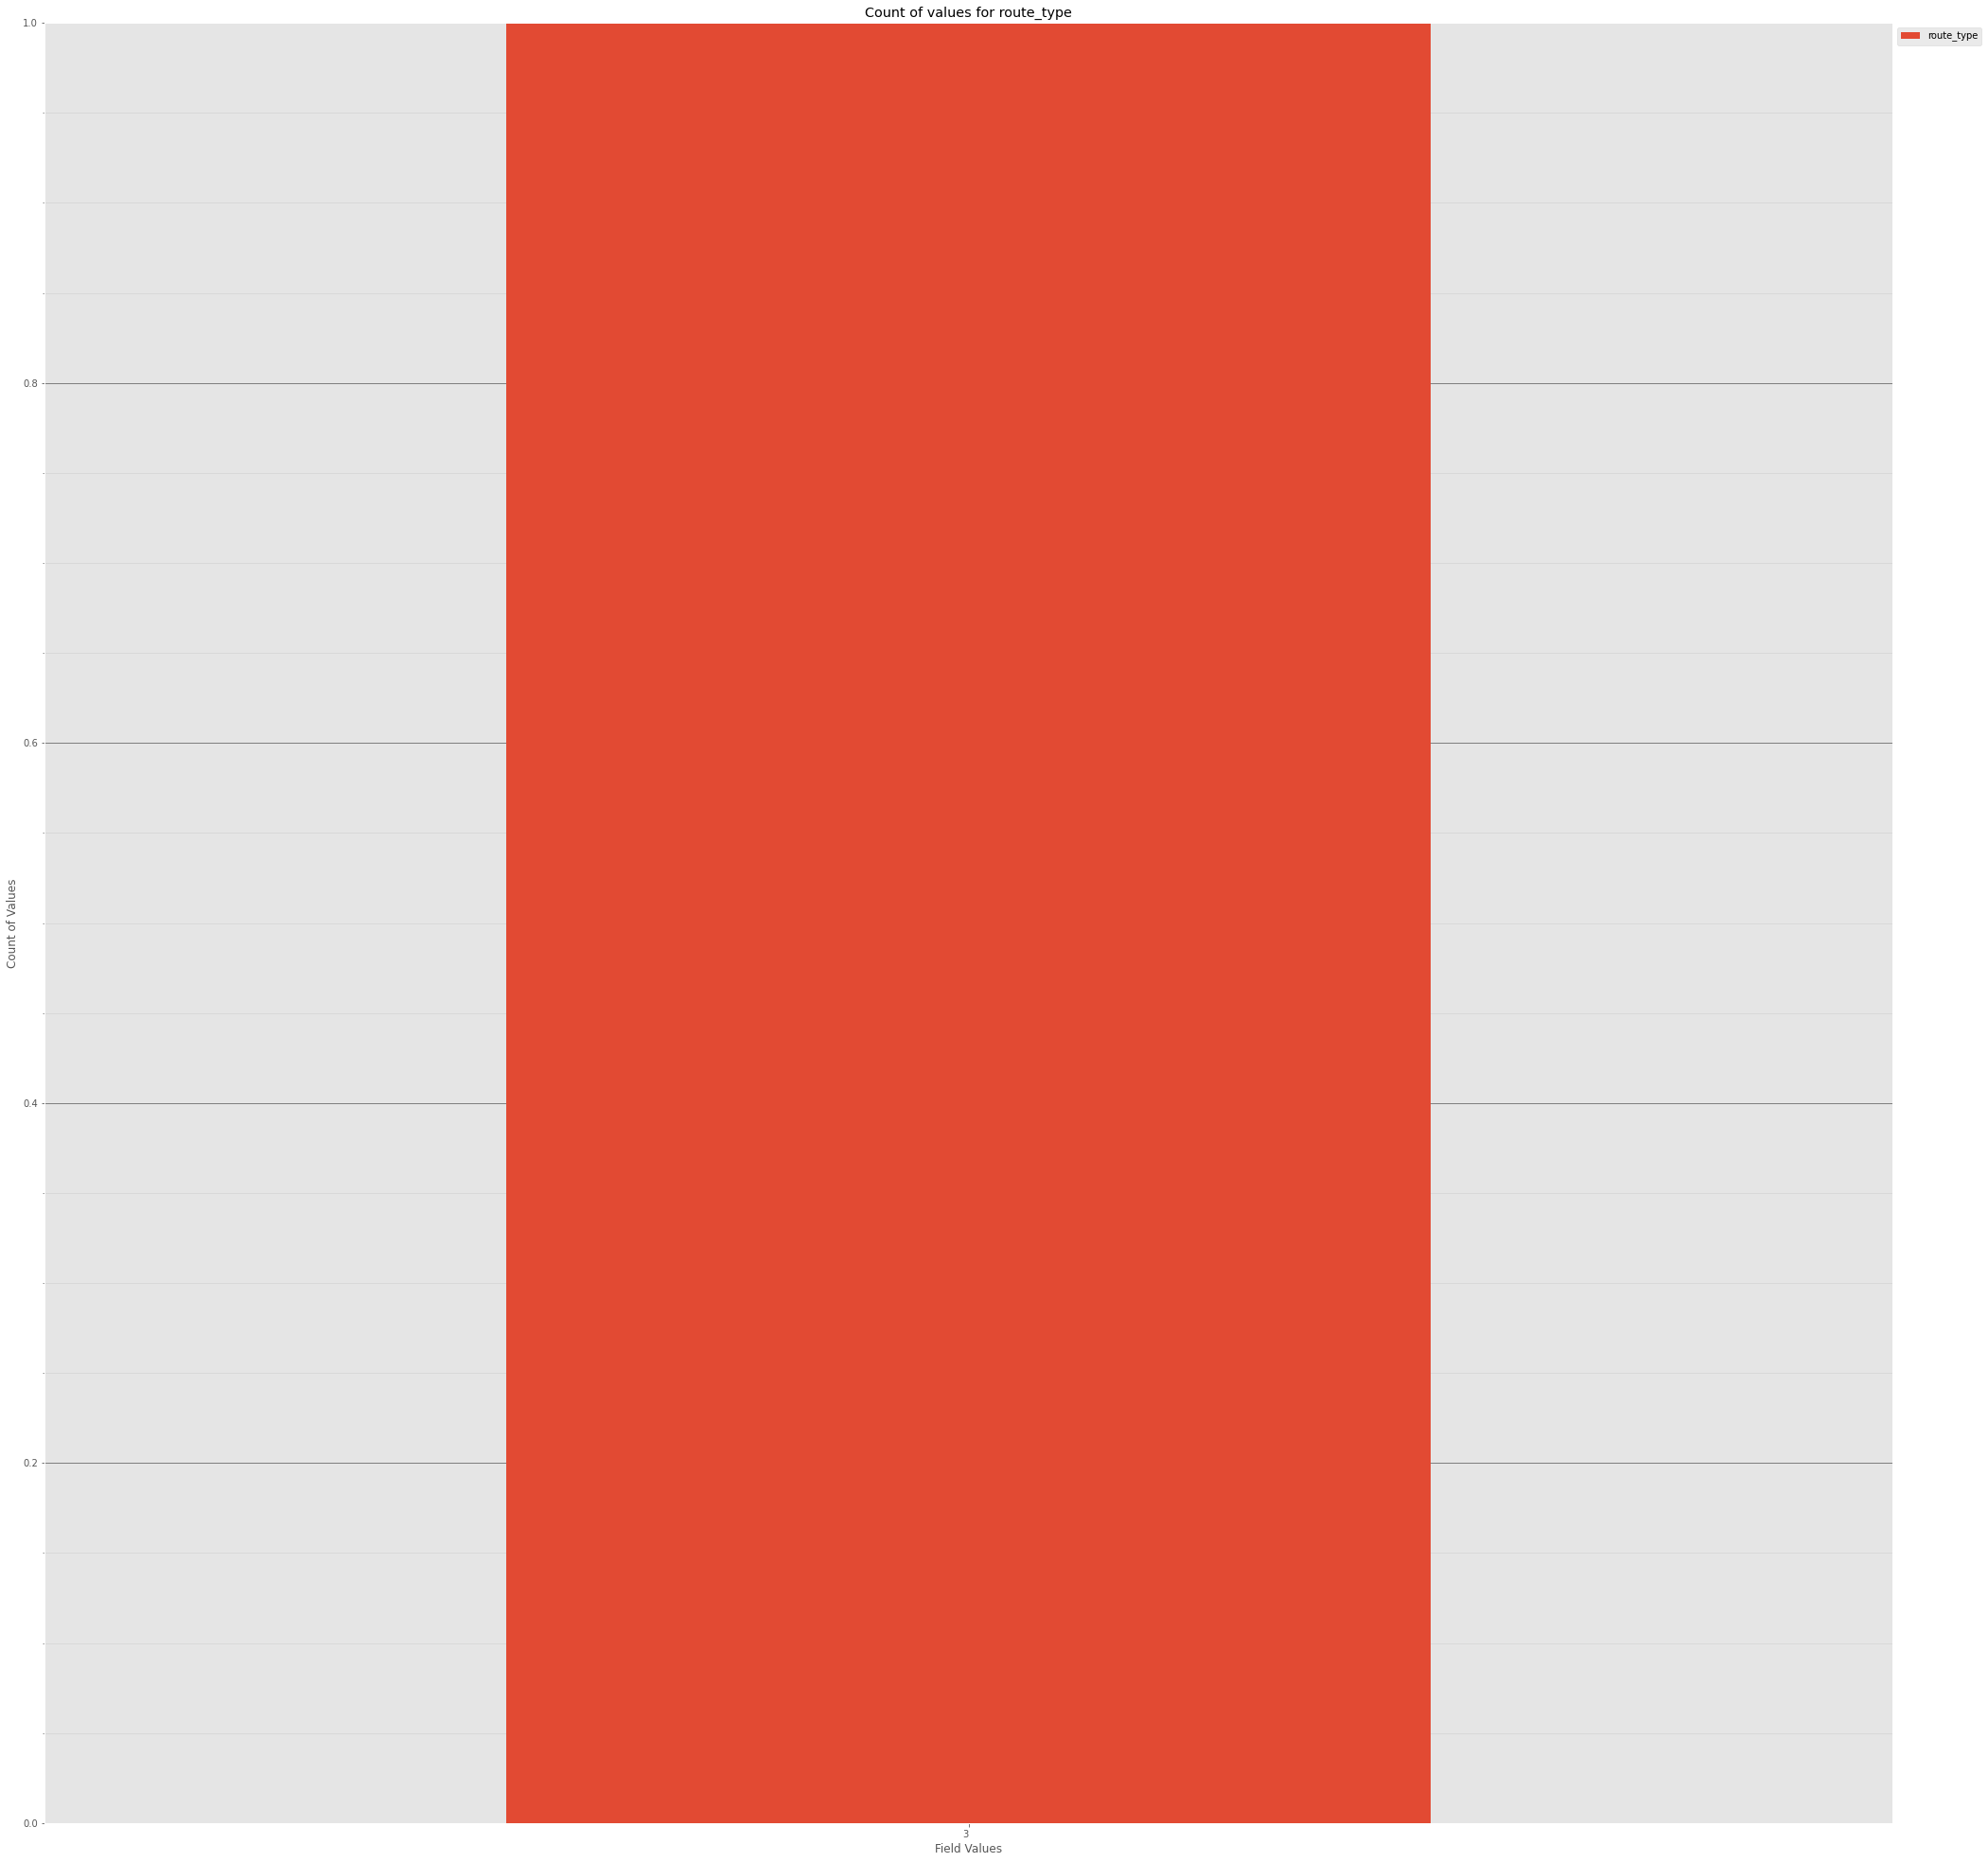

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,route_id,agency_id,route_short_name,route_long_name,route_type


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()


----------------------


Grouping over route_id|agency_id results in:



Rows  % Frequency
route_id     agency_id                   
10-100-e20-1 01            1     0.182482
             01X           0     0.000000
             03            0     0.000000
             03C           0     0.000000
             978           0     0.000000
...                      ...          ...
60-H9-b12-1  01            0     0.000000
             01X           0     0.000000
             03            0     0.000000
             03C           0     0.000000
             978           1     0.182482

[2740 rows x 2 columns]

Non Zero Data:


,,Rows,% Frequency
route_id,agency_id,,
10-100-e20-1,01,1,0.182482
10-101-e20-1,01,1,0.182482
10-103-e20-1,01,1,0.182482
10-104-e20-1,01,1,0.182482
10-105-e20-1,01,1,0.182482
...,...,...,...
60-9-d12-1,978,1,0.182482
60-H1-b12-1,978,1,0.182482
60-H2-b12-1,978,1,0.182482


Function exception:

cannot insert route_id, already exists
---------------------
---------------------
---------------------
BEGIN FILE: 5 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining stop_times.txt:


Inside ingest_data(./data/Google_Transit_Static/stop_times.txt,dictionary)
On Chunk: 1


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,1143.y1006.17-130-cm1-1.82.I,06:10:00,06:10:00,8260B136421,1,NaN,0,0,0.00
1,1143.y1006.17-130-cm1-1.82.I,06:18:00,06:18:00,8260B1324001,2,NaN,0,0,7572.44
2,1143.y1006.17-130-cm1-1.82.I,06:25:00,06:25:00,8260B1408801,3,NaN,0,0,15897.87
3,1143.y1006.17-130-cm1-1.82.I,06:32:00,06:32:00,8260B136431,4,NaN,0,0,22830.16
4,1143.y1006.17-130-cm1-1.82.I,06:34:00,06:34:00,8260B136391,5,NaN,0,0,24442.99
...,...,...,...,...,...,...,...,...,...
6019179,14786.10432.2-761-ga2-1.349.O,18:09:00,18:09:00,8230DB002201,35,NaN,0,0,15895.62
6019180,14786.10432.2-761-ga2-1.349.O,18:11:00,18:11:00,8230DB004401,36,NaN,0,0,16397.73
6019181,14786.10432.2-761-ga2-1.349.O,18:20:00,18:20:00,8240DB001813,37,NaN,0,0,21729.59
6019182,14786.10432.2-761-ga2-1.349.O,18:21:00,18:21:00,8240DB001814,38,NaN,0,0,22116.57


Your file contains: 
6019184 rows x 9 columns.


The following columns are present:
"trip_id"
"arrival_time"
"departure_time"
"stop_id"
"stop_sequence"
"stop_headsign"
"pickup_type"
"drop_off_type"
"shape_dist_traveled"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,trip_id,6019184,184095,3397.y1003.60-33E-b12-1.172.O,108,100%,0%,0%,None
1,arrival_time,6019184,77630,18:00:00,5940,100%,0%,0%,None
2,departure_time,6019184,77626,18:00:00,5943,100%,0%,0%,None
3,stop_id,6019184,10001,8370B2508401,9972,100%,0%,0%,None
4,stop_sequence,6019184,109,1,184095,100%,0%,3%,None
5,stop_headsign,1627385,134,Harristown,80923,27%,73%,1%,High
6,pickup_type,6019184,2,0,5924832,100%,0%,98%,None
7,drop_off_type,6019184,2,0,5938250,100%,0%,99%,None
8,shape_dist_traveled,6019184,30865,0.00,184095,100%,0%,3%,None





Sample Data:





,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,1143.y1006.17-130-cm1-1.82.I,06:10:00,06:10:00,8260B136421,1,NaN,0,0,0.00
1,1143.y1006.17-130-cm1-1.82.I,06:18:00,06:18:00,8260B1324001,2,NaN,0,0,7572.44
2,1143.y1006.17-130-cm1-1.82.I,06:25:00,06:25:00,8260B1408801,3,NaN,0,0,15897.87
3,1143.y1006.17-130-cm1-1.82.I,06:32:00,06:32:00,8260B136431,4,NaN,0,0,22830.16
4,1143.y1006.17-130-cm1-1.82.I,06:34:00,06:34:00,8260B136391,5,NaN,0,0,24442.99


Inside data_convert()
No need to convert to: datetime
Inside data_convert()
Converting to category
Inside data_convert()
Converting to Numerical
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


                              trip_id
trip_id                              
1.10432.2-18-ga2-1.15.I            62
1.Mo-Fr.2-197-y11-3.6.O            27
1.Sat.2-197-y11-3.6.O              27
1.Sun.2-197-y11-3.6.O              27
1.y1003.60-38-b12-1.178.I          60
...                               ...
9998.y1005.60-9-b12-1.12.O         66
9998.y1006.60-9-d12-1.10.O         66
9999.10414.2-451-ga2-1.320.I       57
9999.y1005.60-9-b12-1.14.I         68
9999.y1006.60-9-d12-1.12.I         68

[184095 rows x 1 columns]
Grouping over trip_id results in:



,trip_id,Rows,% Frequency
0,1.10432.2-18-ga2-1.15.I,62,0.001030
1,1.Mo-Fr.2-197-y11-3.6.O,27,0.000449
2,1.Sat.2-197-y11-3.6.O,27,0.000449
3,1.Sun.2-197-y11-3.6.O,27,0.000449
4,1.y1003.60-38-b12-1.178.I,60,0.000997
...,...,...,...
184090,9998.y1005.60-9-b12-1.12.O,66,0.001096
184091,9998.y1006.60-9-d12-1.10.O,66,0.001096
184092,9999.10414.2-451-ga2-1.320.I,57,0.000947
184093,9999.y1005.60-9-b12-1.14.I,68,0.001130


Non Zero Data:


,trip_id,Rows,% Frequency
0,1.10432.2-18-ga2-1.15.I,62,0.001030
1,1.Mo-Fr.2-197-y11-3.6.O,27,0.000449
2,1.Sat.2-197-y11-3.6.O,27,0.000449
3,1.Sun.2-197-y11-3.6.O,27,0.000449
4,1.y1003.60-38-b12-1.178.I,60,0.000997
...,...,...,...
184090,9998.y1005.60-9-b12-1.12.O,66,0.001096
184091,9998.y1006.60-9-d12-1.10.O,66,0.001096
184092,9999.10414.2-451-ga2-1.320.I,57,0.000947
184093,9999.y1005.60-9-b12-1.14.I,68,0.001130




----------------------


               trip_id
drop_off_type         
0              5938250
1                80934
Grouping over drop_off_type results in:



,drop_off_type,Rows,% Frequency
0,0,5938250,98.655399
1,1,80934,1.344601


Non Zero Data:


,drop_off_type,Rows,% Frequency
0,0,5938250,98.655399
1,1,80934,1.344601


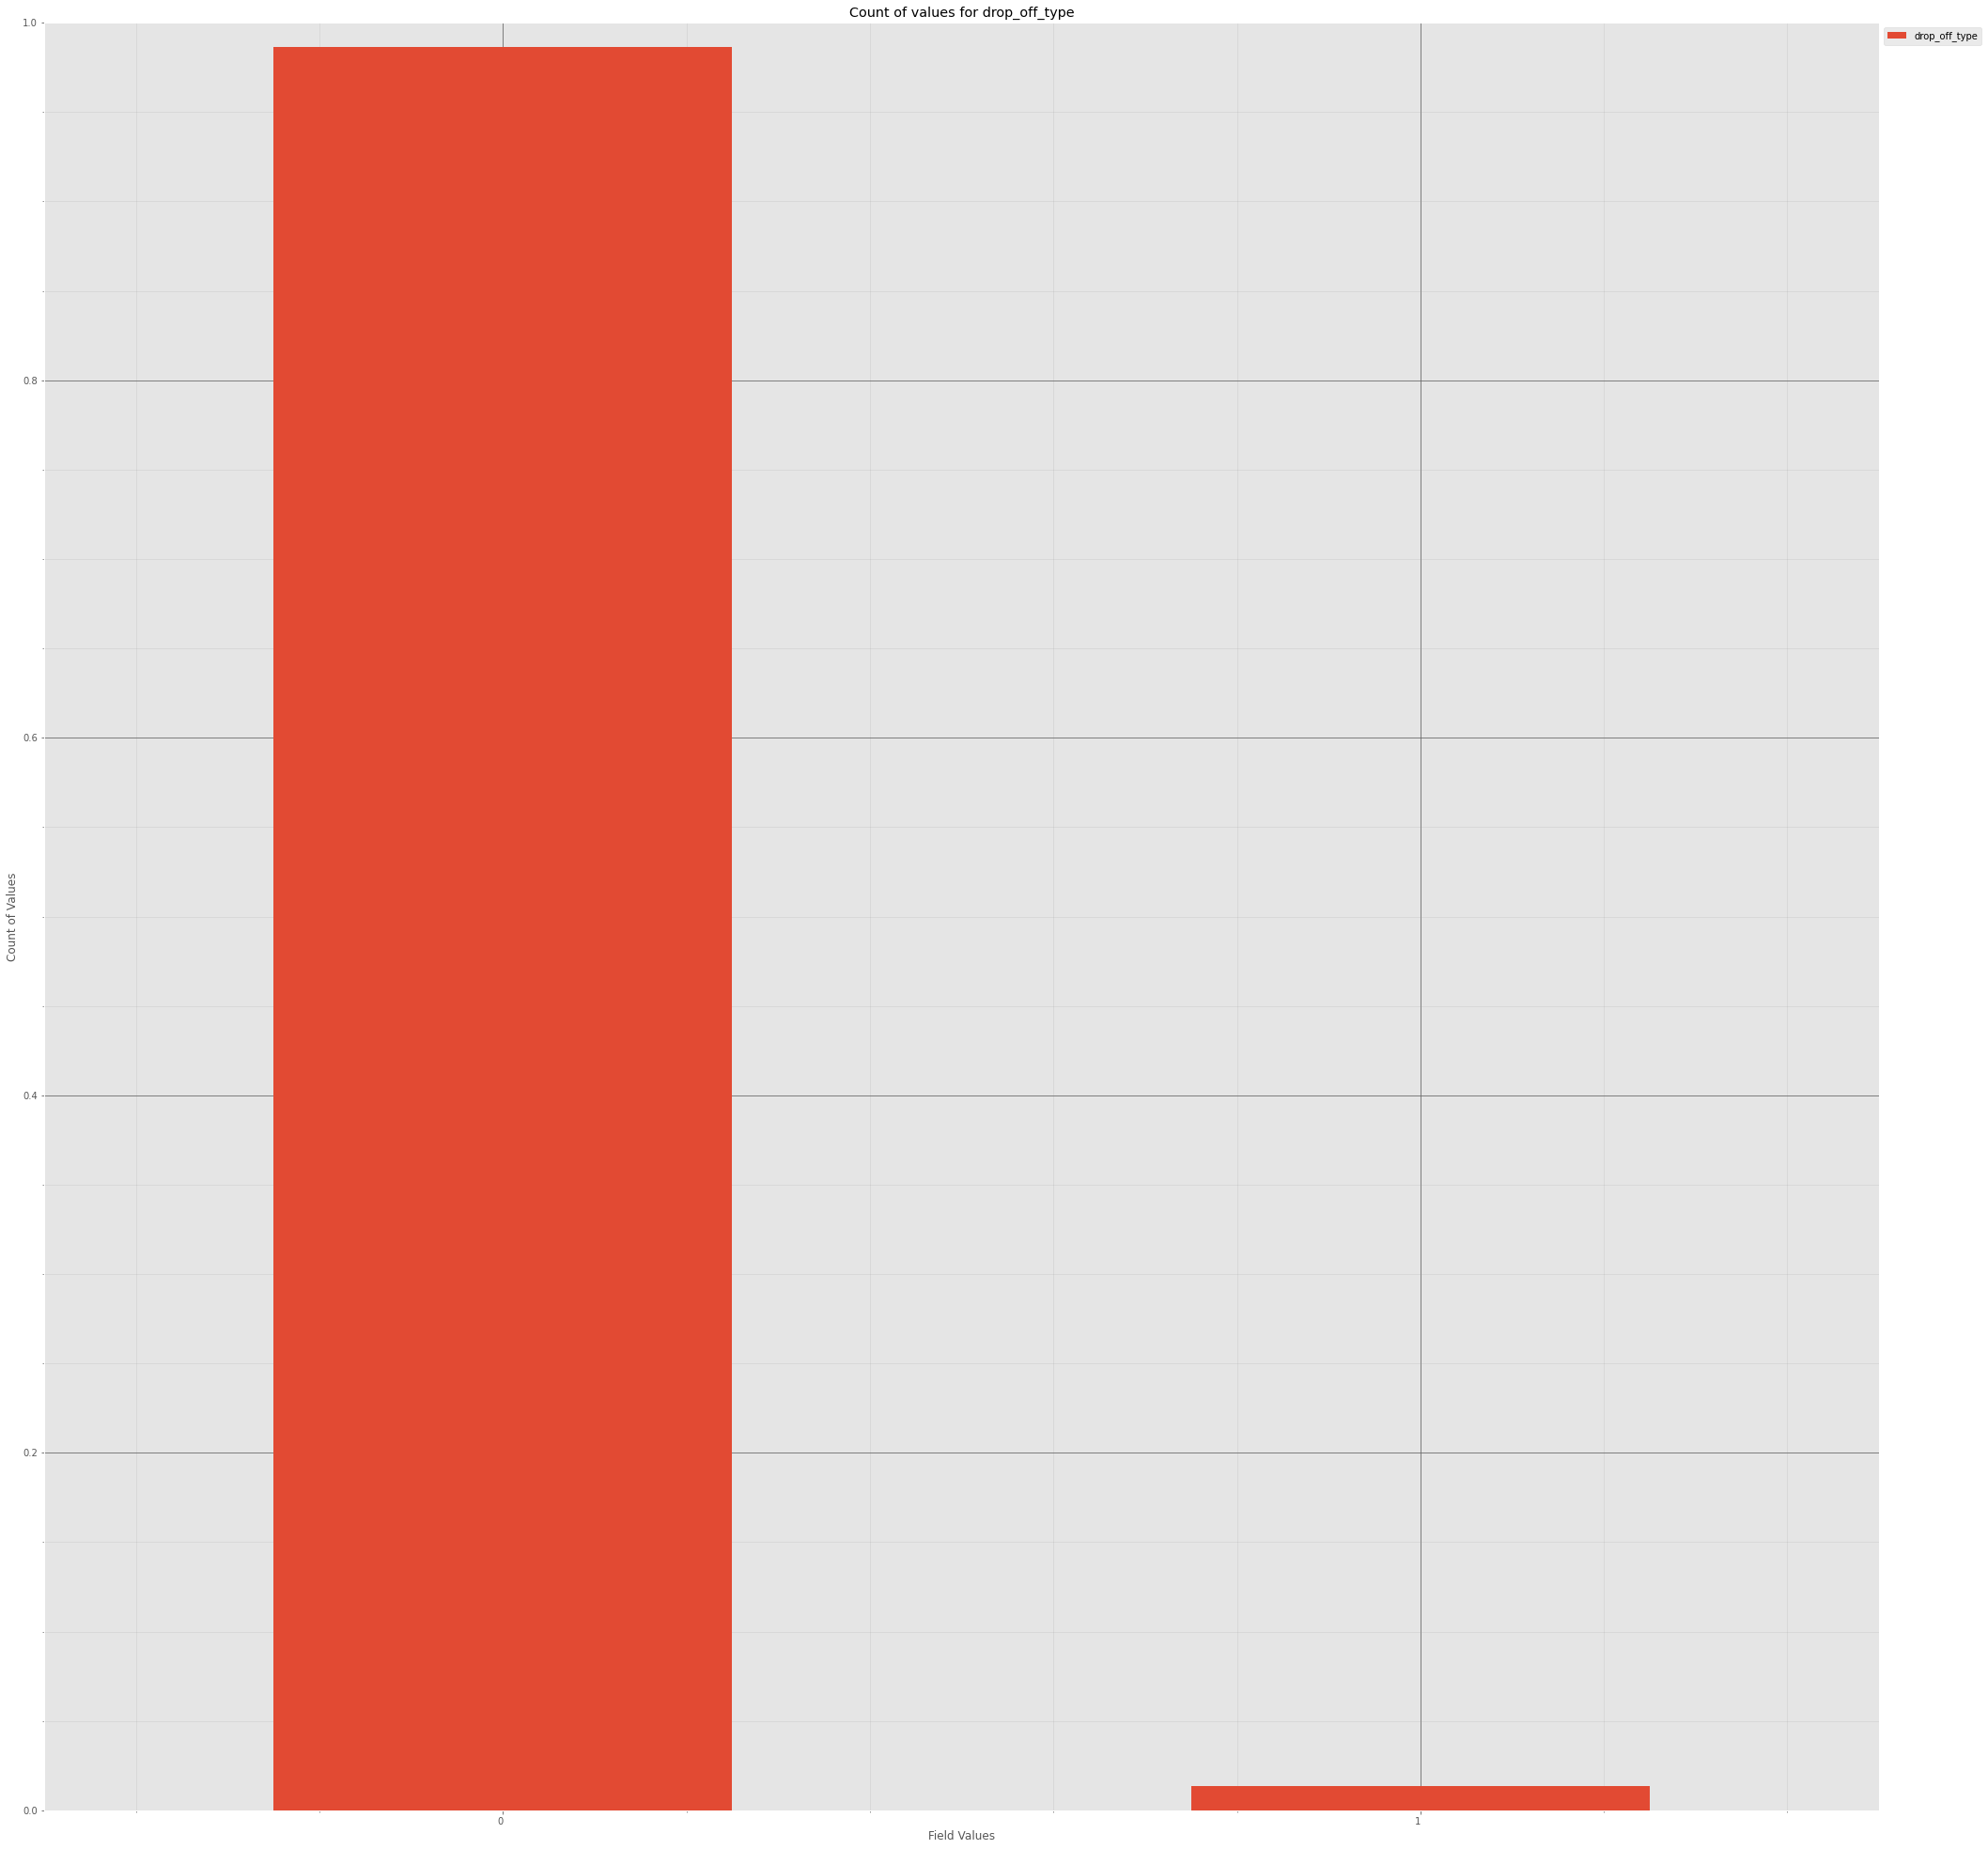

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()


----------------------


Grouping over trip_id|drop_off_type results in:



Rows  % Frequency
trip_id                      drop_off_type                   
1.10432.2-18-ga2-1.15.I      0                62     0.001030
                             1                 0     0.000000
1.Mo-Fr.2-197-y11-3.6.O      0                27     0.000449
                             1                 0     0.000000
1.Sat.2-197-y11-3.6.O        0                27     0.000449
...                                          ...          ...
9999.10414.2-451-ga2-1.320.I 1                 0     0.000000
9999.y1005.60-9-b12-1.14.I   0                68     0.001130
                             1                 0     0.000000
9999.y1006.60-9-d12-1.12.I   0                68     0.001130
                             1                 0     0.000000

[368190 rows x 2 columns]

Non Zero Data:


,,Rows,% Frequency
trip_id,drop_off_type,,
1.10432.2-18-ga2-1.15.I,0,62,0.001030
1.Mo-Fr.2-197-y11-3.6.O,0,27,0.000449
1.Sat.2-197-y11-3.6.O,0,27,0.000449
1.Sun.2-197-y11-3.6.O,0,27,0.000449
1.y1003.60-38-b12-1.178.I,0,60,0.000997
...,...,...,...
9998.y1005.60-9-b12-1.12.O,0,66,0.001096
9998.y1006.60-9-d12-1.10.O,0,66,0.001096
9999.10414.2-451-ga2-1.320.I,0,57,0.000947


Function exception:

cannot insert trip_id, already exists
---------------------
---------------------
---------------------
BEGIN FILE: 6 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining stops.txt:


Inside ingest_data(./data/Google_Transit_Static/stops.txt,dictionary)
On Chunk: 1


,stop_id,stop_name,stop_lat,stop_lon
0,7010B158131,"Ulsterbus Depot, stop 158131",54.9966287583879,-7.31786633503889
1,7010B158241,"Magee Campus, stop 158241",55.0044762847017,-7.32178170142125
2,704000000229,Killeen Bridge,54.1310086398614,-6.3460816123408
3,7040B107131,"Cullaville, stop 107131",54.0620448123764,-6.64352516920912
4,7040B139481,"Newry, stop 139481",54.168253025688,-6.33909756269812
...,...,...,...,...
9996,8540B1560001,"St Louis School, stop 156001",54.245451012376,-6.97150152741771
9997,8540B1560101,"Aughnacloy, stop 156011",54.4163536056681,-6.97887564887364
9998,8540B1560201,"Emyvale, stop 156021",54.3408952468477,-6.95943151243752
9999,8540B156591,"Aughnacloy, stop 156591",54.4164506050505,-6.97865753652676


Your file contains: 
10001 rows x 4 columns.


The following columns are present:
"stop_id"
"stop_name"
"stop_lat"
"stop_lon"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,stop_id,10001,10001,8340B331521,1,100%,0%,0%,None
1,stop_name,10001,10001,"Foxboro Cross, stop 589351",1,100%,0%,0%,None
2,stop_lat,10001,9956,52.8341606553074,2,100%,0%,0%,None
3,stop_lon,10001,9956,-6.2134523277172,2,100%,0%,0%,None





Sample Data:





,stop_id,stop_name,stop_lat,stop_lon
0,7010B158131,"Ulsterbus Depot, stop 158131",54.9966287583879,-7.31786633503889
1,7010B158241,"Magee Campus, stop 158241",55.0044762847017,-7.32178170142125
2,704000000229,Killeen Bridge,54.1310086398614,-6.3460816123408
3,7040B107131,"Cullaville, stop 107131",54.0620448123764,-6.64352516920912
4,7040B139481,"Newry, stop 139481",54.168253025688,-6.33909756269812


Inside data_convert()
No need to convert to: datetime
Inside data_convert()
Converting to category
Inside data_convert()
Converting to Numerical
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


                                 stop_id
stop_name                               
3Arena, stop 106421                    1
3Arena, stop 123501                    1
98 Street Junction, stop 243061        1
ALSAA Sports Club, stop 1630           1
ALSAA Sports Club, stop 1631           1
...                                  ...
Árd An Chóiste, stop 523881            1
Árd Aoibhinn Drive, stop 523551        1
Árd Na Groí, stop 353061               1
Árd Na Meala, stop 110                 1
Árd Scoil Rís, stop 1490               1

[10001 rows x 1 columns]
Grouping over stop_name results in:



,stop_name,Rows,% Frequency
0,"3Arena, stop 106421",1,0.009999
1,"3Arena, stop 123501",1,0.009999
2,"98 Street Junction, stop 243061",1,0.009999
3,"ALSAA Sports Club, stop 1630",1,0.009999
4,"ALSAA Sports Club, stop 1631",1,0.009999
...,...,...,...
9996,"Árd An Chóiste, stop 523881",1,0.009999
9997,"Árd Aoibhinn Drive, stop 523551",1,0.009999
9998,"Árd Na Groí, stop 353061",1,0.009999
9999,"Árd Na Meala, stop 110",1,0.009999


Non Zero Data:


,stop_name,Rows,% Frequency
0,"3Arena, stop 106421",1,0.009999
1,"3Arena, stop 123501",1,0.009999
2,"98 Street Junction, stop 243061",1,0.009999
3,"ALSAA Sports Club, stop 1630",1,0.009999
4,"ALSAA Sports Club, stop 1631",1,0.009999
...,...,...,...
9996,"Árd An Chóiste, stop 523881",1,0.009999
9997,"Árd Aoibhinn Drive, stop 523551",1,0.009999
9998,"Árd Na Groí, stop 353061",1,0.009999
9999,"Árd Na Meala, stop 110",1,0.009999


Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,stop_id,stop_name,stop_lat,stop_lon


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()
---------------------
---------------------
---------------------
BEGIN FILE: 7 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining transfers.txt:


Inside ingest_data(./data/Google_Transit_Static/transfers.txt,dictionary)
On Chunk: 1


,from_stop_id,to_stop_id,transfer_type,min_transfer_time
0,8250DB003073,8250DB003040,2,60
1,8250DB003073,8250DB003039,2,240
2,8380B1553801,8380B1553501,2,0
3,8430B155401,8430B255231,2,0
4,8430B255231,8430B155401,2,0
...,...,...,...,...
7146,8240B111921,8240B111931,2,390
7147,8240B111941,8240B111921,2,390
7148,8240B111941,8240B111931,2,30
7149,8240B111931,8240B111921,2,390


Your file contains: 
7151 rows x 4 columns.


The following columns are present:
"from_stop_id"
"to_stop_id"
"transfer_type"
"min_transfer_time"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,from_stop_id,7151,3954,8220DB000496,24,100%,0%,0%,None
1,to_stop_id,7151,3954,8220DB000496,24,100%,0%,0%,None
2,transfer_type,7151,2,2,7147,100%,0%,100%,None
3,min_transfer_time,7147,102,0,2758,100%,0%,39%,Low





Sample Data:





,from_stop_id,to_stop_id,transfer_type,min_transfer_time
0,8250DB003073,8250DB003040,2,60
1,8250DB003073,8250DB003039,2,240
2,8380B1553801,8380B1553501,2,0
3,8430B155401,8430B255231,2,0
4,8430B255231,8430B155401,2,0


Inside data_convert()
No need to convert to: datetime
Inside data_convert()
Converting to category
Inside data_convert()
Converting to Numerical
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


              from_stop_id
from_stop_id              
7010B158131              1
7010B158241              1
7050B6310001             1
8210B136211              1
8210B3511401             1
...                    ...
8540B1559301             1
8540B155941              1
8540B1560101             1
8540B1560201             1
8540B156591              1

[3954 rows x 1 columns]
Grouping over from_stop_id results in:



,from_stop_id,Rows,% Frequency
0,7010B158131,1,0.013984
1,7010B158241,1,0.013984
2,7050B6310001,1,0.013984
3,8210B136211,1,0.013984
4,8210B3511401,1,0.013984
...,...,...,...
3949,8540B1559301,1,0.013984
3950,8540B155941,1,0.013984
3951,8540B1560101,1,0.013984
3952,8540B1560201,1,0.013984


Non Zero Data:


,from_stop_id,Rows,% Frequency
0,7010B158131,1,0.013984
1,7010B158241,1,0.013984
2,7050B6310001,1,0.013984
3,8210B136211,1,0.013984
4,8210B3511401,1,0.013984
...,...,...,...
3949,8540B1559301,1,0.013984
3950,8540B155941,1,0.013984
3951,8540B1560101,1,0.013984
3952,8540B1560201,1,0.013984




----------------------


              from_stop_id
to_stop_id                
7010B158131              1
7010B158241              1
7050B6310001             1
8210B136211              1
8210B3511401             1
...                    ...
8540B1559301             1
8540B155941              1
8540B1560101             1
8540B1560201             1
8540B156591              1

[3954 rows x 1 columns]
Grouping over to_stop_id results in:



,to_stop_id,Rows,% Frequency
0,7010B158131,1,0.013984
1,7010B158241,1,0.013984
2,7050B6310001,1,0.013984
3,8210B136211,1,0.013984
4,8210B3511401,1,0.013984
...,...,...,...
3949,8540B1559301,1,0.013984
3950,8540B155941,1,0.013984
3951,8540B1560101,1,0.013984
3952,8540B1560201,1,0.013984


Non Zero Data:


,to_stop_id,Rows,% Frequency
0,7010B158131,1,0.013984
1,7010B158241,1,0.013984
2,7050B6310001,1,0.013984
3,8210B136211,1,0.013984
4,8210B3511401,1,0.013984
...,...,...,...
3949,8540B1559301,1,0.013984
3950,8540B155941,1,0.013984
3951,8540B1560101,1,0.013984
3952,8540B1560201,1,0.013984




----------------------


               from_stop_id
transfer_type              
2                      7147
3                         4
Grouping over transfer_type results in:



,transfer_type,Rows,% Frequency
0,2,7147,99.944064
1,3,4,0.055936


Non Zero Data:


,transfer_type,Rows,% Frequency
0,2,7147,99.944064
1,3,4,0.055936


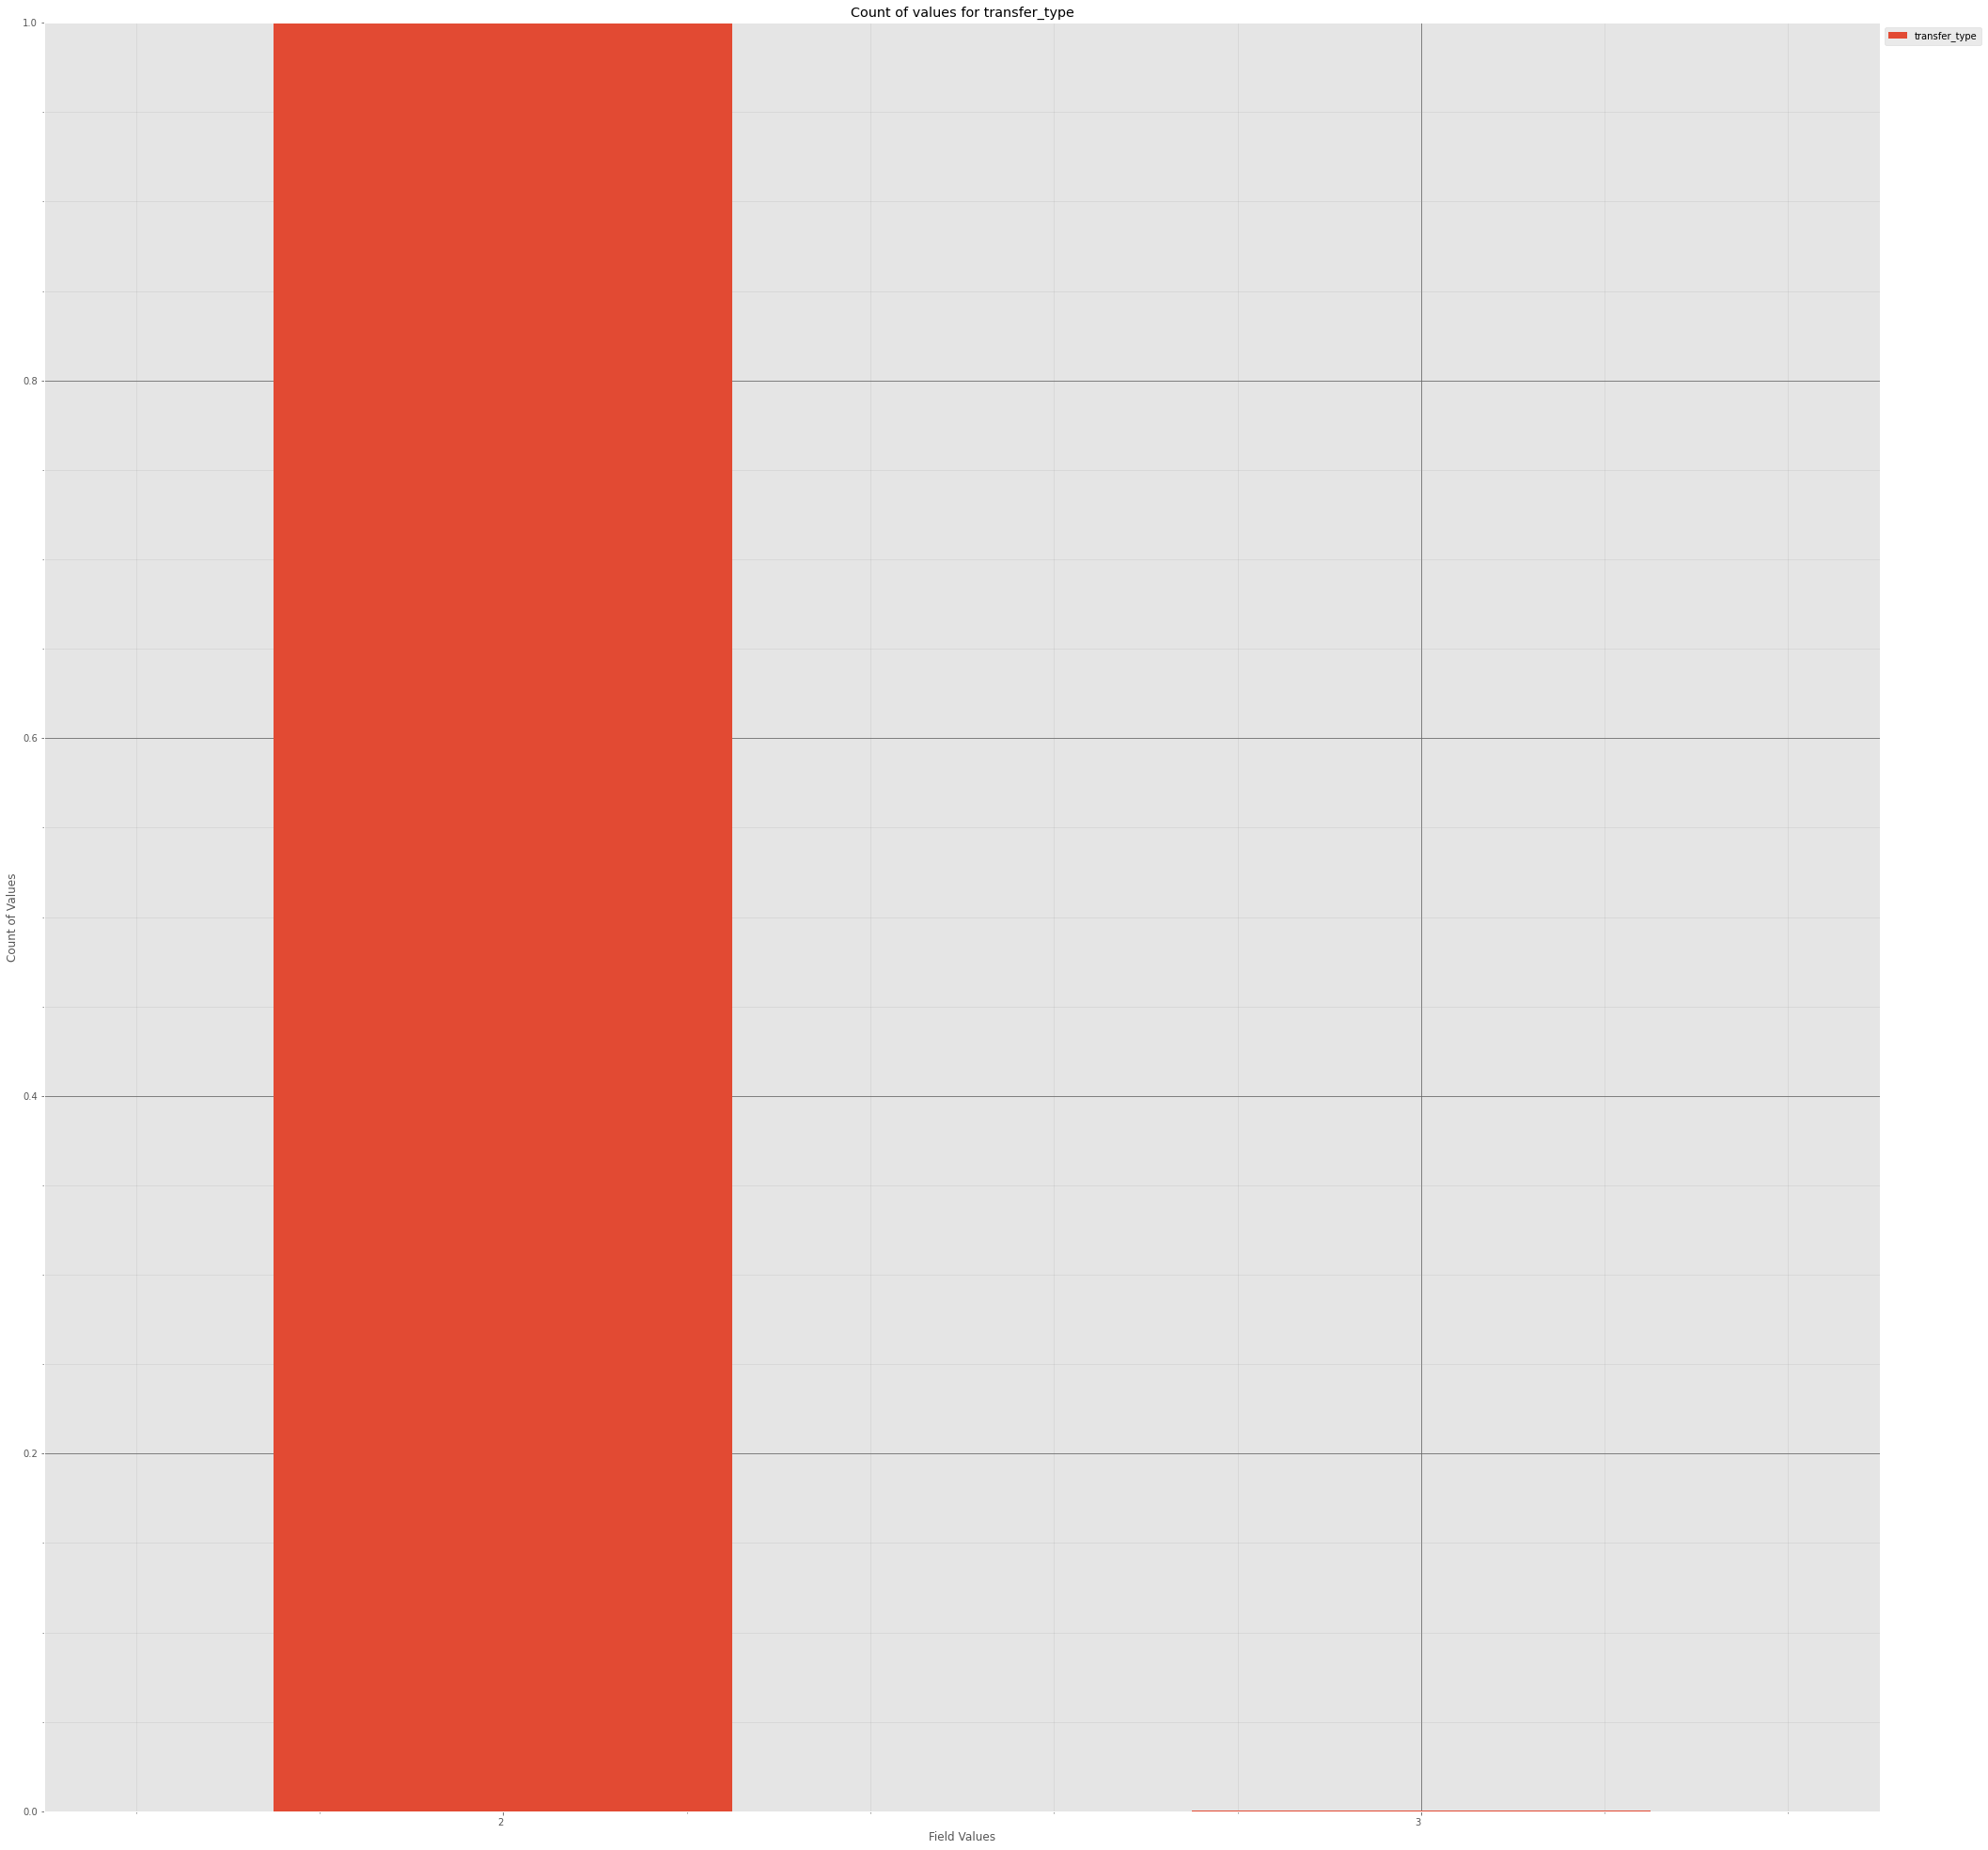

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,from_stop_id,to_stop_id,transfer_type,min_transfer_time


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
---------------------
---------------------
---------------------
BEGIN FILE: 8 ~ FILE NAME:
---------------------
---------------------
---------------------


Examining trips.txt:


Inside ingest_data(./data/Google_Transit_Static/trips.txt,dictionary)
On Chunk: 1


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,10-100-e20-1,1,1954979.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
1,10-100-e20-1,1,1954981.1.10-100-e20-1.231.O,10-100-e20-1.231.O,Drogheda Bus Station -,0
2,10-100-e20-1,1,1954982.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
3,10-100-e20-1,1,1954983.1.10-100-e20-1.231.O,10-100-e20-1.231.O,Drogheda Bus Station -,0
4,10-100-e20-1,1,1954984.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
...,...,...,...,...,...,...
184090,60-H3-b12-1,y1003#1,6742.y1003.60-H3-b12-1.354.I,60-H3-b12-1.354.I,Howth Summit - National Lottery Head Quarters,1
184091,60-H3-b12-1,y1003#1,6743.y1003.60-H3-b12-1.353.O,60-H3-b12-1.353.O,National Lottery Head Quarters - Howth Summit,0
184092,60-H9-b12-1,y1003#1,6665.y1003.60-H9-b12-1.97.I,60-H9-b12-1.97.I,All Saints Road - National Lottery Head Quarters,1
184093,60-H9-b12-1,y1003#1,6666.y1003.60-H9-b12-1.97.I,60-H9-b12-1.97.I,All Saints Road - National Lottery Head Quarters,1


Your file contains: 
184095 rows x 6 columns.


The following columns are present:
"route_id"
"service_id"
"trip_id"
"shape_id"
"trip_headsign"
"direction_id"

The columns in this data sample match the schema
Datetime: NotNumeric


,feature,count,unique,top,freq,% Populated,% Missing,% Top Value,Missing Warning
0,route_id,184095,548,10-409-e20-1,4329,100%,0%,2%,None
1,service_id,184095,85,y1003#1,6743,100%,0%,4%,None
2,trip_id,184095,184095,16231.10351.2-239-ga2-1.241.O,1,100%,0%,0%,None
3,shape_id,184095,2236,10-409-e20-1.1592.I,2190,100%,0%,1%,None
4,trip_headsign,184095,725,Stables University of Limerick - St. Nessan's Church,2427,100%,0%,1%,None
5,direction_id,184095,2,0,93772,100%,0%,51%,None





Sample Data:





,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,10-100-e20-1,1,1954979.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
1,10-100-e20-1,1,1954981.1.10-100-e20-1.231.O,10-100-e20-1.231.O,Drogheda Bus Station -,0
2,10-100-e20-1,1,1954982.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
3,10-100-e20-1,1,1954983.1.10-100-e20-1.231.O,10-100-e20-1.231.O,Drogheda Bus Station -,0
4,10-100-e20-1,1,1954984.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1


Inside data_convert()
No need to convert to: datetime
Inside data_convert()
Converting to category
Inside data_convert()
No need to convert
Inside data_convert()
Unknown type
-------------------
-------------------
Singles:
Inside group_over_single_categories()


----------------------


              route_id
route_id              
10-100-e20-1       558
10-101-e20-1      1893
10-103-e20-1      2283
10-104-e20-1      1548
10-105-e20-1      1332
...                ...
60-9-d12-1         265
60-H1-b12-1        383
60-H2-b12-1        193
60-H3-b12-1        214
60-H9-b12-1          3

[548 rows x 1 columns]
Grouping over route_id results in:



,route_id,Rows,% Frequency
0,10-100-e20-1,558,0.303104
1,10-101-e20-1,1893,1.028273
2,10-103-e20-1,2283,1.240121
3,10-104-e20-1,1548,0.840870
4,10-105-e20-1,1332,0.723539
...,...,...,...
543,60-9-d12-1,265,0.143947
544,60-H1-b12-1,383,0.208045
545,60-H2-b12-1,193,0.104837
546,60-H3-b12-1,214,0.116244


Non Zero Data:


,route_id,Rows,% Frequency
0,10-100-e20-1,558,0.303104
1,10-101-e20-1,1893,1.028273
2,10-103-e20-1,2283,1.240121
3,10-104-e20-1,1548,0.840870
4,10-105-e20-1,1332,0.723539
...,...,...,...
543,60-9-d12-1,265,0.143947
544,60-H1-b12-1,383,0.208045
545,60-H2-b12-1,193,0.104837
546,60-H3-b12-1,214,0.116244




----------------------


            route_id
service_id          
1               3231
1#1              310
1#2               48
10               374
10#1               2
...              ...
y1012           5788
y1012#1           48
y1013           5675
y1014           5675
y1015           5658

[85 rows x 1 columns]
Grouping over service_id results in:



,service_id,Rows,% Frequency
0,1,3231,1.755072
1,1#1,310,0.168391
2,1#2,48,0.026073
3,10,374,0.203156
4,10#1,2,0.001086
...,...,...,...
80,y1012,5788,3.144029
81,y1012#1,48,0.026073
82,y1013,5675,3.082648
83,y1014,5675,3.082648


Non Zero Data:


,service_id,Rows,% Frequency
0,1,3231,1.755072
1,1#1,310,0.168391
2,1#2,48,0.026073
3,10,374,0.203156
4,10#1,2,0.001086
...,...,...,...
80,y1012,5788,3.144029
81,y1012#1,48,0.026073
82,y1013,5675,3.082648
83,y1014,5675,3.082648


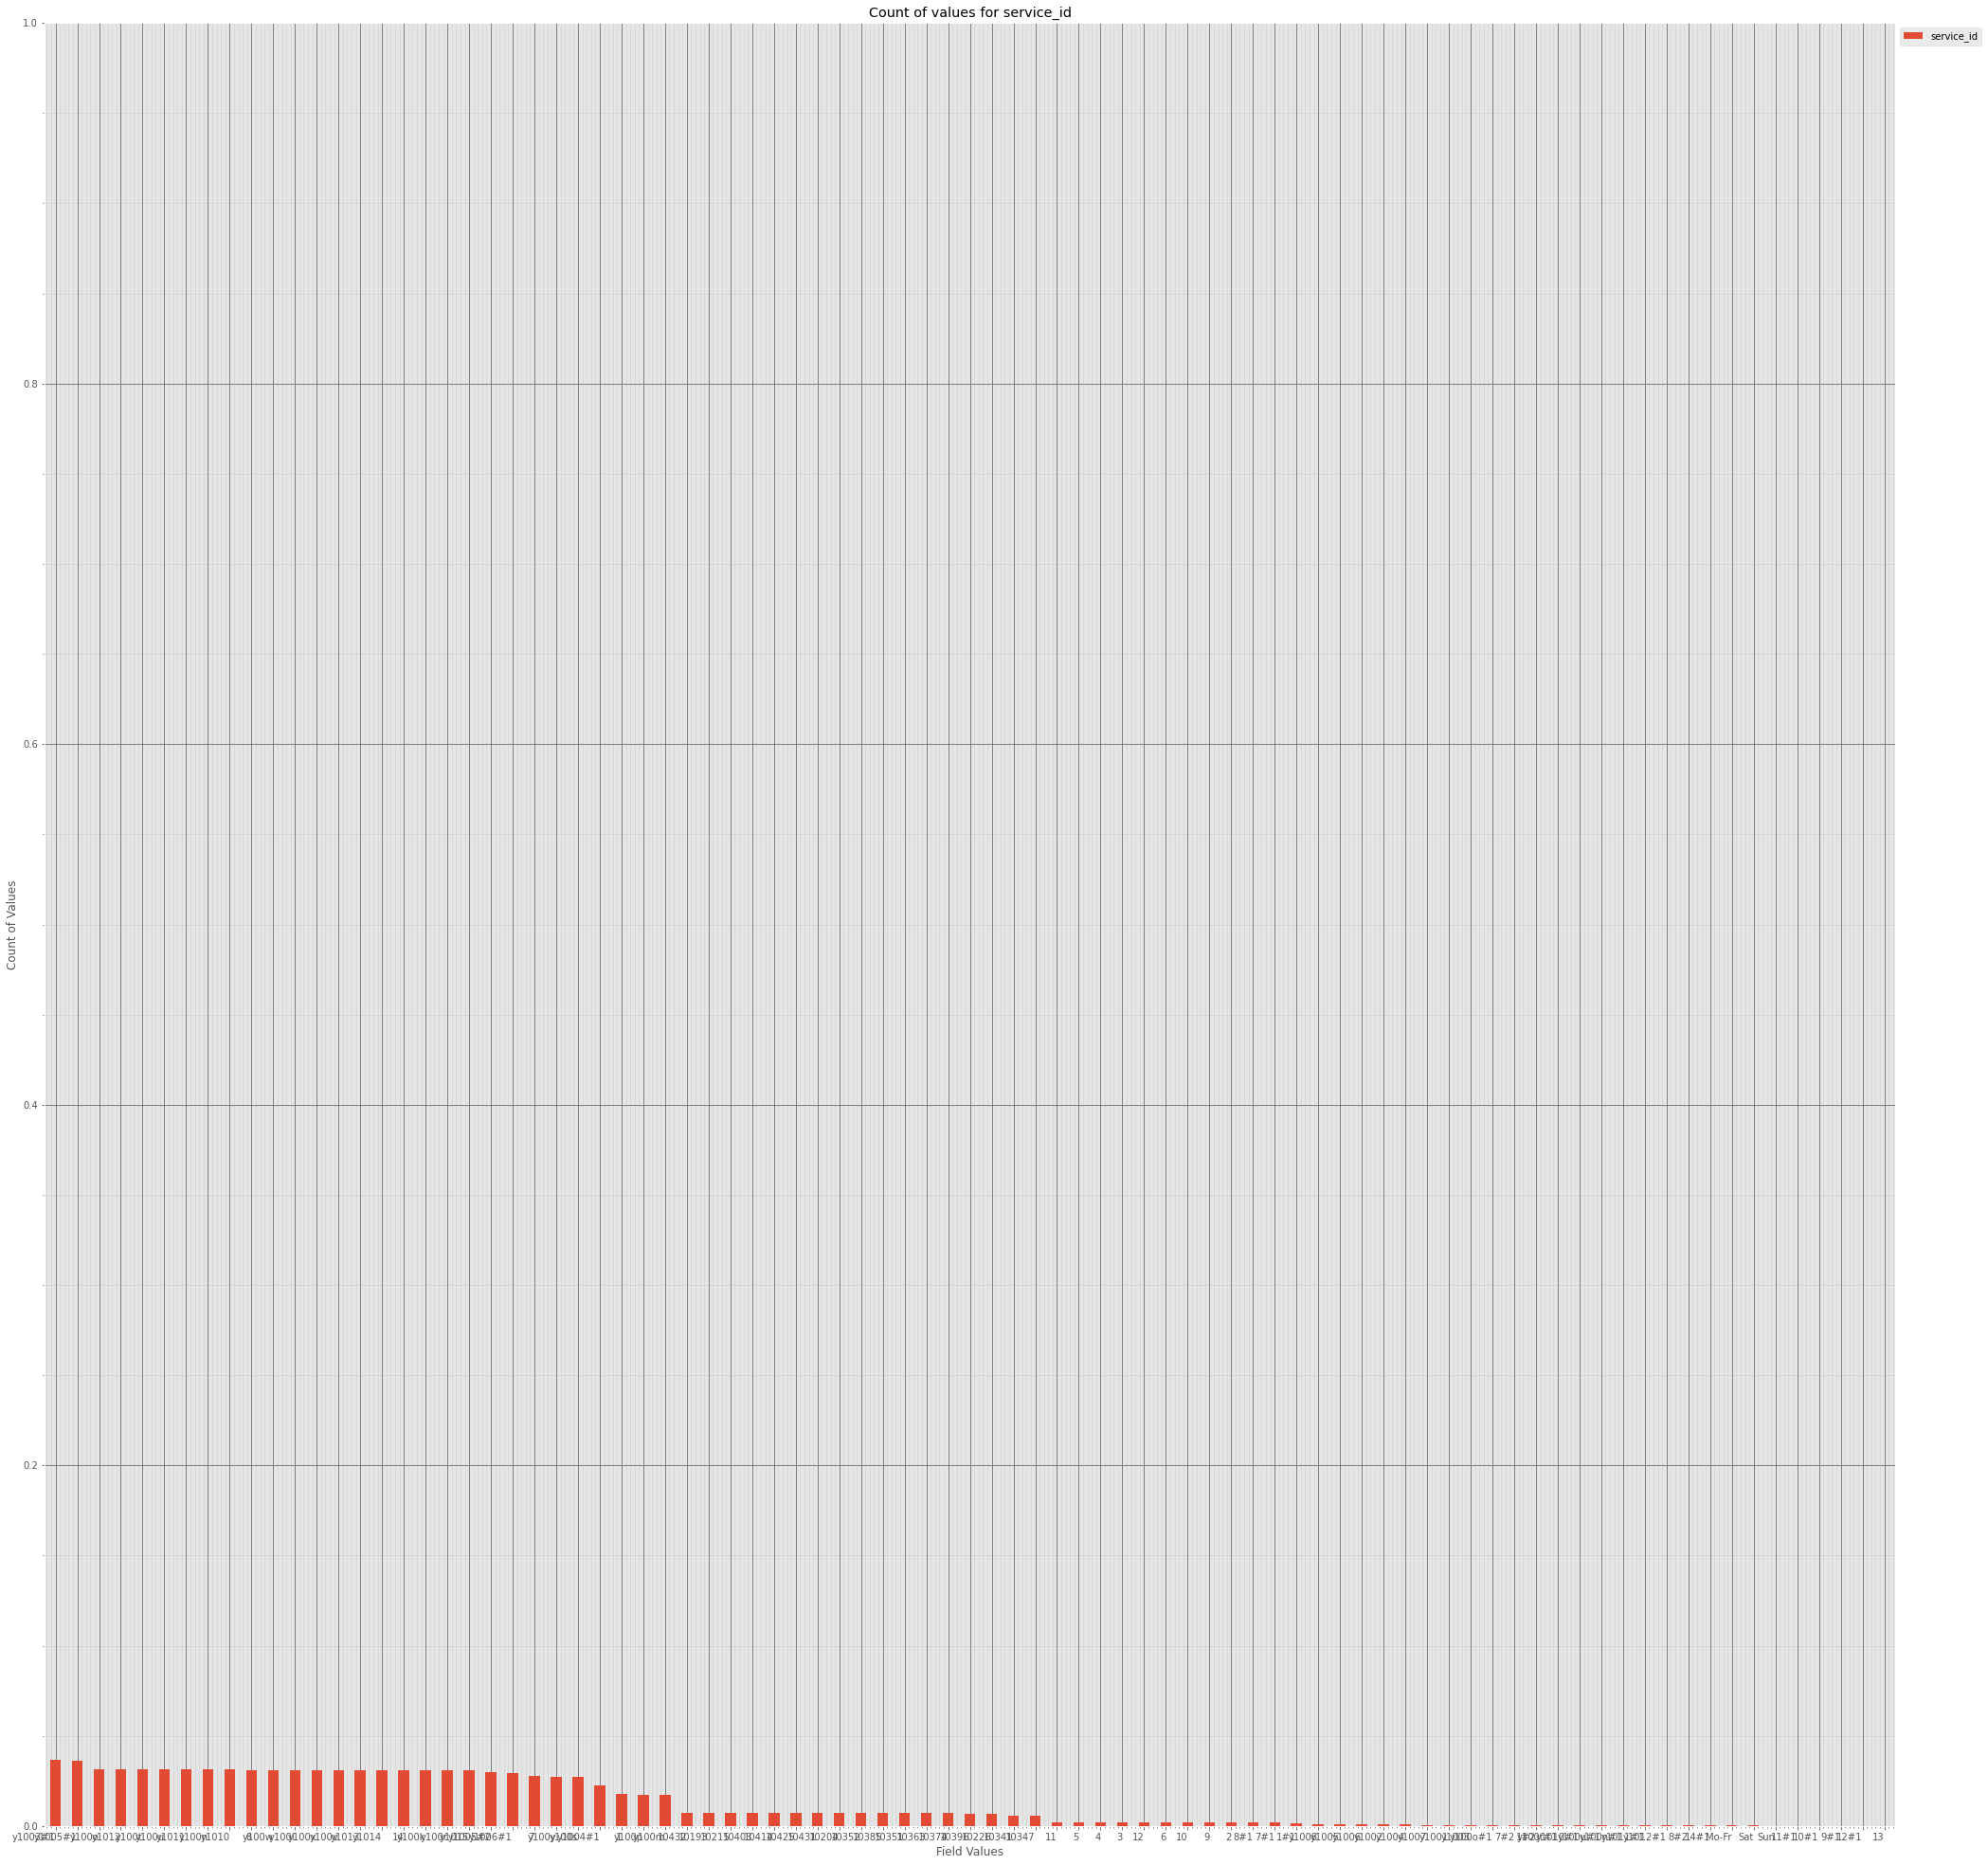



----------------------


                              route_id
trip_id                               
1.10432.2-18-ga2-1.15.I              1
1.Mo-Fr.2-197-y11-3.6.O              1
1.Sat.2-197-y11-3.6.O                1
1.Sun.2-197-y11-3.6.O                1
1.y1003.60-38-b12-1.178.I            1
...                                ...
9998.y1005.60-9-b12-1.12.O           1
9998.y1006.60-9-d12-1.10.O           1
9999.10414.2-451-ga2-1.320.I         1
9999.y1005.60-9-b12-1.14.I           1
9999.y1006.60-9-d12-1.12.I           1

[184095 rows x 1 columns]
Grouping over trip_id results in:



,trip_id,Rows,% Frequency
0,1.10432.2-18-ga2-1.15.I,1,0.000543
1,1.Mo-Fr.2-197-y11-3.6.O,1,0.000543
2,1.Sat.2-197-y11-3.6.O,1,0.000543
3,1.Sun.2-197-y11-3.6.O,1,0.000543
4,1.y1003.60-38-b12-1.178.I,1,0.000543
...,...,...,...
184090,9998.y1005.60-9-b12-1.12.O,1,0.000543
184091,9998.y1006.60-9-d12-1.10.O,1,0.000543
184092,9999.10414.2-451-ga2-1.320.I,1,0.000543
184093,9999.y1005.60-9-b12-1.14.I,1,0.000543


Non Zero Data:


,trip_id,Rows,% Frequency
0,1.10432.2-18-ga2-1.15.I,1,0.000543
1,1.Mo-Fr.2-197-y11-3.6.O,1,0.000543
2,1.Sat.2-197-y11-3.6.O,1,0.000543
3,1.Sun.2-197-y11-3.6.O,1,0.000543
4,1.y1003.60-38-b12-1.178.I,1,0.000543
...,...,...,...
184090,9998.y1005.60-9-b12-1.12.O,1,0.000543
184091,9998.y1006.60-9-d12-1.10.O,1,0.000543
184092,9999.10414.2-451-ga2-1.320.I,1,0.000543
184093,9999.y1005.60-9-b12-1.14.I,1,0.000543




----------------------


                    route_id
shape_id                    
10-100-e20-1.229.O        42
10-100-e20-1.230.I        42
10-100-e20-1.231.O       237
10-100-e20-1.232.I       237
10-101-e20-1.235.I       804
...                      ...
60-H2-b12-1.351.O         96
60-H2-b12-1.352.I         97
60-H3-b12-1.353.O        107
60-H3-b12-1.354.I        107
60-H9-b12-1.97.I           3

[2236 rows x 1 columns]
Grouping over shape_id results in:



,shape_id,Rows,% Frequency
0,10-100-e20-1.229.O,42,0.022814
1,10-100-e20-1.230.I,42,0.022814
2,10-100-e20-1.231.O,237,0.128738
3,10-100-e20-1.232.I,237,0.128738
4,10-101-e20-1.235.I,804,0.436731
...,...,...,...
2231,60-H2-b12-1.351.O,96,0.052147
2232,60-H2-b12-1.352.I,97,0.052690
2233,60-H3-b12-1.353.O,107,0.058122
2234,60-H3-b12-1.354.I,107,0.058122


Non Zero Data:


,shape_id,Rows,% Frequency
0,10-100-e20-1.229.O,42,0.022814
1,10-100-e20-1.230.I,42,0.022814
2,10-100-e20-1.231.O,237,0.128738
3,10-100-e20-1.232.I,237,0.128738
4,10-101-e20-1.235.I,804,0.436731
...,...,...,...
2231,60-H2-b12-1.351.O,96,0.052147
2232,60-H2-b12-1.352.I,97,0.052690
2233,60-H3-b12-1.353.O,107,0.058122
2234,60-H3-b12-1.354.I,107,0.058122




----------------------


                                              route_id
trip_headsign                                         
- Ardee (Lidl)                                     147
- Bay Estate Dundalk                               477
- Cavan Bus Station                                102
- Drogheda Bus Station                             498
- Fatima                                           474
...                                                ...
Wilton Terrace -                                   327
Wilton Terrace - Abbey Road                       1251
Wilton Terrace - Clonmellon                         54
Wilton Terrace - Shopping Centre                   220
Wilton Terrace - Termonabbey (Aston Village)        72

[725 rows x 1 columns]
Grouping over trip_headsign results in:



,trip_headsign,Rows,% Frequency
0,- Ardee (Lidl),147,0.079850
1,- Bay Estate Dundalk,477,0.259105
2,- Cavan Bus Station,102,0.055406
3,- Drogheda Bus Station,498,0.270513
4,- Fatima,474,0.257476
...,...,...,...
720,Wilton Terrace -,327,0.177626
721,Wilton Terrace - Abbey Road,1251,0.679540
722,Wilton Terrace - Clonmellon,54,0.029333
723,Wilton Terrace - Shopping Centre,220,0.119504


Non Zero Data:


,trip_headsign,Rows,% Frequency
0,- Ardee (Lidl),147,0.079850
1,- Bay Estate Dundalk,477,0.259105
2,- Cavan Bus Station,102,0.055406
3,- Drogheda Bus Station,498,0.270513
4,- Fatima,474,0.257476
...,...,...,...
720,Wilton Terrace -,327,0.177626
721,Wilton Terrace - Abbey Road,1251,0.679540
722,Wilton Terrace - Clonmellon,54,0.029333
723,Wilton Terrace - Shopping Centre,220,0.119504




----------------------


              route_id
direction_id          
0                93772
1                90323
Grouping over direction_id results in:



,direction_id,Rows,% Frequency
0,0,93772,50.936745
1,1,90323,49.063255


Non Zero Data:


,direction_id,Rows,% Frequency
0,0,93772,50.936745
1,1,90323,49.063255


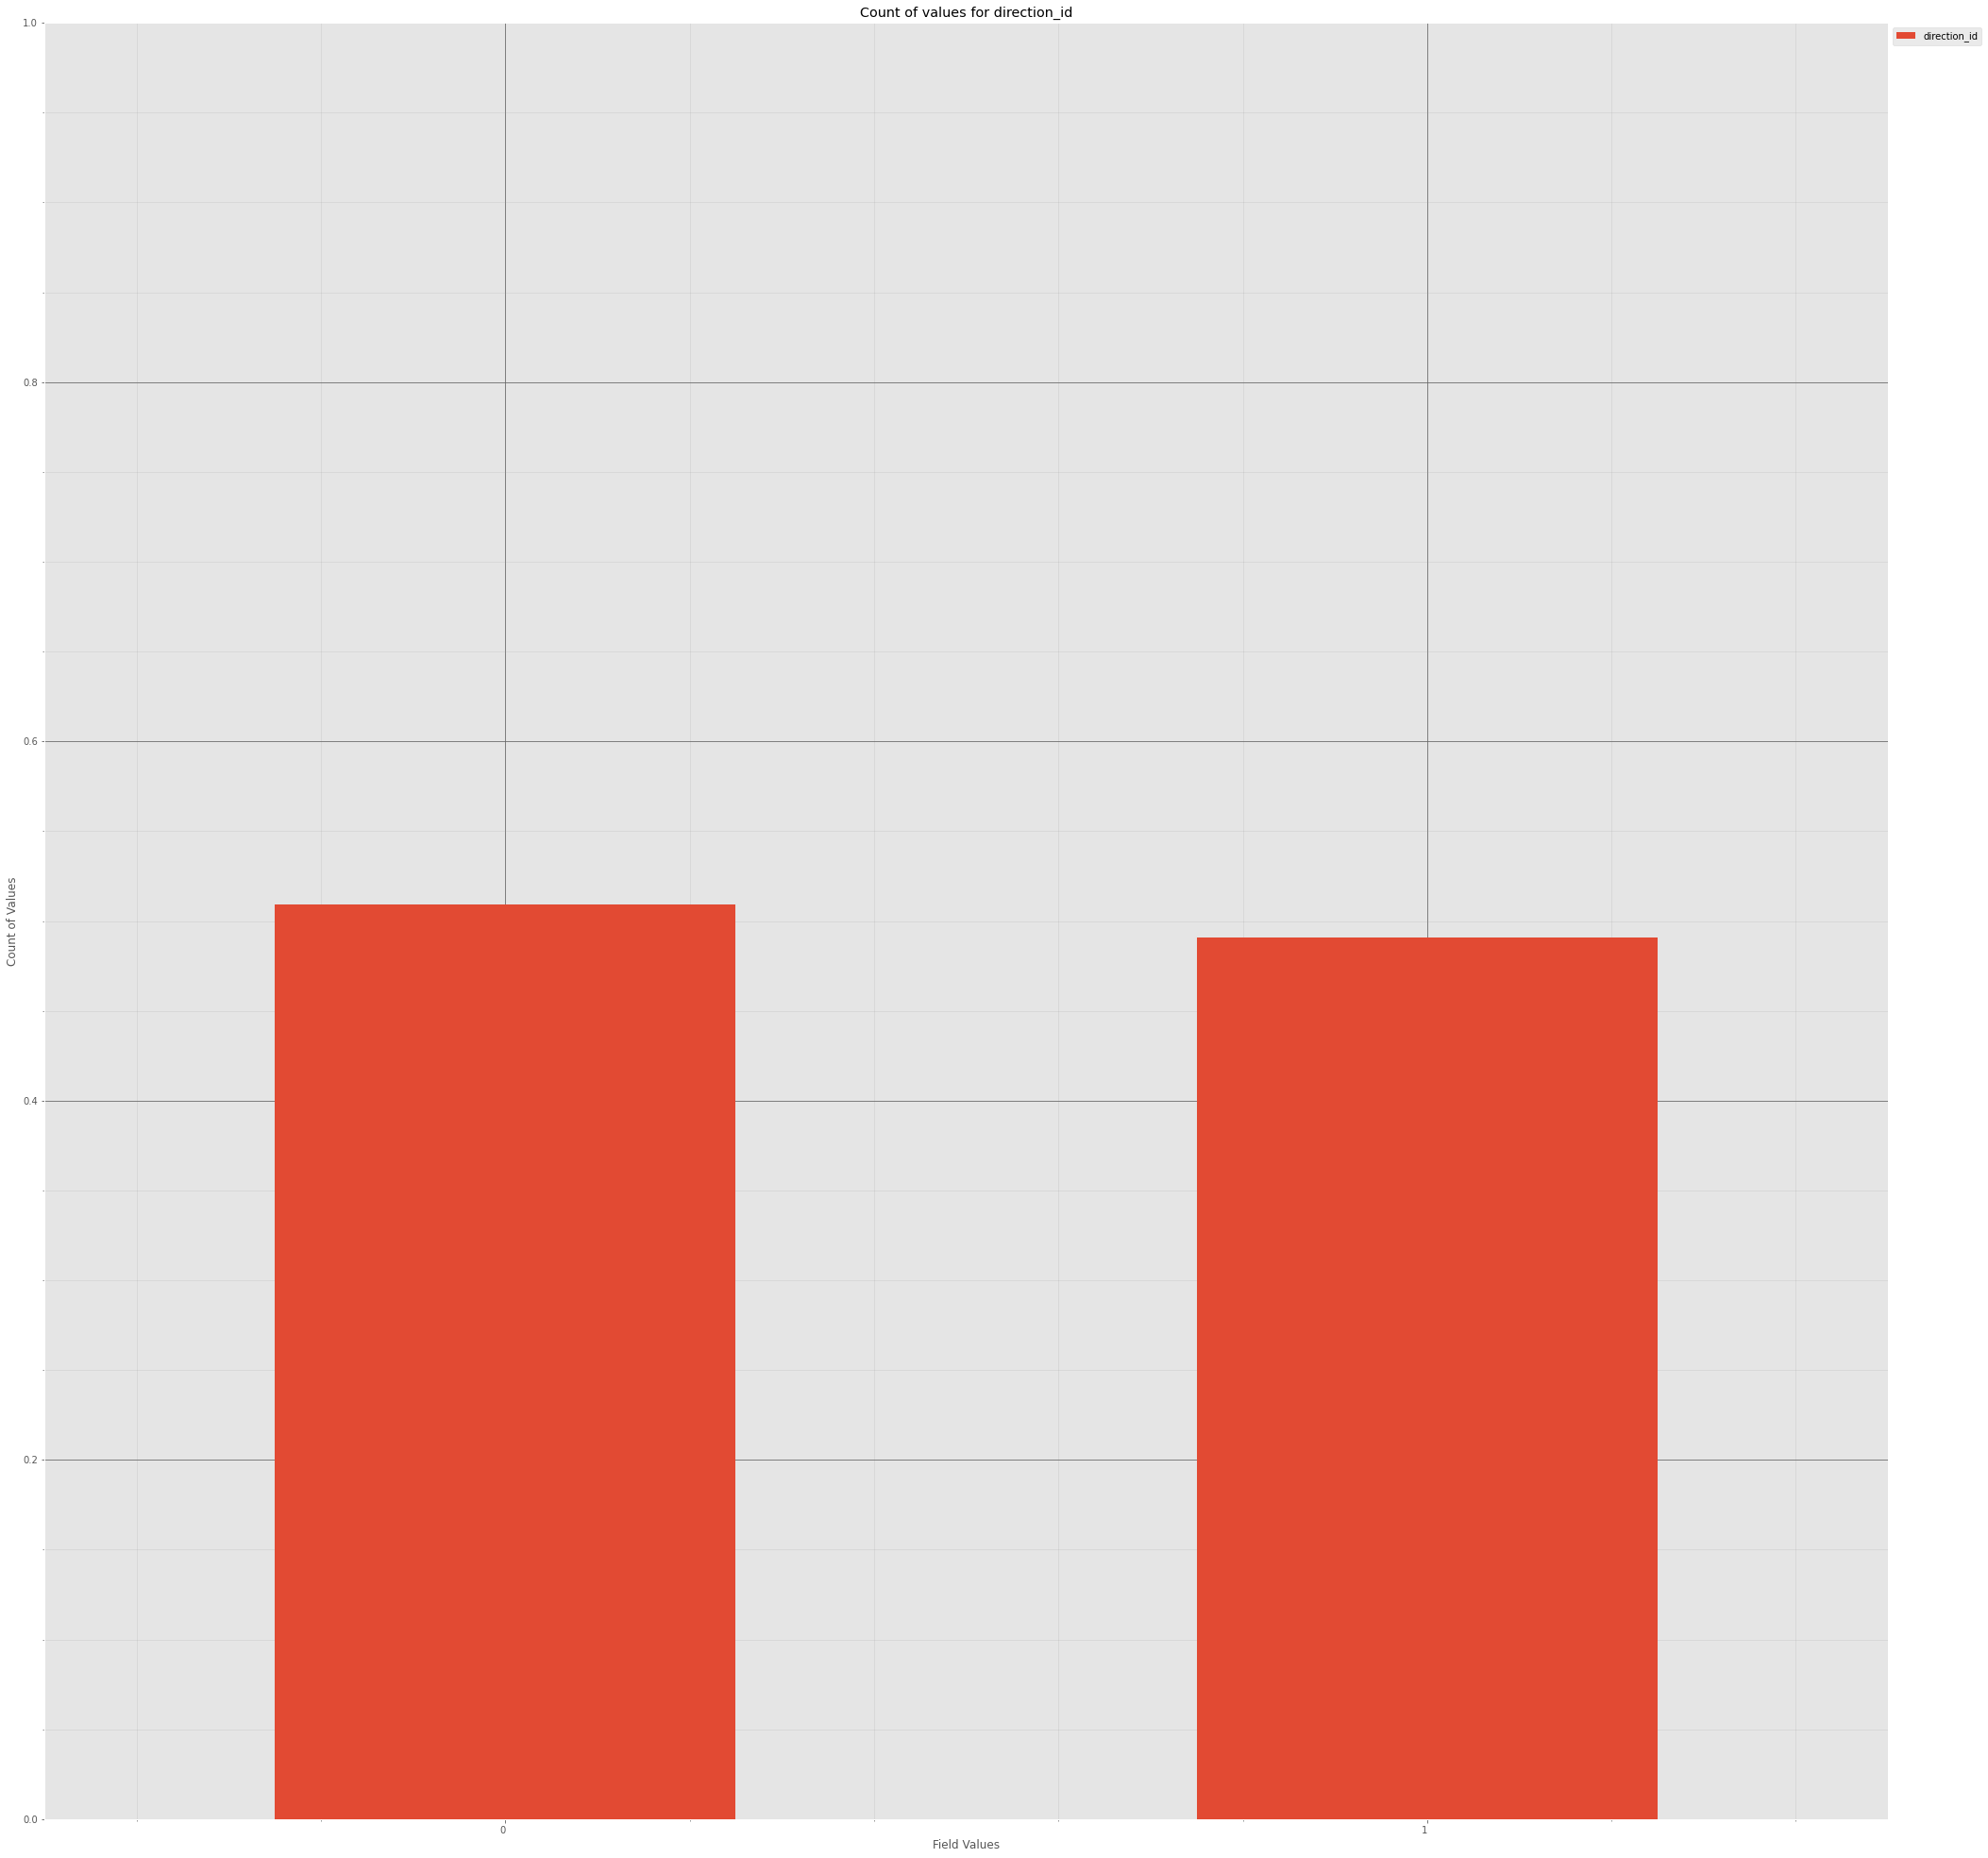

Too Many Categories to plot
-------------------
-------------------
Duplicates:
0 Duplicated Rows



,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id


-----
Investigating Cause
-----
Inside group_over_single_categories()
-------------------
-------------------
Multi:
Inside group_over_multi_categories()


----------------------


Grouping over route_id|service_id results in:



Rows  % Frequency
route_id     service_id                   
10-100-e20-1 1             18     0.009778
             1#1            0     0.000000
             1#2            0     0.000000
             10             0     0.000000
             10#1           0     0.000000
...                       ...          ...
60-H9-b12-1  y1012          0     0.000000
             y1012#1        0     0.000000
             y1013          0     0.000000
             y1014          0     0.000000
             y1015          0     0.000000

[46580 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
route_id     service_id                   
10-100-e20-1 1             18     0.009778
             14            24     0.013037
             7             24     0.013037
             8             24     0.013037
             y100k         24     0.013037
...                       ...          ...
60-H2-b12-1  y1005#2       65     0.035308
60-H3-b12-1  y1003#1       72     0.039110
             y1004#1       66     0.035851
             y1005#2       76     0.041283
60-H9-b12-1  y1003#1        3     0.001630

[5683 rows x 2 columns]

Function exception:

cannot insert route_id, already exists


In [38]:
static_file_dict=ingest_and_analyse(file_dictionary,folder_path='./data/Google_Transit_Static/',datetime_format='YYYYMMDD',delim=',',analyse=True,multi_analyse_exception=['transfers.txt'])

In [40]:
for key, value in static_file_dict.items():
    display(value)

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,03C,GoAhead Commuter,https://www.transportforireland.ie,Europe/Dublin,EN
1,978,Dublin Bus,https://www.transportforireland.ie,Europe/Dublin,EN
2,01,Bus Éireann,https://www.transportforireland.ie,Europe/Dublin,EN
3,01X,Expressway,https://www.transportforireland.ie,Europe/Dublin,EN
4,03,Go-Ahead,https://www.transportforireland.ie,Europe/Dublin,EN


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,0,0,0,0,0,0,1,20210623,20211218
1,1#1,1,0,0,0,0,0,1,20210623,20211204
2,1#2,0,0,0,0,0,0,1,20210623,20210731
3,10,0,0,1,0,0,0,0,20210623,20211204
4,10#1,0,1,0,0,0,0,0,20210623,20211218
...,...,...,...,...,...,...,...,...,...,...
80,y1012,0,0,0,0,1,0,0,20210623,20211218
81,y1012#1,0,0,0,0,1,0,0,20210623,20210731
82,y1013,0,0,0,1,0,0,0,20210623,20211218
83,y1014,0,0,1,0,0,0,0,20210623,20211218


,service_id,date,exception_type
0,1,20210801,2
1,1,20210808,2
2,1,20210815,2
3,1,20210822,2
4,1,20210829,2
...,...,...,...
845,y1015,20211115,2
846,y1015,20211122,2
847,y1015,20211129,2
848,y1015,20211206,2


,route_id,agency_id,route_short_name,route_long_name,route_type
0,10-100-e20-1,01,100,Drogheda Bus Station -,3
1,10-101-e20-1,01,101,Busáras - Drogheda Bus Station,3
2,10-103-e20-1,01,103,Dublin (Beresford Place) - Tayto Park,3
3,10-104-e20-1,01,104,Bus Stop at Train Station - Hastings Green Rou...,3
4,10-105-e20-1,01,105,Hospital Car Park - Drogheda Bus Station,3
...,...,...,...,...,...
543,60-9-d12-1,978,9,Charlestown Shopping Centre - Greenhills College,3
544,60-H1-b12-1,978,H1,National Lottery Head Quarters - Old Race Course,3
545,60-H2-b12-1,978,H2,National Lottery Head Quarters - Malahide Gard...,3
546,60-H3-b12-1,978,H3,National Lottery Head Quarters - Howth Summit,3


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,1143.y1006.17-130-cm1-1.82.I,06:10:00,06:10:00,8260B136421,1,NaN,0,0,0.00
1,1143.y1006.17-130-cm1-1.82.I,06:18:00,06:18:00,8260B1324001,2,NaN,0,0,7572.44
2,1143.y1006.17-130-cm1-1.82.I,06:25:00,06:25:00,8260B1408801,3,NaN,0,0,15897.87
3,1143.y1006.17-130-cm1-1.82.I,06:32:00,06:32:00,8260B136431,4,NaN,0,0,22830.16
4,1143.y1006.17-130-cm1-1.82.I,06:34:00,06:34:00,8260B136391,5,NaN,0,0,24442.99
...,...,...,...,...,...,...,...,...,...
6019179,14786.10432.2-761-ga2-1.349.O,18:09:00,18:09:00,8230DB002201,35,NaN,0,0,15895.62
6019180,14786.10432.2-761-ga2-1.349.O,18:11:00,18:11:00,8230DB004401,36,NaN,0,0,16397.73
6019181,14786.10432.2-761-ga2-1.349.O,18:20:00,18:20:00,8240DB001813,37,NaN,0,0,21729.59
6019182,14786.10432.2-761-ga2-1.349.O,18:21:00,18:21:00,8240DB001814,38,NaN,0,0,22116.57


,stop_id,stop_name,stop_lat,stop_lon
0,7010B158131,"Ulsterbus Depot, stop 158131",54.996629,-7.317866
1,7010B158241,"Magee Campus, stop 158241",55.004476,-7.321782
2,704000000229,Killeen Bridge,54.131009,-6.346082
3,7040B107131,"Cullaville, stop 107131",54.062045,-6.643525
4,7040B139481,"Newry, stop 139481",54.168253,-6.339098
...,...,...,...,...
9996,8540B1560001,"St Louis School, stop 156001",54.245451,-6.971502
9997,8540B1560101,"Aughnacloy, stop 156011",54.416354,-6.978876
9998,8540B1560201,"Emyvale, stop 156021",54.340895,-6.959432
9999,8540B156591,"Aughnacloy, stop 156591",54.416451,-6.978658


,from_stop_id,to_stop_id,transfer_type,min_transfer_time
0,8250DB003073,8250DB003040,2,60.0
1,8250DB003073,8250DB003039,2,240.0
2,8380B1553801,8380B1553501,2,0.0
3,8430B155401,8430B255231,2,0.0
4,8430B255231,8430B155401,2,0.0
...,...,...,...,...
7146,8240B111921,8240B111931,2,390.0
7147,8240B111941,8240B111921,2,390.0
7148,8240B111941,8240B111931,2,30.0
7149,8240B111931,8240B111921,2,390.0


,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,10-100-e20-1,1,1954979.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
1,10-100-e20-1,1,1954981.1.10-100-e20-1.231.O,10-100-e20-1.231.O,Drogheda Bus Station -,0
2,10-100-e20-1,1,1954982.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
3,10-100-e20-1,1,1954983.1.10-100-e20-1.231.O,10-100-e20-1.231.O,Drogheda Bus Station -,0
4,10-100-e20-1,1,1954984.1.10-100-e20-1.232.I,10-100-e20-1.232.I,- Drogheda Bus Station,1
...,...,...,...,...,...,...
184090,60-H3-b12-1,y1003#1,6742.y1003.60-H3-b12-1.354.I,60-H3-b12-1.354.I,Howth Summit - National Lottery Head Quarters,1
184091,60-H3-b12-1,y1003#1,6743.y1003.60-H3-b12-1.353.O,60-H3-b12-1.353.O,National Lottery Head Quarters - Howth Summit,0
184092,60-H9-b12-1,y1003#1,6665.y1003.60-H9-b12-1.97.I,60-H9-b12-1.97.I,All Saints Road - National Lottery Head Quarters,1
184093,60-H9-b12-1,y1003#1,6666.y1003.60-H9-b12-1.97.I,60-H9-b12-1.97.I,All Saints Road - National Lottery Head Quarters,1


In [58]:
for key, value in static_file_dict.items():
    print(key)
    all_print=''
    print_statement="'{}':'{}'\n"
    
    for rkey, rvalue in value.dtypes.apply(lambda x: x.name).to_dict().items():
        all_print+=print_statement.format(rkey,rvalue)
    
    print(all_print)
        

agency.txt
'agency_id':'category'
'agency_name':'category'
'agency_url':'category'
'agency_timezone':'category'
'agency_lang':'category'

calendar.txt
'service_id':'category'
'monday':'category'
'tuesday':'category'
'wednesday':'category'
'thursday':'category'
'friday':'category'
'saturday':'category'
'sunday':'category'
'start_date':'object'
'end_date':'object'

calendar_dates.txt
'service_id':'category'
'date':'object'
'exception_type':'category'

routes.txt
'route_id':'category'
'agency_id':'category'
'route_short_name':'category'
'route_long_name':'category'
'route_type':'category'

stop_times.txt
'trip_id':'category'
'arrival_time':'object'
'departure_time':'object'
'stop_id':'object'
'stop_sequence':'int64'
'stop_headsign':'object'
'pickup_type':'int64'
'drop_off_type':'category'
'shape_dist_traveled':'float64'

stops.txt
'stop_id':'object'
'stop_name':'category'
'stop_lat':'float64'
'stop_lon':'float64'

transfers.txt
'from_stop_id':'category'
'to_stop_id':'category'
'transfer_t

In [57]:
static_file_dict['agency.txt'].dtypes.apply(lambda x: x.name).to_dict()

{'agency_id': 'category',
 'agency_name': 'category',
 'agency_url': 'category',
 'agency_timezone': 'category',
 'agency_lang': 'category'}